# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

#### Basic imports

In [1]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K

/afs/inf.ed.ac.uk/user/s19/s1973235/.local/lib/python3.8/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [2]:
base_df = pd.DataFrame()

clean_data_folder = "train_data"

for filename in os.listdir(clean_data_folder):
    if "Falling" not in filename:
        full_path = f"{clean_data_folder}/{filename}"
        print(full_path)

        # load data into a DataFrame
        new_df = pd.read_csv(full_path)

        # merge into the base DataFrame
        base_df = pd.concat([base_df, new_df])

train_data/Respeck_s1732873_Climbing stairs_04-10-2022_14-29-16.csv
train_data/Respeck_s1732873_Descending stairs_04-10-2022_14-29-57.csv
train_data/Respeck_s1732873_Desk work_05-10-2022_09-10-44.csv
train_data/Respeck_s1732873_Lying down left_04-10-2022_14-12-42.csv
train_data/Respeck_s1732873_Lying down on back_04-10-2022_14-11-56.csv
train_data/Respeck_s1732873_Lying down on stomach_04-10-2022_14-14-08.csv
train_data/Respeck_s1732873_Lying down right_04-10-2022_14-13-24.csv
train_data/Respeck_s1732873_Movement_05-10-2022_10-08-43.csv
train_data/Respeck_s1732873_Running_04-10-2022_14-32-19.csv
train_data/Respeck_s1732873_Sitting_04-10-2022_14-07-59.csv
train_data/Respeck_s1732873_Sitting bent backward_04-10-2022_14-09-25.csv
train_data/Respeck_s1732873_Sitting bent forward_04-10-2022_14-08-40.csv
train_data/Respeck_s1732873_Standing_04-10-2022_14-10-08.csv
train_data/Respeck_s1732873_Walking at normal speed_04-10-2022_14-31-37.csv
train_data/Respeck_s1800600_Climbing stairs_05-10-202

train_data/Respeck_s1834237_Sitting bent forward_30-09-2022_16-58-23.csv
train_data/Respeck_s1834237_Standing_30-09-2022_17-02-21.csv
train_data/Respeck_s1834237_Walking at normal speed_30-09-2022_17-39-29.csv
train_data/Respeck_s1836526_Climbing stairs_23-09-2022_13-15-49.csv
train_data/Respeck_s1836526_Descending stairs_23-09-2022_13-17-22.csv
train_data/Respeck_s1836526_Desk work_23-09-2022_13-29-40.csv
train_data/Respeck_s1836526_Lying down left_23-09-2022_13-21-48.csv
train_data/Respeck_s1836526_Lying down on back_23-09-2022_13-25-40.csv
train_data/Respeck_s1836526_Lying down on stomach_23-09-2022_13-24-23.csv
train_data/Respeck_s1836526_Lying down right_23-09-2022_13-23-05.csv
train_data/Respeck_s1836526_Movement_23-09-2022_13-08-51.csv
train_data/Respeck_s1836526_Running_23-09-2022_13-07-03.csv
train_data/Respeck_s1836526_Sitting_23-09-2022_13-31-03.csv
train_data/Respeck_s1836526_Sitting bent backward_23-09-2022_13-33-29.csv
train_data/Respeck_s1836526_Sitting bent forward_23-0

train_data/Respeck_s1862671_Running_22-09-2022_22-51-08.csv
train_data/Respeck_s1862671_Sitting_04-10-2022_12-45-29.csv
train_data/Respeck_s1862671_Sitting bent backward_05-10-2022_22-25-52.csv
train_data/Respeck_s1862671_Sitting bent forward_22-09-2022_21-50-21.csv
train_data/Respeck_s1862671_Standing_04-10-2022_12-43-00.csv
train_data/Respeck_s1862671_Walking at normal speed_22-09-2022_21-09-24.csv
train_data/Respeck_s1863792_Climbing stairs_05-10-2022_16-17-08.csv
train_data/Respeck_s1863792_Descending stairs_05-10-2022_16-18-15.csv
train_data/Respeck_s1863792_Desk work_23-09-2022_15-49-23.csv
train_data/Respeck_s1863792_Lying down left_23-09-2022_15-34-31.csv
train_data/Respeck_s1863792_Lying down on back_23-09-2022_15-39-05.csv
train_data/Respeck_s1863792_Lying down on stomach_23-09-2022_15-37-42.csv
train_data/Respeck_s1863792_Lying down right_23-09-2022_15-36-02.csv
train_data/Respeck_s1863792_Movement_23-09-2022_15-53-04.csv
train_data/Respeck_s1863792_Running_23-09-2022_17-09-

train_data/Respeck_s1911027_Lying down on back_27-09-2022_11-29-45.csv
train_data/Respeck_s1911027_Lying down on stomach_27-09-2022_11-33-55.csv
train_data/Respeck_s1911027_Lying down right_27-09-2022_11-32-21.csv
train_data/Respeck_s1911027_Movement_27-09-2022_11-38-42.csv
train_data/Respeck_s1911027_Running_04-10-2022_15-26-46.csv
train_data/Respeck_s1911027_Sitting_04-10-2022_16-03-16.csv
train_data/Respeck_s1911027_Sitting bent backward_27-09-2022_11-24-30.csv
train_data/Respeck_s1911027_Sitting bent forward_04-10-2022_15-52-16.csv
train_data/Respeck_s1911027_Standing_04-10-2022_15-50-05.csv
train_data/Respeck_s1911027_Walking at normal speed_27-09-2022_11-35-30.csv
train_data/Respeck_s1911455_Climbing stairs_04-10-2022_15-18-24.csv
train_data/Respeck_s1911455_Descending stairs_04-10-2022_15-17-25.csv
train_data/Respeck_s1911455_Desk work_23-09-2022_17-17-39.csv
train_data/Respeck_s1911455_Lying down left_23-09-2022_17-22-47.csv
train_data/Respeck_s1911455_Lying down on back_23-09-

train_data/Respeck_s1923449_Sitting_28-09-2022_14-03-34.csv
train_data/Respeck_s1923449_Sitting bent backward_28-09-2022_14-07-57.csv
train_data/Respeck_s1923449_Sitting bent forward_28-09-2022_14-05-44.csv
train_data/Respeck_s1923449_Standing_28-09-2022_14-10-59.csv
train_data/Respeck_s1923449_Walking at normal speed_28-09-2022_15-39-53.csv
train_data/Respeck_s1923493_Climbing stairs_02-10-2022_15-16-09.csv
train_data/Respeck_s1923493_Descending stairs_02-10-2022_15-15-07.csv
train_data/Respeck_s1923493_Desk work_02-10-2022_16-00-59.csv
train_data/Respeck_s1923493_Lying down left_02-10-2022_16-07-03.csv
train_data/Respeck_s1923493_Lying down on back_02-10-2022_16-04-08.csv
train_data/Respeck_s1923493_Lying down on stomach_02-10-2022_16-12-59.csv
train_data/Respeck_s1923493_Lying down right_02-10-2022_16-09-11.csv
train_data/Respeck_s1923493_Movement_02-10-2022_13-15-35.csv
train_data/Respeck_s1923493_Running_02-10-2022_13-37-42.csv
train_data/Respeck_s1923493_Sitting_02-10-2022_12-39-

train_data/Respeck_s1941321_Running_04-10-2022_11-10-47.csv
train_data/Respeck_s1941321_Sitting_04-10-2022_10-52-21.csv
train_data/Respeck_s1941321_Sitting bent backward_04-10-2022_10-54-23.csv
train_data/Respeck_s1941321_Sitting bent forward_04-10-2022_10-53-18.csv
train_data/Respeck_s1941321_Standing_04-10-2022_10-56-06.csv
train_data/Respeck_s1941321_Walking at normal speed_04-10-2022_11-09-11.csv
train_data/Respeck_s1948094_Climbing stairs_23-09-2022_12-51-37.csv
train_data/Respeck_s1948094_Descending stairs_23-09-2022_12-53-24.csv
train_data/Respeck_s1948094_Desk work_23-09-2022_12-01-53.csv
train_data/Respeck_s1948094_Lying down left_23-09-2022_11-54-37.csv
train_data/Respeck_s1948094_Lying down on back_23-09-2022_11-59-08.csv
train_data/Respeck_s1948094_Lying down on stomach_23-09-2022_11-57-49.csv
train_data/Respeck_s1948094_Lying down right_23-09-2022_11-56-22.csv
train_data/Respeck_s1948094_Movement_23-09-2022_12-58-07.csv
train_data/Respeck_s1948094_Running_23-09-2022_12-54-

train_data/Respeck_s1962038_Movement_23-09-2022_15-51-01.csv
train_data/Respeck_s1962038_Running_23-09-2022_15-44-56.csv
train_data/Respeck_s1962038_Sitting_23-09-2022_14-54-11.csv
train_data/Respeck_s1962038_Sitting bent backward_04-10-2022_14-47-08.csv
train_data/Respeck_s1962038_Sitting bent forward_23-09-2022_14-56-59.csv
train_data/Respeck_s1962038_Standing_04-10-2022_14-45-21.csv
train_data/Respeck_s1962038_Walking at normal speed_02-10-2022_19-03-08.csv
train_data/Respeck_s1965695_Climbing stairs_29-09-2022_17-32-23.csv
train_data/Respeck_s1965695_Descending stairs_29-09-2022_17-31-42.csv
train_data/Respeck_s1965695_Desk work_29-09-2022_13-43-35.csv
train_data/Respeck_s1965695_Lying down left_29-09-2022_13-34-41.csv
train_data/Respeck_s1965695_Lying down on back_29-09-2022_13-32-30.csv
train_data/Respeck_s1965695_Lying down on stomach_29-09-2022_13-37-53.csv
train_data/Respeck_s1965695_Lying down right_29-09-2022_13-35-36.csv
train_data/Respeck_s1965695_Movement_29-09-2022_13-40

train_data/Respeck_s1992413_Lying down right_05-10-2022_00-20-45.csv
train_data/Respeck_s1992413_Movement_28-09-2022_11-03-13.csv
train_data/Respeck_s1992413_Running_28-09-2022_11-42-37.csv
train_data/Respeck_s1992413_Sitting_28-09-2022_10-50-46.csv
train_data/Respeck_s1992413_Sitting bent backward_28-09-2022_10-52-46.csv
train_data/Respeck_s1992413_Sitting bent forward_29-09-2022_18-09-22.csv
train_data/Respeck_s1992413_Standing_28-09-2022_10-54-08.csv
train_data/Respeck_s1992413_Walking at normal speed_29-09-2022_18-49-58.csv
train_data/Respeck_s1996403_Climbing stairs_02-10-2022_15-33-36.csv
train_data/Respeck_s1996403_Descending stairs_02-10-2022_15-34-33.csv
train_data/Respeck_s1996403_Desk work_02-10-2022_18-09-36.csv
train_data/Respeck_s1996403_Lying down left_02-10-2022_15-12-16.csv
train_data/Respeck_s1996403_Lying down on back_02-10-2022_15-11-33.csv
train_data/Respeck_s1996403_Lying down on stomach_02-10-2022_15-14-02.csv
train_data/Respeck_s1996403_Lying down right_02-10-20

train_data/Respeck_s2308859_Lying down on stomach_05-10-2022_11-30-52.csv
train_data/Respeck_s2308859_Lying down right_05-10-2022_11-36-20.csv
train_data/Respeck_s2308859_Move_05-10-2022_11-55-15.csv
train_data/Respeck_s2308859_Running_05-10-2022_13-07-55.csv
train_data/Respeck_s2308859_Sitting_05-10-2022_10-42-56.csv
train_data/Respeck_s2308859_Sitting bent backward_05-10-2022_11-23-31.csv
train_data/Respeck_s2308859_Sitting bent forward_05-10-2022_11-21-29.csv
train_data/Respeck_s2308859_Standing_05-10-2022_11-25-38.csv
train_data/Respeck_s2308859_Walking at normal speed_05-10-2022_13-05-22.csv
train_data/Respeck_s2342658_Climbing stairs_04-10-2022_17-06-59.csv
train_data/Respeck_s2342658_Descending stairs_04-10-2022_17-07-48.csv
train_data/Respeck_s2342658_Desk work_04-10-2022_14-30-53.csv
train_data/Respeck_s2342658_Lying down left_04-10-2022_14-26-52.csv
train_data/Respeck_s2342658_Lying down on back_04-10-2022_14-24-33.csv
train_data/Respeck_s2342658_Lying down on stomach_04-10-2

train_data/Thingy_s1832512_Desk work_02-10-2022_15-30-37.csv
train_data/Thingy_s1832512_Lying down left_05-10-2022_11-40-28.csv
train_data/Thingy_s1832512_Lying down on back_02-10-2022_15-42-31.csv
train_data/Thingy_s1832512_Lying down on stomach_02-10-2022_15-43-34.csv
train_data/Thingy_s1832512_Lying down right_02-10-2022_15-39-31.csv
train_data/Thingy_s1832512_Movement_05-10-2022_11-27-35.csv
train_data/Thingy_s1832512_Running_05-10-2022_11-38-40.csv
train_data/Thingy_s1832512_Sitting_02-10-2022_15-25-34.csv
train_data/Thingy_s1832512_Sitting bent backward_02-10-2022_15-29-04.csv
train_data/Thingy_s1832512_Sitting bent forward_07-10-2022_10-29-33.csv
train_data/Thingy_s1832512_Standing_05-10-2022_11-23-45.csv
train_data/Thingy_s1832512_Walking at normal speed_07-10-2022_11-27-12.csv
train_data/Thingy_s1834237_Climbing stairs_30-09-2022_17-54-34.csv
train_data/Thingy_s1834237_Descending stairs_30-09-2022_17-55-23.csv
train_data/Thingy_s1834237_Desk work_30-09-2022_17-51-25.csv
train_

train_data/Thingy_s1862323_Descending stairs_02-10-2022_00-16-55.csv
train_data/Thingy_s1862323_Desk work_01-10-2022_23-15-37.csv
train_data/Thingy_s1862323_Lying down left_01-10-2022_22-51-49.csv
train_data/Thingy_s1862323_Lying down on back_01-10-2022_22-40-08.csv
train_data/Thingy_s1862323_Lying down on stomach_01-10-2022_23-08-31.csv
train_data/Thingy_s1862323_Lying down right_01-10-2022_22-56-38.csv
train_data/Thingy_s1862323_Movement_01-10-2022_23-19-48.csv
train_data/Thingy_s1862323_Running_02-10-2022_00-01-18.csv
train_data/Thingy_s1862323_Sitting_01-10-2022_22-00-29.csv
train_data/Thingy_s1862323_Sitting bent backward_01-10-2022_22-21-53.csv
train_data/Thingy_s1862323_Sitting bent forward_01-10-2022_22-16-23.csv
train_data/Thingy_s1862323_Standing_01-10-2022_22-34-14.csv
train_data/Thingy_s1862323_Walking at normal speed_01-10-2022_23-57-53.csv
train_data/Thingy_s1862671_Climbing stairs_22-09-2022_20-19-28.csv
train_data/Thingy_s1862671_Descending stairs_22-09-2022_20-15-29.cs

train_data/Thingy_s1910268_Descending stairs_03-10-2022_18-08-39.csv
train_data/Thingy_s1910268_Desk work_28-09-2022_22-27-55.csv
train_data/Thingy_s1910268_Running_03-10-2022_20-15-43.csv
train_data/Thingy_s1910268_Lying down left_28-09-2022_22-36-19.csv
train_data/Thingy_s1910268_Lying down on back_28-09-2022_22-33-54.csv
train_data/Thingy_s1910268_Lying down on stomach_28-09-2022_22-37-11.csv
train_data/Thingy_s1910268_Lying down right_28-09-2022_22-35-19.csv
train_data/Thingy_s1910268_Movement_28-09-2022_22-31-22.csv
train_data/Thingy_s1910268_Sitting_24-09-2022_16-08-02.csv
train_data/Thingy_s1910268_Sitting bent backward_24-09-2022_16-12-21.csv
train_data/Thingy_s1910268_Sitting bent forward_24-09-2022_16-10-11.csv
train_data/Thingy_s1910268_Standing_03-10-2022_18-29-50.csv
train_data/Thingy_s1910268_Walking at normal speed_03-10-2022_18-17-29.csv
train_data/Thingy_s1911027_Climbing stairs_04-10-2022_15-13-16.csv
train_data/Thingy_s1911027_Descending stairs_04-10-2022_15-12-31.cs

train_data/Thingy_s1921856_Climbing stairs_29-09-2022_16-55-08.csv
train_data/Thingy_s1921856_Descending stairs_29-09-2022_17-26-20.csv
train_data/Thingy_s1921856_Desk work_28-09-2022_12-29-49.csv
train_data/Thingy_s1921856_Lying down left_28-09-2022_12-26-09.csv
train_data/Thingy_s1921856_Lying down on back_03-10-2022_17-58-34.csv
train_data/Thingy_s1921856_Lying down on stomach_28-09-2022_12-27-45.csv
train_data/Thingy_s1921856_Lying down right_28-09-2022_12-27-02.csv
train_data/Thingy_s1921856_Movement_28-09-2022_12-28-26.csv
train_data/Thingy_s1921856_Running_29-09-2022_16-11-12.csv
train_data/Thingy_s1921856_Sitting_03-10-2022_16-46-26.csv
train_data/Thingy_s1921856_Sitting bent backward_03-10-2022_16-55-29.csv
train_data/Thingy_s1921856_Sitting bent forward_03-10-2022_16-52-39.csv
train_data/Thingy_s1921856_Standing_03-10-2022_17-57-19.csv
train_data/Thingy_s1921856_Walking at normal speed_29-09-2022_16-00-37.csv
train_data/Thingy_s1923449_Climbing stairs_28-09-2022_15-54-43.csv


train_data/Thingy_s1931698_Standing_30-09-2022_15-05-43.csv
train_data/Thingy_s1931698_Walking at normal speed_30-09-2022_15-12-35.csv
train_data/Thingy_s1931736_Climbing stairs_29-09-2022_17-34-39.csv
train_data/Thingy_s1931736_Descending stairs_29-09-2022_17-33-49.csv
train_data/Thingy_s1931736_Desk work_04-10-2022_22-29-23.csv
train_data/Thingy_s1931736_Lying down left_04-10-2022_21-03-53.csv
train_data/Thingy_s1931736_Lying down on back_04-10-2022_22-30-51.csv
train_data/Thingy_s1931736_Lying down on stomach_04-10-2022_22-31-57.csv
train_data/Thingy_s1931736_Lying down right_04-10-2022_21-05-36.csv
train_data/Thingy_s1931736_Movement_04-10-2022_21-06-45.csv
train_data/Thingy_s1931736_Running_29-09-2022_16-13-11.csv
train_data/Thingy_s1931736_Sitting_04-10-2022_20-49-04.csv
train_data/Thingy_s1931736_Sitting bent backward_04-10-2022_20-58-40.csv
train_data/Thingy_s1931736_Sitting bent forward_04-10-2022_21-00-44.csv
train_data/Thingy_s1931736_Standing_04-10-2022_20-44-07.csv
train_d

train_data/Thingy_s1960578_Sitting_02-10-2022_13-52-30.csv
train_data/Thingy_s1960578_Sitting bent backward_02-10-2022_13-59-30.csv
train_data/Thingy_s1960578_Sitting bent forward_02-10-2022_13-54-43.csv
train_data/Thingy_s1960578_Standing_05-10-2022_10-35-17.csv
train_data/Thingy_s1960578_Walking at normal speed_02-10-2022_16-54-09.csv
train_data/Thingy_s1961351_Climbing stairs_28-09-2022_13-27-23.csv
train_data/Thingy_s1961351_Descending stairs_28-09-2022_13-28-28.csv
train_data/Thingy_s1961351_Desk work_28-09-2022_13-15-26.csv
train_data/Thingy_s1961351_Lying down left_28-09-2022_13-05-19.csv
train_data/Thingy_s1961351_Lying down on back_28-09-2022_13-03-51.csv
train_data/Thingy_s1961351_Lying down on stomach_04-10-2022_15-23-29.csv
train_data/Thingy_s1961351_Lying down right_28-09-2022_13-06-05.csv
train_data/Thingy_s1961351_Movement_04-10-2022_15-29-44.csv
train_data/Thingy_s1961351_Running_28-09-2022_13-34-42.csv
train_data/Thingy_s1961351_Sitting_04-10-2022_15-10-49.csv
train_da

train_data/Thingy_s1976098_Movement_28-09-2022_14-47-51.csv
train_data/Thingy_s1976098_Running_28-09-2022_14-29-02.csv
train_data/Thingy_s1976098_Sitting_05-10-2022_15-39-30.csv
train_data/Thingy_s1976098_Sitting bent backward_05-10-2022_15-40-56.csv
train_data/Thingy_s1976098_Sitting bent forward_05-10-2022_15-40-14.csv
train_data/Thingy_s1976098_Standing_28-09-2022_13-59-56.csv
train_data/Thingy_s1976098_Walking at normal speed_28-09-2022_15-13-28.csv
train_data/Thingy_s1977764_Climbing stairs_24-09-2022_15-47-30.csv
train_data/Thingy_s1977764_Descending stairs_24-09-2022_15-48-13.csv
train_data/Thingy_s1977764_Desk work_24-09-2022_15-51-39.csv
train_data/Thingy_s1977764_Lying down left_24-09-2022_15-42-18.csv
train_data/Thingy_s1977764_Lying down on back_24-09-2022_15-41-29.csv
train_data/Thingy_s1977764_Running_24-09-2022_15-46-22.csv
train_data/Thingy_s1977764_Lying down on stomach_24-09-2022_15-44-00.csv
train_data/Thingy_s1977764_Lying down right_24-09-2022_15-43-08.csv
train_da

train_data/Thingy_s2303353_Lying down right_22-09-2022_14-26-48.csv
train_data/Thingy_s2303353_Movement_22-09-2022_14-31-26.csv
train_data/Thingy_s2303353_Sitting_22-09-2022_14-18-20.csv
train_data/Thingy_s2303353_Sitting bent backward_22-09-2022_14-20-58.csv
train_data/Thingy_s2303353_Sitting bent forward_22-09-2022_14-19-43.csv
train_data/Thingy_s2303353_Standing_22-09-2022_14-22-18.csv
train_data/Thingy_s2303353_Walking at normal speed_22-09-2022_14-45-46.csv
train_data/Thingy_s2303866_Climbing stairs_29-09-2022_13-13-32.csv
train_data/Thingy_s2303866_Descending stairs_29-09-2022_13-14-18.csv
train_data/Thingy_s2303866_Desk work_29-09-2022_13-06-20.csv
train_data/Thingy_s2303866_Lying down left_29-09-2022_12-57-44.csv
train_data/Thingy_s2303866_Lying down on back_29-09-2022_12-56-52.csv
train_data/Thingy_s2303866_Lying down on stomach_29-09-2022_13-00-44.csv
train_data/Thingy_s2303866_Lying down right_29-09-2022_12-59-58.csv
train_data/Thingy_s2303866_Movement_29-09-2022_13-20-19.cs

train_data/Respeck_s1711661_Running_23-09-2021_20-44-06.csv
train_data/Respeck_s1711661_Sitting_23-09-2021_19-51-48.csv
train_data/Respeck_s1711661_Sitting bent backward_23-09-2021_19-56-37.csv
train_data/Respeck_s1711661_Sitting bent forward_23-09-2021_19-54-06.csv
train_data/Respeck_s1711661_Standing_23-09-2021_19-58-56.csv
train_data/Respeck_s1711661_Walking at normal speed_23-09-2021_20-23-44.csv
train_data/Respeck_s1718069_Climbing_stairs_29-09-2021_12-31-14.csv
train_data/Respeck_s1718069_Descending_stairs_29-09-2021_12-31-50.csv
train_data/Respeck_s1718069_Desk work_29-09-2021_12-29-01.csv
train_data/Respeck_s1718069_Lying down left_04-10-2021_14-27-34.csv
train_data/Respeck_s1718069_Lying down on back_04-10-2021_14-26-49.csv
train_data/Respeck_s1718069_Lying down on stomach_04-10-2021_14-29-09.csv
train_data/Respeck_s1718069_Lying down right_04-10-2021_14-28-13.csv
train_data/Respeck_s1718069_Movement_04-10-2021_14-29-53.csv
train_data/Respeck_s1718069_Running_04-10-2021_14-36-

train_data/Respeck_s1800883_Lying down on back_29-09-2021_13-38-01.csv
train_data/Respeck_s1800883_Lying down on stomach_29-09-2021_13-39-15.csv
train_data/Respeck_s1800883_Lying down right_29-09-2021_13-41-27.csv
train_data/Respeck_s1800883_Movement_29-09-2021_14-52-02.csv
train_data/Respeck_s1800883_Running_29-09-2021_14-41-45.csv
train_data/Respeck_s1800883_Sitting_29-09-2021_13-31-04.csv
train_data/Respeck_s1800883_Sitting bent backward_29-09-2021_13-35-01.csv
train_data/Respeck_s1800883_Sitting bent forward_29-09-2021_13-33-04.csv
train_data/Respeck_s1800883_Standing_29-09-2021_13-28-54.csv
train_data/Respeck_s1800883_Walking at normal speed_29-09-2021_14-39-24.csv
train_data/Respeck_s1801931_Climbing stairs_06-10-2021_00-23-12.csv
train_data/Respeck_s1801931_Descending stairs_06-10-2021_00-21-24.csv
train_data/Respeck_s1801931_Desk work_05-10-2021_23-13-57.csv
train_data/Respeck_s1801931_Lying down left_05-10-2021_23-02-37.csv
train_data/Respeck_s1801931_Lying down on back_05-10-

train_data/Respeck_s1841064_Descending stairs_29-09-2021_13-44-58.csv
train_data/Respeck_s1841064_Desk work_29-09-2021_13-56-53.csv
train_data/Respeck_s1841064_Lying down left_29-09-2021_15-27-55.csv
train_data/Respeck_s1841064_Lying down on back_29-09-2021_15-27-14.csv
train_data/Respeck_s1841064_Lying down on stomach_29-09-2021_13-33-46.csv
train_data/Respeck_s1841064_Lying down right_06-10-2021_15-06-57.csv
train_data/Respeck_s1841064_Movement_29-09-2021_13-54-37.csv
train_data/Respeck_s1841064_Running_29-09-2021_13-46-50.csv
train_data/Respeck_s1841064_Sitting_06-10-2021_15-00-45.csv
train_data/Respeck_s1841064_Sitting bent backward_06-10-2021_14-57-36.csv
train_data/Respeck_s1841064_Sitting bent forward_06-10-2021_14-59-27.csv
train_data/Respeck_s1841064_Standing_06-10-2021_15-03-25.csv
train_data/Respeck_s1841064_Walking at normal speed_29-09-2021_13-49-01.csv
train_data/Respeck_s1842093_Climbing stairs_06-10-2021_11-12-31.csv
train_data/Respeck_s1842093_Descending stairs_06-10-2

train_data/Respeck_s1870697_Walking at normal speed_03-10-2021_17-34-49.csv
train_data/Respeck_s1891214_Climbing stairs_07-10-2021_14-25-08.csv
train_data/Respeck_s1891214_Descending stairs_07-10-2021_14-24-31.csv
train_data/Respeck_s1891214_Desk work_07-10-2021_14-28-36.csv
train_data/Respeck_s1891214_Lying down left_07-10-2021_14-20-01.csv
train_data/Respeck_s1891214_Lying down on back_07-10-2021_14-18-50.csv
train_data/Respeck_s1891214_Lying down on stomach_07-10-2021_14-21-21.csv
train_data/Respeck_s1891214_Lying down right_07-10-2021_14-20-40.csv
train_data/Respeck_s1891214_Movement_07-10-2021_14-26-13.csv
train_data/Respeck_s1891214_Running_07-10-2021_14-23-03.csv
train_data/Respeck_s1891214_Sitting_07-10-2021_14-15-48.csv
train_data/Respeck_s1891214_Sitting bent backward_07-10-2021_14-17-22.csv
train_data/Respeck_s1891214_Sitting bent forward_07-10-2021_14-16-44.csv
train_data/Respeck_s1891214_Standing_07-10-2021_14-18-00.csv
train_data/Respeck_s1891214_Walking at normal speed_0

train_data/Respeck_s2171931_Sitting bent forward_29-09-2021_14-30-50.csv
train_data/Respeck_s2171931_Standing_29-09-2021_14-33-34.csv
train_data/Respeck_s2171931_Walking at normal speed_29-09-2021_14-56-19.csv
train_data/Respeck_s2173036_Climbing stairs_03-10-2021_23-05-39.csv
train_data/Respeck_s2173036_Descending stairs_03-10-2021_23-01-56.csv
train_data/Respeck_s2173036_Desk work_03-10-2021_22-46-58.csv
train_data/Respeck_s2173036_Lying down left_03-10-2021_22-42-13.csv
train_data/Respeck_s2173036_Lying down on back_03-10-2021_22-45-15.csv
train_data/Respeck_s2173036_Lying down on stomach_03-10-2021_22-44-21.csv
train_data/Respeck_s2173036_Lying down right_03-10-2021_22-43-12.csv
train_data/Respeck_s2173036_Movement_03-10-2021_22-51-01.csv
train_data/Respeck_s2173036_Running_03-10-2021_23-04-00.csv
train_data/Respeck_s2173036_Sitting_03-10-2021_22-36-56.csv
train_data/Respeck_s2173036_Sitting bent backward_03-10-2021_22-38-54.csv
train_data/Respeck_s2173036_Sitting bent forward_03-1

train_data/Thingy_s1541031_Movement_06-10-2021_11-13-14.csv
train_data/Thingy_s1541031_Running_08-10-2021_12-12-01.csv
train_data/Thingy_s1541031_Sitting_06-10-2021_10-13-34.csv
train_data/Thingy_s1541031_Sitting bent backward_06-10-2021_10-16-04.csv
train_data/Thingy_s1541031_Sitting bent forward_06-10-2021_10-15-10.csv
train_data/Thingy_s1541031_Standing_06-10-2021_10-16-45.csv
train_data/Thingy_s1541031_Walking at normal speed_06-10-2021_18-31-07.csv
train_data/Thingy_s1702583_Climbing stairs_07-10-2021_22-00-15.csv
train_data/Thingy_s1702583_Descending stairs_07-10-2021_22-01-37.csv
train_data/Thingy_s1702583_Desk work_07-10-2021_22-05-20.csv
train_data/Thingy_s1702583_Lying down left_07-10-2021_21-13-34.csv
train_data/Thingy_s1702583_Running_07-10-2021_21-58-52.csv
train_data/Thingy_s1702583_Lying down on back_07-10-2021_21-12-40.csv
train_data/Thingy_s1702583_Lying down on stomach_07-10-2021_21-15-27.csv
train_data/Thingy_s1702583_Lying down right_07-10-2021_21-14-30.csv
train_da

train_data/Thingy_s1724279_Sitting_07-10-2021_16-25-27.csv
train_data/Thingy_s1724279_Sitting bent backward_29-09-2021_12-54-15.csv
train_data/Thingy_s1724279_Sitting bent forward_29-09-2021_12-52-58.csv
train_data/Thingy_s1724279_Standing_29-09-2021_12-55-07.csv
train_data/Thingy_s1724279_Walking at normal speed_29-09-2021_13-00-58.csv
train_data/Thingy_s1727780_Climbing stairs_29-09-2021_21-30-23.csv
train_data/Thingy_s1727780_Descending stairs_29-09-2021_21-31-13.csv
train_data/Thingy_s1727780_Desk work_29-09-2021_21-46-54.csv
train_data/Thingy_s1727780_Lying down left_29-09-2021_21-43-16.csv
train_data/Thingy_s1727780_Lying down on back_29-09-2021_21-42-20.csv
train_data/Thingy_s1727780_Lying down on stomach_29-09-2021_21-44-58.csv
train_data/Thingy_s1727780_Lying down right_29-09-2021_21-44-06.csv
train_data/Thingy_s1727780_Movement_29-09-2021_21-48-01.csv
train_data/Thingy_s1727780_Running_29-09-2021_21-27-31.csv
train_data/Thingy_s1727780_Sitting_29-09-2021_21-38-46.csv
train_da

train_data/Thingy_s1817972_Movement_06-10-2021_09-21-33.csv
train_data/Thingy_s1817972_Running_06-10-2021_09-20-20.csv
train_data/Thingy_s1817972_Sitting_06-10-2021_10-19-24.csv
train_data/Thingy_s1817972_Sitting bent backward_06-10-2021_09-11-55.csv
train_data/Thingy_s1817972_Sitting bent forward_06-10-2021_09-11-13.csv
train_data/Thingy_s1817972_Standing_06-10-2021_09-12-39.csv
train_data/Thingy_s1817972_Walking at normal speed_06-10-2021_09-18-09.csv
train_data/Thingy_s1822958_Climbing stairs_29-09-2021_16-51-40.csv
train_data/Thingy_s1822958_Descending stairs_29-09-2021_16-52-07.csv
train_data/Thingy_s1822958_Desk work_29-09-2021_17-03-52.csv
train_data/Thingy_s1822958_Lying down left_29-09-2021_16-25-44.csv
train_data/Thingy_s1822958_Lying down on back_29-09-2021_16-24-07.csv
train_data/Thingy_s1822958_Lying down on stomach_29-09-2021_16-29-21.csv
train_data/Thingy_s1822958_Lying down right_29-09-2021_16-27-16.csv
train_data/Thingy_s1822958_Movement_29-09-2021_17-02-00.csv
train_d

train_data/Thingy_s1864705_Lying down on back_29-09-2021_20-51-39.csv
train_data/Thingy_s1864705_Lying down on stomach_29-09-2021_20-55-43.csv
train_data/Thingy_s1864705_Lying down right_06-10-2021_23-01-00.csv
train_data/Thingy_s1864705_Movement_29-09-2021_21-48-56.csv
train_data/Thingy_s1864705_Sitting_29-09-2021_20-44-50.csv
train_data/Thingy_s1864705_Sitting bent backward_29-09-2021_20-47-33.csv
train_data/Thingy_s1864705_Sitting bent forward_06-10-2021_23-02-02.csv
train_data/Thingy_s1864705_Standing_29-09-2021_20-48-48.csv
train_data/Thingy_s1864705_Walking at normal speed_29-09-2021_21-46-16.csv
train_data/Thingy_s1865357_Desk work_29-09-2021_23-03-44.csv
train_data/Thingy_s1865357_Lying down left_29-09-2021_22-59-48.csv
train_data/Thingy_s1865357_Lying down on back_29-09-2021_22-58-56.csv
train_data/Thingy_s1865357_Lying down on stomach_29-09-2021_23-01-33.csv
train_data/Thingy_s1865357_Lying down right_29-09-2021_23-00-47.csv
train_data/Thingy_s1865357_Sitting bent backward_29

train_data/Thingy_s1970333_Lying down on back_13-10-2021_21-36-19.csv
train_data/Thingy_s1970333_Lying down on stomach_13-10-2021_21-40-53.csv
train_data/Thingy_s1970333_Lying down right_13-10-2021_21-37-27.csv
train_data/Thingy_s1970333_Movement_13-10-2021_21-55-05.csv
train_data/Thingy_s1970333_Running_13-10-2021_22-15-18.csv
train_data/Thingy_s1970333_Sitting_13-10-2021_21-20-58.csv
train_data/Thingy_s1970333_Sitting bent backward_13-10-2021_21-26-48.csv
train_data/Thingy_s1970333_Sitting bent forward_13-10-2021_21-28-19.csv
train_data/Thingy_s1970333_Standing_13-10-2021_21-29-53.csv
train_data/Thingy_s1970333_Walking at normal speed_13-10-2021_22-03-21.csv
train_data/Thingy_s2119637_Climbing stairs_03-10-2021_23-40-48.csv
train_data/Thingy_s2119637_Descending stairs_03-10-2021_23-37-19.csv
train_data/Thingy_s2119637_Desk work_03-10-2021_23-22-43.csv
train_data/Thingy_s2119637_Lying down left_03-10-2021_23-17-46.csv
train_data/Thingy_s2119637_Lying down on back_03-10-2021_23-21-36.c

train_data/Thingy_s2211228_Desk work_06-10-2021_19-40-25.csv
train_data/Thingy_s2211228_Lying down left_06-10-2021_19-44-51.csv
train_data/Thingy_s2211228_Lying down on back_29-09-2021_16-42-54.csv
train_data/Thingy_s2211228_Lying down on stomach_29-09-2021_16-40-44.csv
train_data/Thingy_s2211228_Lying down right_06-10-2021_23-57-33.csv
train_data/Thingy_s2211228_Movement_06-10-2021_19-49-31.csv
train_data/Thingy_s2211228_Running_29-09-2021_17-27-55.csv
train_data/Thingy_s2211228_Sitting_29-09-2021_16-46-08.csv
train_data/Thingy_s2211228_Sitting bent backward_29-09-2021_16-44-48.csv
train_data/Thingy_s2211228_Sitting bent forward_29-09-2021_16-45-26.csv
train_data/Thingy_s2211228_Standing_06-10-2021_19-41-21.csv
train_data/Thingy_s2211228_Walking at normal speed_06-10-2021_19-48-08.csv
train_data/Thingy_s2212045_Climbing stairs_29-09-2021_13-37-28.csv
train_data/Thingy_s2212045_Descending stairs_29-09-2021_13-36-47.csv
train_data/Thingy_s2212045_Desk work_29-09-2021_11-59-56.csv
train_

Reset the index of the base DataFrame.

In [3]:
base_df.reset_index(drop=True, inplace=True)
base_df

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id,mag_x,mag_y,mag_z,Unnamed: 0,Unnamed: 0.1
0,1.664890e+12,0.125977,-1.205872,0.143982,16.125000,6.187500,9.515625,Respeck,Climbing stairs,12,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...,NaN,NaN,NaN,NaN,NaN
1,1.664890e+12,0.104004,-0.896057,0.059509,15.468750,6.812500,18.062500,Respeck,Climbing stairs,12,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...,NaN,NaN,NaN,NaN,NaN
2,1.664890e+12,0.087402,-1.044495,0.060974,1.953125,-5.453125,15.625000,Respeck,Climbing stairs,12,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...,NaN,NaN,NaN,NaN,NaN
3,1.664890e+12,0.058594,-0.935364,0.096619,-4.015625,-5.156250,10.718750,Respeck,Climbing stairs,12,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...,NaN,NaN,NaN,NaN,NaN
4,1.664890e+12,-0.037842,-0.858215,0.167419,-9.843750,-7.828125,9.671875,Respeck,Climbing stairs,12,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608095,1.632941e+12,-1.128906,-0.014648,-0.200195,-147.968750,126.937500,23.781250,Thingy,Walking at normal speed,1,s2254050,NaN,Thingy_s2254050_Walking at normal speed_29-09-...,0.000,0.0000,0.000,NaN,NaN
2608096,1.632941e+12,-1.073242,-0.187500,-0.044922,-100.843750,105.812500,-2.937500,Thingy,Walking at normal speed,1,s2254050,NaN,Thingy_s2254050_Walking at normal speed_29-09-...,0.000,0.0000,0.000,NaN,NaN
2608097,1.632941e+12,-0.988281,0.059570,-0.035156,19.406250,43.812500,-19.781250,Thingy,Walking at normal speed,1,s2254050,NaN,Thingy_s2254050_Walking at normal speed_29-09-...,-44.375,-22.3125,-175.875,NaN,NaN
2608098,1.632941e+12,-0.891602,0.082031,-0.016602,25.187500,55.343750,-16.375000,Thingy,Walking at normal speed,1,s2254050,NaN,Thingy_s2254050_Walking at normal speed_29-09-...,0.000,0.0000,0.000,NaN,NaN


In [4]:
base_df = base_df[base_df['activity_type'] != 'Falling on knees']
base_df = base_df[base_df['accel_x'].notna()]


Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [5]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Desk work' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting' 'Sitting bent backward'
 'Sitting bent forward' 'Standing' 'Walking at normal speed']
The number of unique recordings is: 3527
The subject IDs in the recordings are: 123


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

### Sliding windows with Pandas 

Pandas conveniently offers built-in functions that help us create the sliding window data very easily.

In [6]:
example_recording = base_df[base_df.activity_code == 1]

# confim we only have one recording here
len(example_recording.recording_id.unique())

273

In [7]:
window_size = 100 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

large_enough_windows = [window for window in example_recording.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

In [8]:
# we then get the windows with the required overlap

overlapping_windows = large_enough_windows[::step_size] 

In [9]:
# then we will append a window ID to each window
for window in overlapping_windows:
    window.loc[:, 'window_id'] = window_number
    window_number += 1

In [10]:
# now we concatenate all the resulting windows
final_sliding_windows = pd.concat(overlapping_windows).reset_index(drop=True)

In [11]:
final_sliding_windows

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id,mag_x,mag_y,mag_z,Unnamed: 0,Unnamed: 0.1,window_id
0,1.664890e+12,-0.221436,-0.975647,0.371765,5.843750,-0.812500,3.703125,Respeck,Walking at normal speed,1,s1732873,1.0,Respeck_s1732873_Walking at normal speed_04-10...,NaN,NaN,NaN,NaN,NaN,0
1,1.664890e+12,-0.187256,-1.116028,0.368347,-1.031250,2.312500,4.578125,Respeck,Walking at normal speed,1,s1732873,1.0,Respeck_s1732873_Walking at normal speed_04-10...,NaN,NaN,NaN,NaN,NaN,0
2,1.664890e+12,-0.300049,-1.127991,0.364685,-3.187500,9.046875,1.109375,Respeck,Walking at normal speed,1,s1732873,1.0,Respeck_s1732873_Walking at normal speed_04-10...,NaN,NaN,NaN,NaN,NaN,0
3,1.664890e+12,0.067383,-1.263245,0.206726,-10.000000,-11.062500,7.640625,Respeck,Walking at normal speed,1,s1732873,1.0,Respeck_s1732873_Walking at normal speed_04-10...,NaN,NaN,NaN,NaN,NaN,0
4,1.664890e+12,0.155762,-1.372864,-0.033508,16.234375,-17.765625,5.937500,Respeck,Walking at normal speed,1,s1732873,1.0,Respeck_s1732873_Walking at normal speed_04-10...,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775895,1.632941e+12,-0.690430,-0.248047,-0.080078,114.250000,-86.562500,-22.531250,Thingy,Walking at normal speed,1,s2254050,NaN,Thingy_s2254050_Walking at normal speed_29-09-...,0.000,0.000,0.0,NaN,NaN,7758
775896,1.632941e+12,-0.674805,0.218750,-0.177734,39.406250,-99.500000,-8.312500,Thingy,Walking at normal speed,1,s2254050,NaN,Thingy_s2254050_Walking at normal speed_29-09-...,0.000,0.000,0.0,NaN,NaN,7758
775897,1.632941e+12,-0.432617,0.247070,-0.196289,66.093750,-72.093750,2.375000,Thingy,Walking at normal speed,1,s2254050,NaN,Thingy_s2254050_Walking at normal speed_29-09-...,0.000,0.000,0.0,NaN,NaN,7758
775898,1.632941e+12,-0.323242,0.298828,-0.066406,54.843750,-7.718750,13.718750,Thingy,Walking at normal speed,1,s2254050,NaN,Thingy_s2254050_Walking at normal speed_29-09-...,-42.125,-18.125,-155.0,NaN,NaN,7758


You can plot each window to see the signals. Here we will plot the first four windows of the walking activity.

In [12]:
first_four_windows = [group for _, group in final_sliding_windows[final_sliding_windows.window_id < 4].groupby("window_id")]

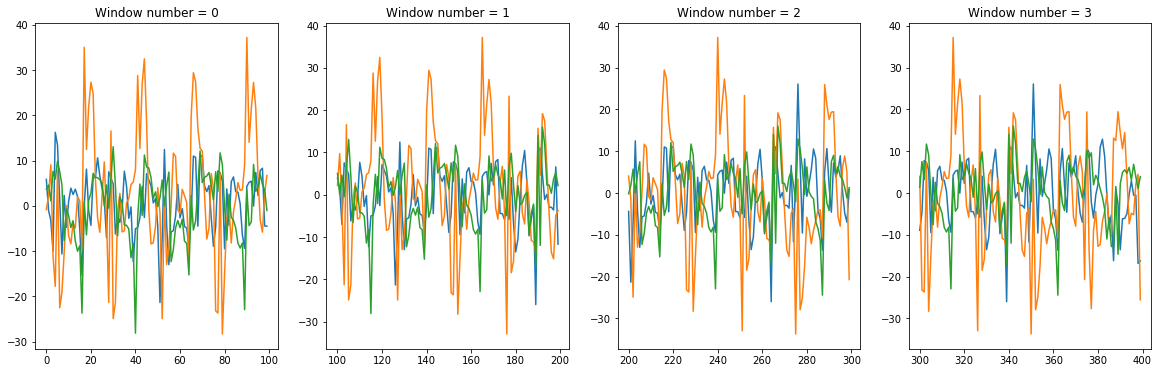

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")


It's also interesting to observe the dimensionality of one window. Considering just the accelerometer and gyroscope signals, with all three axes, the resulting dimensionality of one window is:

In [14]:
columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [15]:
np.array(first_four_windows[0][columns_of_interest]).shape

(100, 6)

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

One quick and simple method to consider for HAR is a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). It can take a multi-dimensional datapoint as input and can output a classification. 

We can transform each window of data into one single, multidimensional datapoint by applying simple computations using the [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html) package.

In [16]:
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__absolute_maximum,accel_x__minimum,...,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__absolute_maximum,gyro_z__minimum
0,-8.468750,-0.076904,-0.084688,100.0,0.186374,0.034735,0.204713,0.413086,0.733398,-0.733398,...,-7.609375,1.289062,-0.076094,100.0,7.550905,57.016160,7.551288,13.06250,28.109375,-28.109375
1,-8.415283,-0.077026,-0.084153,100.0,0.184021,0.033864,0.202349,0.413086,0.733398,-0.733398,...,19.218750,1.515625,0.192188,100.0,7.560530,57.161609,7.562972,16.00000,28.109375,-28.109375
2,-7.791504,-0.076904,-0.077915,100.0,0.173362,0.030054,0.190066,0.425537,0.489746,-0.489746,...,24.734375,1.289062,0.247344,100.0,7.381817,54.491221,7.385960,16.00000,24.421875,-24.421875
3,-6.407715,-0.081421,-0.064077,100.0,0.176411,0.031121,0.187687,0.457031,0.461426,-0.461426,...,55.093750,2.046875,0.550937,100.0,7.393191,54.659275,7.413691,16.00000,24.421875,-24.421875
4,-6.462402,-0.090088,-0.064624,100.0,0.176756,0.031243,0.188199,0.457031,0.535156,-0.535156,...,83.078125,1.992188,0.830781,100.0,7.103267,50.456402,7.151685,16.00000,24.421875,-24.421875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,-100.833985,-0.969727,-1.008340,100.0,0.354686,0.125802,1.068902,-0.245117,2.000000,-2.000000,...,-219.625000,-1.812500,-2.196250,100.0,27.641315,764.042306,27.728430,72.68750,77.718750,-77.718750
7755,-100.952149,-0.976562,-1.009521,100.0,0.406469,0.165217,1.088279,-0.245117,2.000000,-2.000000,...,-416.687500,-3.218750,-4.166875,100.0,29.735090,884.175590,30.025630,72.68750,77.718750,-77.718750
7756,-98.049805,-0.947754,-0.980498,100.0,0.455908,0.207852,1.081309,-0.133789,2.000000,-2.000000,...,-542.125000,-3.859375,-5.421250,100.0,29.660588,879.750498,30.151956,78.71875,78.875000,-78.875000
7757,-99.294922,-0.957520,-0.992949,100.0,0.445798,0.198736,1.088432,-0.133789,2.000000,-2.000000,...,-631.593750,-9.578125,-6.315938,100.0,30.172577,910.384432,30.826539,78.71875,78.875000,-78.875000


Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [17]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df[base_df["sensor_type"].str.contains("Respeck")].groupby("sensor_type"):
    print(f"Processing rid = {rid}")
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))

Processing rid = Respeck


In [18]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [19]:
# now extract all features
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|██████████| 10/10 [00:15<00:00,  1.50s/it]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__absolute_maximum,accel_x__minimum,...,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__absolute_maximum,gyro_z__minimum
0,-2.760498,-0.066406,-0.055210,50.0,0.120511,0.014523,0.132556,0.198486,0.287109,-0.287109,...,32.140625,-0.875000,0.642813,50.0,9.973530,99.471309,9.994224,20.093750,20.093750,-15.812500
1,-6.434570,-0.180054,-0.128691,50.0,0.147556,0.021773,0.195791,0.330811,0.332275,-0.332275,...,-39.546875,-0.804688,-0.790937,50.0,8.070427,65.131796,8.109092,20.093750,20.093750,-15.812500
2,-6.386719,-0.129761,-0.127734,50.0,0.140693,0.019794,0.190028,0.330811,0.332275,-0.332275,...,-177.078125,-3.312500,-3.541562,50.0,5.687820,32.351295,6.700296,7.250000,14.265625,-14.265625
3,-4.024170,-0.092773,-0.080483,50.0,0.112627,0.012685,0.138429,0.282227,0.310303,-0.310303,...,-123.984375,-4.171875,-2.479687,50.0,9.612405,92.398323,9.927093,17.140625,17.906250,-17.906250
4,-2.992432,-0.055908,-0.059849,50.0,0.126343,0.015963,0.139801,0.312500,0.312500,-0.306885,...,51.375000,5.437500,1.027500,50.0,11.286755,127.390836,11.333428,18.046875,18.046875,-17.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52717,-50.799805,-1.002441,-1.015996,50.0,0.163555,0.026750,1.029076,-0.598633,1.386719,-1.386719,...,-64.000000,10.390625,-1.280000,50.0,33.607251,1129.447303,33.631618,49.437500,112.375000,-112.375000
52718,-50.689453,-1.007324,-1.013789,50.0,0.221458,0.049044,1.037696,-0.220703,1.530273,-1.530273,...,102.187500,7.781250,2.043750,50.0,30.691627,941.975937,30.759598,78.281250,78.281250,-75.687500
52719,-49.993164,-1.012695,-0.999863,50.0,0.274703,0.075462,1.036913,-0.220703,1.585938,-1.585938,...,-121.562500,-4.890625,-2.431250,50.0,30.478350,928.929844,30.575167,78.281250,78.281250,-75.687500
52720,-50.620117,-1.022461,-1.012402,50.0,0.264555,0.069989,1.046398,-0.469727,1.585938,-1.585938,...,-148.437500,-3.312500,-2.968750,50.0,24.528328,601.638867,24.707334,46.250000,61.906250,-61.906250


Now we also extract the classes from each window

In [20]:
final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min)

,activity_type
window_id,
0,Climbing stairs
1,Climbing stairs
2,Climbing stairs
3,Climbing stairs
4,Climbing stairs
...,...
52717,Walking at normal speed
52718,Walking at normal speed
52719,Walking at normal speed


We need to assign a number to each categorical class for the Random Forest Classifer. It is mainly up to you how you categorise your classes. In this example, we will use the labels:
- 0 for Desk work
- 1 for Walking at normal speed

Bear in mind that your classification task will be multi-class, not binary. 

In [21]:
class_labels = {
    'Desk work': 0,
    'Walking at normal speed': 1,
    'Climbing stairs': 2,
    'Descending stairs': 3,
    'Lying down left': 4,
    'Lying down right': 5,
    'Lying down on back': 6,
    'Lying down on stomach': 7,
    'Movement': 8,
    'Running': 9,
    'Sitting': 10,
    'Sitting bent backward': 11,
    'Sitting bent forward': 12,
    'Standing': 13
    
    
}

In [22]:
window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
window_id_class_labels

,activity_type
window_id,
0,2
1,2
2,2
3,2
4,2
...,...
52717,1
52718,1
52719,1


In [23]:
base_df["recording_id"].unique()

array(['Respeck_s1732873_Climbing stairs_04-10-2022_14-29-16',
       'Respeck_s1732873_Descending stairs_04-10-2022_14-29-57',
       'Respeck_s1732873_Desk work_05-10-2022_09-10-44', ...,
       'Thingy_s2254050_Sitting bent forward_29-09-2021_19-19-18',
       'Thingy_s2254050_Standing_29-09-2021_19-20-37',
       'Thingy_s2254050_Walking at normal speed_29-09-2021_19-36-14'],
      dtype=object)

### Quickly training a Random Forest Classifier

We now have all the tools to start training a Random Forest Classifier. We will use the feature_list as inputs and window_id_class_labels as outputs. We will do a basic 80/20 split of the data for demonstration purposes. 

In your project you should split the data into training and tests sets by excluding entire subjects from the training set. This is discussed later on in this notebook.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, window_id_class_labels,
                                                    test_size=0.2, train_size=0.8)

In [25]:
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (42177, 60), y_train = (42177, 1)
Test set: X_test = (10545, 60), y_test = (10545, 1)


Now we can build and train the random forest classifier

In [26]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

<ipython-input-26-014410a81363>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [27]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       710
           1       0.80      0.92      0.86       787
           2       0.82      0.81      0.81       789
           3       0.84      0.83      0.84       772
           4       0.98      1.00      0.99       729
           5       1.00      0.98      0.99       702
           6       1.00      0.99      0.99       771
           7       1.00      0.99      0.99       776
           8       0.85      0.77      0.81       781
           9       0.95      0.97      0.96       729
          10       0.92      0.92      0.92       766
          11       0.96      0.97      0.96       788
          12       0.98      0.97      0.98       726
          13       0.95      0.87      0.91       719

    accuracy                           0.92     10545
   macro avg       0.92      0.92      0.92     10545
weighted avg       0.92      0.92      0.92     10545



This is a very easy problem so the classifier learns very quickly. Your actual problem of classifying multiple activities will be much harder.

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

## Training a simple CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

### Setting up the model

In [28]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 14

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            1216      
                                                                 
 batch_normalization (BatchN  (None, 48, 64)           256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 64)           256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 64)            0

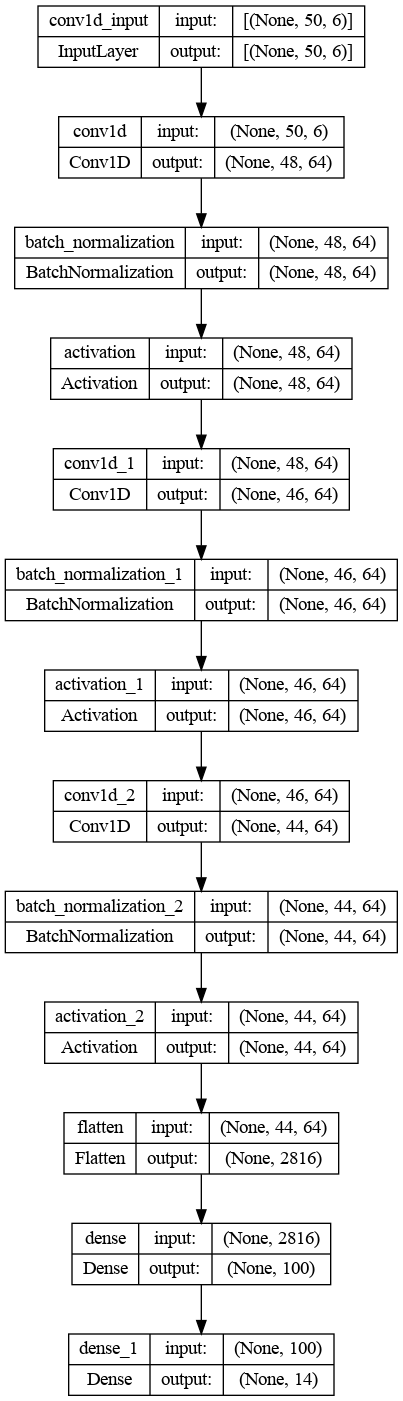

In [29]:
from keras.utils.vis_utils import plot_model
model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)

### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [30]:
columns_of_interest

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [31]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}")
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}")
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

window_id = 0
shape = (50, 6)
window_id = 1
shape = (50, 6)
window_id = 2
shape = (50, 6)
window_id = 3
shape = (50, 6)
window_id = 4
shape = (50, 6)
window_id = 5
shape = (50, 6)
window_id = 6
shape = (50, 6)
window_id = 7
shape = (50, 6)
window_id = 8
shape = (50, 6)
window_id = 9
shape = (50, 6)
window_id = 10
shape = (50, 6)
window_id = 11
shape = (50, 6)
window_id = 12
shape = (50, 6)
window_id = 13
shape = (50, 6)
window_id = 14
shape = (50, 6)
window_id = 15
shape = (50, 6)
window_id = 16
shape = (50, 6)
window_id = 17
shape = (50, 6)
window_id = 18
shape = (50, 6)
window_id = 19
shape = (50, 6)
window_id = 20
shape = (50, 6)
window_id = 21
shape = (50, 6)
window_id = 22
shape = (50, 6)
window_id = 23
shape = (50, 6)
window_id = 24
shape = (50, 6)
window_id = 25
shape = (50, 6)
window_id = 26
shape = (50, 6)
window_id = 27
shape = (50, 6)
window_id = 28
shape = (50, 6)
window_id = 29
shape = (50, 6)
window_id = 30
shape = (50, 6)
window_id = 31
shape = (50, 6)
window_id = 32
sha

shape = (50, 6)
window_id = 372
shape = (50, 6)
window_id = 373
shape = (50, 6)
window_id = 374
shape = (50, 6)
window_id = 375
shape = (50, 6)
window_id = 376
shape = (50, 6)
window_id = 377
shape = (50, 6)
window_id = 378
shape = (50, 6)
window_id = 379
shape = (50, 6)
window_id = 380
shape = (50, 6)
window_id = 381
shape = (50, 6)
window_id = 382
shape = (50, 6)
window_id = 383
shape = (50, 6)
window_id = 384
shape = (50, 6)
window_id = 385
shape = (50, 6)
window_id = 386
shape = (50, 6)
window_id = 387
shape = (50, 6)
window_id = 388
shape = (50, 6)
window_id = 389
shape = (50, 6)
window_id = 390
shape = (50, 6)
window_id = 391
shape = (50, 6)
window_id = 392
shape = (50, 6)
window_id = 393
shape = (50, 6)
window_id = 394
shape = (50, 6)
window_id = 395
shape = (50, 6)
window_id = 396
shape = (50, 6)
window_id = 397
shape = (50, 6)
window_id = 398
shape = (50, 6)
window_id = 399
shape = (50, 6)
window_id = 400
shape = (50, 6)
window_id = 401
shape = (50, 6)
window_id = 402
shape = 

window_id = 742
shape = (50, 6)
window_id = 743
shape = (50, 6)
window_id = 744
shape = (50, 6)
window_id = 745
shape = (50, 6)
window_id = 746
shape = (50, 6)
window_id = 747
shape = (50, 6)
window_id = 748
shape = (50, 6)
window_id = 749
shape = (50, 6)
window_id = 750
shape = (50, 6)
window_id = 751
shape = (50, 6)
window_id = 752
shape = (50, 6)
window_id = 753
shape = (50, 6)
window_id = 754
shape = (50, 6)
window_id = 755
shape = (50, 6)
window_id = 756
shape = (50, 6)
window_id = 757
shape = (50, 6)
window_id = 758
shape = (50, 6)
window_id = 759
shape = (50, 6)
window_id = 760
shape = (50, 6)
window_id = 761
shape = (50, 6)
window_id = 762
shape = (50, 6)
window_id = 763
shape = (50, 6)
window_id = 764
shape = (50, 6)
window_id = 765
shape = (50, 6)
window_id = 766
shape = (50, 6)
window_id = 767
shape = (50, 6)
window_id = 768
shape = (50, 6)
window_id = 769
shape = (50, 6)
window_id = 770
shape = (50, 6)
window_id = 771
shape = (50, 6)
window_id = 772
shape = (50, 6)
window_i

shape = (50, 6)
window_id = 1105
shape = (50, 6)
window_id = 1106
shape = (50, 6)
window_id = 1107
shape = (50, 6)
window_id = 1108
shape = (50, 6)
window_id = 1109
shape = (50, 6)
window_id = 1110
shape = (50, 6)
window_id = 1111
shape = (50, 6)
window_id = 1112
shape = (50, 6)
window_id = 1113
shape = (50, 6)
window_id = 1114
shape = (50, 6)
window_id = 1115
shape = (50, 6)
window_id = 1116
shape = (50, 6)
window_id = 1117
shape = (50, 6)
window_id = 1118
shape = (50, 6)
window_id = 1119
shape = (50, 6)
window_id = 1120
shape = (50, 6)
window_id = 1121
shape = (50, 6)
window_id = 1122
shape = (50, 6)
window_id = 1123
shape = (50, 6)
window_id = 1124
shape = (50, 6)
window_id = 1125
shape = (50, 6)
window_id = 1126
shape = (50, 6)
window_id = 1127
shape = (50, 6)
window_id = 1128
shape = (50, 6)
window_id = 1129
shape = (50, 6)
window_id = 1130
shape = (50, 6)
window_id = 1131
shape = (50, 6)
window_id = 1132
shape = (50, 6)
window_id = 1133
shape = (50, 6)
window_id = 1134
shape = (5

window_id = 1463
shape = (50, 6)
window_id = 1464
shape = (50, 6)
window_id = 1465
shape = (50, 6)
window_id = 1466
shape = (50, 6)
window_id = 1467
shape = (50, 6)
window_id = 1468
shape = (50, 6)
window_id = 1469
shape = (50, 6)
window_id = 1470
shape = (50, 6)
window_id = 1471
shape = (50, 6)
window_id = 1472
shape = (50, 6)
window_id = 1473
shape = (50, 6)
window_id = 1474
shape = (50, 6)
window_id = 1475
shape = (50, 6)
window_id = 1476
shape = (50, 6)
window_id = 1477
shape = (50, 6)
window_id = 1478
shape = (50, 6)
window_id = 1479
shape = (50, 6)
window_id = 1480
shape = (50, 6)
window_id = 1481
shape = (50, 6)
window_id = 1482
shape = (50, 6)
window_id = 1483
shape = (50, 6)
window_id = 1484
shape = (50, 6)
window_id = 1485
shape = (50, 6)
window_id = 1486
shape = (50, 6)
window_id = 1487
shape = (50, 6)
window_id = 1488
shape = (50, 6)
window_id = 1489
shape = (50, 6)
window_id = 1490
shape = (50, 6)
window_id = 1491
shape = (50, 6)
window_id = 1492
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 1836
shape = (50, 6)
window_id = 1837
shape = (50, 6)
window_id = 1838
shape = (50, 6)
window_id = 1839
shape = (50, 6)
window_id = 1840
shape = (50, 6)
window_id = 1841
shape = (50, 6)
window_id = 1842
shape = (50, 6)
window_id = 1843
shape = (50, 6)
window_id = 1844
shape = (50, 6)
window_id = 1845
shape = (50, 6)
window_id = 1846
shape = (50, 6)
window_id = 1847
shape = (50, 6)
window_id = 1848
shape = (50, 6)
window_id = 1849
shape = (50, 6)
window_id = 1850
shape = (50, 6)
window_id = 1851
shape = (50, 6)
window_id = 1852
shape = (50, 6)
window_id = 1853
shape = (50, 6)
window_id = 1854
shape = (50, 6)
window_id = 1855
shape = (50, 6)
window_id = 1856
shape = (50, 6)
window_id = 1857
shape = (50, 6)
window_id = 1858
shape = (50, 6)
window_id = 1859
shape = (50, 6)
window_id = 1860
shape = (50, 6)
window_id = 1861
shape = (50, 6)
window_id = 1862
shape = (50, 6)
window_id = 1863
shape = (50, 6)
window_id = 1864
shape = (50, 6)
window_id = 1865
shape = (5

window_id = 2201
shape = (50, 6)
window_id = 2202
shape = (50, 6)
window_id = 2203
shape = (50, 6)
window_id = 2204
shape = (50, 6)
window_id = 2205
shape = (50, 6)
window_id = 2206
shape = (50, 6)
window_id = 2207
shape = (50, 6)
window_id = 2208
shape = (50, 6)
window_id = 2209
shape = (50, 6)
window_id = 2210
shape = (50, 6)
window_id = 2211
shape = (50, 6)
window_id = 2212
shape = (50, 6)
window_id = 2213
shape = (50, 6)
window_id = 2214
shape = (50, 6)
window_id = 2215
shape = (50, 6)
window_id = 2216
shape = (50, 6)
window_id = 2217
shape = (50, 6)
window_id = 2218
shape = (50, 6)
window_id = 2219
shape = (50, 6)
window_id = 2220
shape = (50, 6)
window_id = 2221
shape = (50, 6)
window_id = 2222
shape = (50, 6)
window_id = 2223
shape = (50, 6)
window_id = 2224
shape = (50, 6)
window_id = 2225
shape = (50, 6)
window_id = 2226
shape = (50, 6)
window_id = 2227
shape = (50, 6)
window_id = 2228
shape = (50, 6)
window_id = 2229
shape = (50, 6)
window_id = 2230
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 2573
shape = (50, 6)
window_id = 2574
shape = (50, 6)
window_id = 2575
shape = (50, 6)
window_id = 2576
shape = (50, 6)
window_id = 2577
shape = (50, 6)
window_id = 2578
shape = (50, 6)
window_id = 2579
shape = (50, 6)
window_id = 2580
shape = (50, 6)
window_id = 2581
shape = (50, 6)
window_id = 2582
shape = (50, 6)
window_id = 2583
shape = (50, 6)
window_id = 2584
shape = (50, 6)
window_id = 2585
shape = (50, 6)
window_id = 2586
shape = (50, 6)
window_id = 2587
shape = (50, 6)
window_id = 2588
shape = (50, 6)
window_id = 2589
shape = (50, 6)
window_id = 2590
shape = (50, 6)
window_id = 2591
shape = (50, 6)
window_id = 2592
shape = (50, 6)
window_id = 2593
shape = (50, 6)
window_id = 2594
shape = (50, 6)
window_id = 2595
shape = (50, 6)
window_id = 2596
shape = (50, 6)
window_id = 2597
shape = (50, 6)
window_id = 2598
shape = (50, 6)
window_id = 2599
shape = (50, 6)
window_id = 2600
shape = (50, 6)
window_id = 2601
shape = (50, 6)
window_id = 2602
shape = (5

window_id = 2944
shape = (50, 6)
window_id = 2945
shape = (50, 6)
window_id = 2946
shape = (50, 6)
window_id = 2947
shape = (50, 6)
window_id = 2948
shape = (50, 6)
window_id = 2949
shape = (50, 6)
window_id = 2950
shape = (50, 6)
window_id = 2951
shape = (50, 6)
window_id = 2952
shape = (50, 6)
window_id = 2953
shape = (50, 6)
window_id = 2954
shape = (50, 6)
window_id = 2955
shape = (50, 6)
window_id = 2956
shape = (50, 6)
window_id = 2957
shape = (50, 6)
window_id = 2958
shape = (50, 6)
window_id = 2959
shape = (50, 6)
window_id = 2960
shape = (50, 6)
window_id = 2961
shape = (50, 6)
window_id = 2962
shape = (50, 6)
window_id = 2963
shape = (50, 6)
window_id = 2964
shape = (50, 6)
window_id = 2965
shape = (50, 6)
window_id = 2966
shape = (50, 6)
window_id = 2967
shape = (50, 6)
window_id = 2968
shape = (50, 6)
window_id = 2969
shape = (50, 6)
window_id = 2970
shape = (50, 6)
window_id = 2971
shape = (50, 6)
window_id = 2972
shape = (50, 6)
window_id = 2973
shape = (50, 6)
window_id 

window_id = 3314
shape = (50, 6)
window_id = 3315
shape = (50, 6)
window_id = 3316
shape = (50, 6)
window_id = 3317
shape = (50, 6)
window_id = 3318
shape = (50, 6)
window_id = 3319
shape = (50, 6)
window_id = 3320
shape = (50, 6)
window_id = 3321
shape = (50, 6)
window_id = 3322
shape = (50, 6)
window_id = 3323
shape = (50, 6)
window_id = 3324
shape = (50, 6)
window_id = 3325
shape = (50, 6)
window_id = 3326
shape = (50, 6)
window_id = 3327
shape = (50, 6)
window_id = 3328
shape = (50, 6)
window_id = 3329
shape = (50, 6)
window_id = 3330
shape = (50, 6)
window_id = 3331
shape = (50, 6)
window_id = 3332
shape = (50, 6)
window_id = 3333
shape = (50, 6)
window_id = 3334
shape = (50, 6)
window_id = 3335
shape = (50, 6)
window_id = 3336
shape = (50, 6)
window_id = 3337
shape = (50, 6)
window_id = 3338
shape = (50, 6)
window_id = 3339
shape = (50, 6)
window_id = 3340
shape = (50, 6)
window_id = 3341
shape = (50, 6)
window_id = 3342
shape = (50, 6)
window_id = 3343
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 3679
shape = (50, 6)
window_id = 3680
shape = (50, 6)
window_id = 3681
shape = (50, 6)
window_id = 3682
shape = (50, 6)
window_id = 3683
shape = (50, 6)
window_id = 3684
shape = (50, 6)
window_id = 3685
shape = (50, 6)
window_id = 3686
shape = (50, 6)
window_id = 3687
shape = (50, 6)
window_id = 3688
shape = (50, 6)
window_id = 3689
shape = (50, 6)
window_id = 3690
shape = (50, 6)
window_id = 3691
shape = (50, 6)
window_id = 3692
shape = (50, 6)
window_id = 3693
shape = (50, 6)
window_id = 3694
shape = (50, 6)
window_id = 3695
shape = (50, 6)
window_id = 3696
shape = (50, 6)
window_id = 3697
shape = (50, 6)
window_id = 3698
shape = (50, 6)
window_id = 3699
shape = (50, 6)
window_id = 3700
shape = (50, 6)
window_id = 3701
shape = (50, 6)
window_id = 3702
shape = (50, 6)
window_id = 3703
shape = (50, 6)
window_id = 3704
shape = (50, 6)
window_id = 3705
shape = (50, 6)
window_id = 3706
shape = (50, 6)
window_id = 3707
shape = (50, 6)
window_id = 3708
shape = (5

shape = (50, 6)
window_id = 4062
shape = (50, 6)
window_id = 4063
shape = (50, 6)
window_id = 4064
shape = (50, 6)
window_id = 4065
shape = (50, 6)
window_id = 4066
shape = (50, 6)
window_id = 4067
shape = (50, 6)
window_id = 4068
shape = (50, 6)
window_id = 4069
shape = (50, 6)
window_id = 4070
shape = (50, 6)
window_id = 4071
shape = (50, 6)
window_id = 4072
shape = (50, 6)
window_id = 4073
shape = (50, 6)
window_id = 4074
shape = (50, 6)
window_id = 4075
shape = (50, 6)
window_id = 4076
shape = (50, 6)
window_id = 4077
shape = (50, 6)
window_id = 4078
shape = (50, 6)
window_id = 4079
shape = (50, 6)
window_id = 4080
shape = (50, 6)
window_id = 4081
shape = (50, 6)
window_id = 4082
shape = (50, 6)
window_id = 4083
shape = (50, 6)
window_id = 4084
shape = (50, 6)
window_id = 4085
shape = (50, 6)
window_id = 4086
shape = (50, 6)
window_id = 4087
shape = (50, 6)
window_id = 4088
shape = (50, 6)
window_id = 4089
shape = (50, 6)
window_id = 4090
shape = (50, 6)
window_id = 4091
shape = (5

shape = (50, 6)
window_id = 4436
shape = (50, 6)
window_id = 4437
shape = (50, 6)
window_id = 4438
shape = (50, 6)
window_id = 4439
shape = (50, 6)
window_id = 4440
shape = (50, 6)
window_id = 4441
shape = (50, 6)
window_id = 4442
shape = (50, 6)
window_id = 4443
shape = (50, 6)
window_id = 4444
shape = (50, 6)
window_id = 4445
shape = (50, 6)
window_id = 4446
shape = (50, 6)
window_id = 4447
shape = (50, 6)
window_id = 4448
shape = (50, 6)
window_id = 4449
shape = (50, 6)
window_id = 4450
shape = (50, 6)
window_id = 4451
shape = (50, 6)
window_id = 4452
shape = (50, 6)
window_id = 4453
shape = (50, 6)
window_id = 4454
shape = (50, 6)
window_id = 4455
shape = (50, 6)
window_id = 4456
shape = (50, 6)
window_id = 4457
shape = (50, 6)
window_id = 4458
shape = (50, 6)
window_id = 4459
shape = (50, 6)
window_id = 4460
shape = (50, 6)
window_id = 4461
shape = (50, 6)
window_id = 4462
shape = (50, 6)
window_id = 4463
shape = (50, 6)
window_id = 4464
shape = (50, 6)
window_id = 4465
shape = (5

shape = (50, 6)
window_id = 4812
shape = (50, 6)
window_id = 4813
shape = (50, 6)
window_id = 4814
shape = (50, 6)
window_id = 4815
shape = (50, 6)
window_id = 4816
shape = (50, 6)
window_id = 4817
shape = (50, 6)
window_id = 4818
shape = (50, 6)
window_id = 4819
shape = (50, 6)
window_id = 4820
shape = (50, 6)
window_id = 4821
shape = (50, 6)
window_id = 4822
shape = (50, 6)
window_id = 4823
shape = (50, 6)
window_id = 4824
shape = (50, 6)
window_id = 4825
shape = (50, 6)
window_id = 4826
shape = (50, 6)
window_id = 4827
shape = (50, 6)
window_id = 4828
shape = (50, 6)
window_id = 4829
shape = (50, 6)
window_id = 4830
shape = (50, 6)
window_id = 4831
shape = (50, 6)
window_id = 4832
shape = (50, 6)
window_id = 4833
shape = (50, 6)
window_id = 4834
shape = (50, 6)
window_id = 4835
shape = (50, 6)
window_id = 4836
shape = (50, 6)
window_id = 4837
shape = (50, 6)
window_id = 4838
shape = (50, 6)
window_id = 4839
shape = (50, 6)
window_id = 4840
shape = (50, 6)
window_id = 4841
shape = (5

shape = (50, 6)
window_id = 5186
shape = (50, 6)
window_id = 5187
shape = (50, 6)
window_id = 5188
shape = (50, 6)
window_id = 5189
shape = (50, 6)
window_id = 5190
shape = (50, 6)
window_id = 5191
shape = (50, 6)
window_id = 5192
shape = (50, 6)
window_id = 5193
shape = (50, 6)
window_id = 5194
shape = (50, 6)
window_id = 5195
shape = (50, 6)
window_id = 5196
shape = (50, 6)
window_id = 5197
shape = (50, 6)
window_id = 5198
shape = (50, 6)
window_id = 5199
shape = (50, 6)
window_id = 5200
shape = (50, 6)
window_id = 5201
shape = (50, 6)
window_id = 5202
shape = (50, 6)
window_id = 5203
shape = (50, 6)
window_id = 5204
shape = (50, 6)
window_id = 5205
shape = (50, 6)
window_id = 5206
shape = (50, 6)
window_id = 5207
shape = (50, 6)
window_id = 5208
shape = (50, 6)
window_id = 5209
shape = (50, 6)
window_id = 5210
shape = (50, 6)
window_id = 5211
shape = (50, 6)
window_id = 5212
shape = (50, 6)
window_id = 5213
shape = (50, 6)
window_id = 5214
shape = (50, 6)
window_id = 5215
shape = (5

shape = (50, 6)
window_id = 5554
shape = (50, 6)
window_id = 5555
shape = (50, 6)
window_id = 5556
shape = (50, 6)
window_id = 5557
shape = (50, 6)
window_id = 5558
shape = (50, 6)
window_id = 5559
shape = (50, 6)
window_id = 5560
shape = (50, 6)
window_id = 5561
shape = (50, 6)
window_id = 5562
shape = (50, 6)
window_id = 5563
shape = (50, 6)
window_id = 5564
shape = (50, 6)
window_id = 5565
shape = (50, 6)
window_id = 5566
shape = (50, 6)
window_id = 5567
shape = (50, 6)
window_id = 5568
shape = (50, 6)
window_id = 5569
shape = (50, 6)
window_id = 5570
shape = (50, 6)
window_id = 5571
shape = (50, 6)
window_id = 5572
shape = (50, 6)
window_id = 5573
shape = (50, 6)
window_id = 5574
shape = (50, 6)
window_id = 5575
shape = (50, 6)
window_id = 5576
shape = (50, 6)
window_id = 5577
shape = (50, 6)
window_id = 5578
shape = (50, 6)
window_id = 5579
shape = (50, 6)
window_id = 5580
shape = (50, 6)
window_id = 5581
shape = (50, 6)
window_id = 5582
shape = (50, 6)
window_id = 5583
shape = (5

shape = (50, 6)
window_id = 5926
shape = (50, 6)
window_id = 5927
shape = (50, 6)
window_id = 5928
shape = (50, 6)
window_id = 5929
shape = (50, 6)
window_id = 5930
shape = (50, 6)
window_id = 5931
shape = (50, 6)
window_id = 5932
shape = (50, 6)
window_id = 5933
shape = (50, 6)
window_id = 5934
shape = (50, 6)
window_id = 5935
shape = (50, 6)
window_id = 5936
shape = (50, 6)
window_id = 5937
shape = (50, 6)
window_id = 5938
shape = (50, 6)
window_id = 5939
shape = (50, 6)
window_id = 5940
shape = (50, 6)
window_id = 5941
shape = (50, 6)
window_id = 5942
shape = (50, 6)
window_id = 5943
shape = (50, 6)
window_id = 5944
shape = (50, 6)
window_id = 5945
shape = (50, 6)
window_id = 5946
shape = (50, 6)
window_id = 5947
shape = (50, 6)
window_id = 5948
shape = (50, 6)
window_id = 5949
shape = (50, 6)
window_id = 5950
shape = (50, 6)
window_id = 5951
shape = (50, 6)
window_id = 5952
shape = (50, 6)
window_id = 5953
shape = (50, 6)
window_id = 5954
shape = (50, 6)
window_id = 5955
shape = (5

shape = (50, 6)
window_id = 6300
shape = (50, 6)
window_id = 6301
shape = (50, 6)
window_id = 6302
shape = (50, 6)
window_id = 6303
shape = (50, 6)
window_id = 6304
shape = (50, 6)
window_id = 6305
shape = (50, 6)
window_id = 6306
shape = (50, 6)
window_id = 6307
shape = (50, 6)
window_id = 6308
shape = (50, 6)
window_id = 6309
shape = (50, 6)
window_id = 6310
shape = (50, 6)
window_id = 6311
shape = (50, 6)
window_id = 6312
shape = (50, 6)
window_id = 6313
shape = (50, 6)
window_id = 6314
shape = (50, 6)
window_id = 6315
shape = (50, 6)
window_id = 6316
shape = (50, 6)
window_id = 6317
shape = (50, 6)
window_id = 6318
shape = (50, 6)
window_id = 6319
shape = (50, 6)
window_id = 6320
shape = (50, 6)
window_id = 6321
shape = (50, 6)
window_id = 6322
shape = (50, 6)
window_id = 6323
shape = (50, 6)
window_id = 6324
shape = (50, 6)
window_id = 6325
shape = (50, 6)
window_id = 6326
shape = (50, 6)
window_id = 6327
shape = (50, 6)
window_id = 6328
shape = (50, 6)
window_id = 6329
shape = (5

shape = (50, 6)
window_id = 6676
shape = (50, 6)
window_id = 6677
shape = (50, 6)
window_id = 6678
shape = (50, 6)
window_id = 6679
shape = (50, 6)
window_id = 6680
shape = (50, 6)
window_id = 6681
shape = (50, 6)
window_id = 6682
shape = (50, 6)
window_id = 6683
shape = (50, 6)
window_id = 6684
shape = (50, 6)
window_id = 6685
shape = (50, 6)
window_id = 6686
shape = (50, 6)
window_id = 6687
shape = (50, 6)
window_id = 6688
shape = (50, 6)
window_id = 6689
shape = (50, 6)
window_id = 6690
shape = (50, 6)
window_id = 6691
shape = (50, 6)
window_id = 6692
shape = (50, 6)
window_id = 6693
shape = (50, 6)
window_id = 6694
shape = (50, 6)
window_id = 6695
shape = (50, 6)
window_id = 6696
shape = (50, 6)
window_id = 6697
shape = (50, 6)
window_id = 6698
shape = (50, 6)
window_id = 6699
shape = (50, 6)
window_id = 6700
shape = (50, 6)
window_id = 6701
shape = (50, 6)
window_id = 6702
shape = (50, 6)
window_id = 6703
shape = (50, 6)
window_id = 6704
shape = (50, 6)
window_id = 6705
shape = (5

shape = (50, 6)
window_id = 7047
shape = (50, 6)
window_id = 7048
shape = (50, 6)
window_id = 7049
shape = (50, 6)
window_id = 7050
shape = (50, 6)
window_id = 7051
shape = (50, 6)
window_id = 7052
shape = (50, 6)
window_id = 7053
shape = (50, 6)
window_id = 7054
shape = (50, 6)
window_id = 7055
shape = (50, 6)
window_id = 7056
shape = (50, 6)
window_id = 7057
shape = (50, 6)
window_id = 7058
shape = (50, 6)
window_id = 7059
shape = (50, 6)
window_id = 7060
shape = (50, 6)
window_id = 7061
shape = (50, 6)
window_id = 7062
shape = (50, 6)
window_id = 7063
shape = (50, 6)
window_id = 7064
shape = (50, 6)
window_id = 7065
shape = (50, 6)
window_id = 7066
shape = (50, 6)
window_id = 7067
shape = (50, 6)
window_id = 7068
shape = (50, 6)
window_id = 7069
shape = (50, 6)
window_id = 7070
shape = (50, 6)
window_id = 7071
shape = (50, 6)
window_id = 7072
shape = (50, 6)
window_id = 7073
shape = (50, 6)
window_id = 7074
shape = (50, 6)
window_id = 7075
shape = (50, 6)
window_id = 7076
shape = (5

window_id = 7414
shape = (50, 6)
window_id = 7415
shape = (50, 6)
window_id = 7416
shape = (50, 6)
window_id = 7417
shape = (50, 6)
window_id = 7418
shape = (50, 6)
window_id = 7419
shape = (50, 6)
window_id = 7420
shape = (50, 6)
window_id = 7421
shape = (50, 6)
window_id = 7422
shape = (50, 6)
window_id = 7423
shape = (50, 6)
window_id = 7424
shape = (50, 6)
window_id = 7425
shape = (50, 6)
window_id = 7426
shape = (50, 6)
window_id = 7427
shape = (50, 6)
window_id = 7428
shape = (50, 6)
window_id = 7429
shape = (50, 6)
window_id = 7430
shape = (50, 6)
window_id = 7431
shape = (50, 6)
window_id = 7432
shape = (50, 6)
window_id = 7433
shape = (50, 6)
window_id = 7434
shape = (50, 6)
window_id = 7435
shape = (50, 6)
window_id = 7436
shape = (50, 6)
window_id = 7437
shape = (50, 6)
window_id = 7438
shape = (50, 6)
window_id = 7439
shape = (50, 6)
window_id = 7440
shape = (50, 6)
window_id = 7441
shape = (50, 6)
window_id = 7442
shape = (50, 6)
window_id = 7443
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 7792
shape = (50, 6)
window_id = 7793
shape = (50, 6)
window_id = 7794
shape = (50, 6)
window_id = 7795
shape = (50, 6)
window_id = 7796
shape = (50, 6)
window_id = 7797
shape = (50, 6)
window_id = 7798
shape = (50, 6)
window_id = 7799
shape = (50, 6)
window_id = 7800
shape = (50, 6)
window_id = 7801
shape = (50, 6)
window_id = 7802
shape = (50, 6)
window_id = 7803
shape = (50, 6)
window_id = 7804
shape = (50, 6)
window_id = 7805
shape = (50, 6)
window_id = 7806
shape = (50, 6)
window_id = 7807
shape = (50, 6)
window_id = 7808
shape = (50, 6)
window_id = 7809
shape = (50, 6)
window_id = 7810
shape = (50, 6)
window_id = 7811
shape = (50, 6)
window_id = 7812
shape = (50, 6)
window_id = 7813
shape = (50, 6)
window_id = 7814
shape = (50, 6)
window_id = 7815
shape = (50, 6)
window_id = 7816
shape = (50, 6)
window_id = 7817
shape = (50, 6)
window_id = 7818
shape = (50, 6)
window_id = 7819
shape = (50, 6)
window_id = 7820
shape = (50, 6)
window_id = 7821
shape = (5

shape = (50, 6)
window_id = 8173
shape = (50, 6)
window_id = 8174
shape = (50, 6)
window_id = 8175
shape = (50, 6)
window_id = 8176
shape = (50, 6)
window_id = 8177
shape = (50, 6)
window_id = 8178
shape = (50, 6)
window_id = 8179
shape = (50, 6)
window_id = 8180
shape = (50, 6)
window_id = 8181
shape = (50, 6)
window_id = 8182
shape = (50, 6)
window_id = 8183
shape = (50, 6)
window_id = 8184
shape = (50, 6)
window_id = 8185
shape = (50, 6)
window_id = 8186
shape = (50, 6)
window_id = 8187
shape = (50, 6)
window_id = 8188
shape = (50, 6)
window_id = 8189
shape = (50, 6)
window_id = 8190
shape = (50, 6)
window_id = 8191
shape = (50, 6)
window_id = 8192
shape = (50, 6)
window_id = 8193
shape = (50, 6)
window_id = 8194
shape = (50, 6)
window_id = 8195
shape = (50, 6)
window_id = 8196
shape = (50, 6)
window_id = 8197
shape = (50, 6)
window_id = 8198
shape = (50, 6)
window_id = 8199
shape = (50, 6)
window_id = 8200
shape = (50, 6)
window_id = 8201
shape = (50, 6)
window_id = 8202
shape = (5

shape = (50, 6)
window_id = 8547
shape = (50, 6)
window_id = 8548
shape = (50, 6)
window_id = 8549
shape = (50, 6)
window_id = 8550
shape = (50, 6)
window_id = 8551
shape = (50, 6)
window_id = 8552
shape = (50, 6)
window_id = 8553
shape = (50, 6)
window_id = 8554
shape = (50, 6)
window_id = 8555
shape = (50, 6)
window_id = 8556
shape = (50, 6)
window_id = 8557
shape = (50, 6)
window_id = 8558
shape = (50, 6)
window_id = 8559
shape = (50, 6)
window_id = 8560
shape = (50, 6)
window_id = 8561
shape = (50, 6)
window_id = 8562
shape = (50, 6)
window_id = 8563
shape = (50, 6)
window_id = 8564
shape = (50, 6)
window_id = 8565
shape = (50, 6)
window_id = 8566
shape = (50, 6)
window_id = 8567
shape = (50, 6)
window_id = 8568
shape = (50, 6)
window_id = 8569
shape = (50, 6)
window_id = 8570
shape = (50, 6)
window_id = 8571
shape = (50, 6)
window_id = 8572
shape = (50, 6)
window_id = 8573
shape = (50, 6)
window_id = 8574
shape = (50, 6)
window_id = 8575
shape = (50, 6)
window_id = 8576
shape = (5

shape = (50, 6)
window_id = 8922
shape = (50, 6)
window_id = 8923
shape = (50, 6)
window_id = 8924
shape = (50, 6)
window_id = 8925
shape = (50, 6)
window_id = 8926
shape = (50, 6)
window_id = 8927
shape = (50, 6)
window_id = 8928
shape = (50, 6)
window_id = 8929
shape = (50, 6)
window_id = 8930
shape = (50, 6)
window_id = 8931
shape = (50, 6)
window_id = 8932
shape = (50, 6)
window_id = 8933
shape = (50, 6)
window_id = 8934
shape = (50, 6)
window_id = 8935
shape = (50, 6)
window_id = 8936
shape = (50, 6)
window_id = 8937
shape = (50, 6)
window_id = 8938
shape = (50, 6)
window_id = 8939
shape = (50, 6)
window_id = 8940
shape = (50, 6)
window_id = 8941
shape = (50, 6)
window_id = 8942
shape = (50, 6)
window_id = 8943
shape = (50, 6)
window_id = 8944
shape = (50, 6)
window_id = 8945
shape = (50, 6)
window_id = 8946
shape = (50, 6)
window_id = 8947
shape = (50, 6)
window_id = 8948
shape = (50, 6)
window_id = 8949
shape = (50, 6)
window_id = 8950
shape = (50, 6)
window_id = 8951
shape = (5

shape = (50, 6)
window_id = 9290
shape = (50, 6)
window_id = 9291
shape = (50, 6)
window_id = 9292
shape = (50, 6)
window_id = 9293
shape = (50, 6)
window_id = 9294
shape = (50, 6)
window_id = 9295
shape = (50, 6)
window_id = 9296
shape = (50, 6)
window_id = 9297
shape = (50, 6)
window_id = 9298
shape = (50, 6)
window_id = 9299
shape = (50, 6)
window_id = 9300
shape = (50, 6)
window_id = 9301
shape = (50, 6)
window_id = 9302
shape = (50, 6)
window_id = 9303
shape = (50, 6)
window_id = 9304
shape = (50, 6)
window_id = 9305
shape = (50, 6)
window_id = 9306
shape = (50, 6)
window_id = 9307
shape = (50, 6)
window_id = 9308
shape = (50, 6)
window_id = 9309
shape = (50, 6)
window_id = 9310
shape = (50, 6)
window_id = 9311
shape = (50, 6)
window_id = 9312
shape = (50, 6)
window_id = 9313
shape = (50, 6)
window_id = 9314
shape = (50, 6)
window_id = 9315
shape = (50, 6)
window_id = 9316
shape = (50, 6)
window_id = 9317
shape = (50, 6)
window_id = 9318
shape = (50, 6)
window_id = 9319
shape = (5

window_id = 9665
shape = (50, 6)
window_id = 9666
shape = (50, 6)
window_id = 9667
shape = (50, 6)
window_id = 9668
shape = (50, 6)
window_id = 9669
shape = (50, 6)
window_id = 9670
shape = (50, 6)
window_id = 9671
shape = (50, 6)
window_id = 9672
shape = (50, 6)
window_id = 9673
shape = (50, 6)
window_id = 9674
shape = (50, 6)
window_id = 9675
shape = (50, 6)
window_id = 9676
shape = (50, 6)
window_id = 9677
shape = (50, 6)
window_id = 9678
shape = (50, 6)
window_id = 9679
shape = (50, 6)
window_id = 9680
shape = (50, 6)
window_id = 9681
shape = (50, 6)
window_id = 9682
shape = (50, 6)
window_id = 9683
shape = (50, 6)
window_id = 9684
shape = (50, 6)
window_id = 9685
shape = (50, 6)
window_id = 9686
shape = (50, 6)
window_id = 9687
shape = (50, 6)
window_id = 9688
shape = (50, 6)
window_id = 9689
shape = (50, 6)
window_id = 9690
shape = (50, 6)
window_id = 9691
shape = (50, 6)
window_id = 9692
shape = (50, 6)
window_id = 9693
shape = (50, 6)
window_id = 9694
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 10038
shape = (50, 6)
window_id = 10039
shape = (50, 6)
window_id = 10040
shape = (50, 6)
window_id = 10041
shape = (50, 6)
window_id = 10042
shape = (50, 6)
window_id = 10043
shape = (50, 6)
window_id = 10044
shape = (50, 6)
window_id = 10045
shape = (50, 6)
window_id = 10046
shape = (50, 6)
window_id = 10047
shape = (50, 6)
window_id = 10048
shape = (50, 6)
window_id = 10049
shape = (50, 6)
window_id = 10050
shape = (50, 6)
window_id = 10051
shape = (50, 6)
window_id = 10052
shape = (50, 6)
window_id = 10053
shape = (50, 6)
window_id = 10054
shape = (50, 6)
window_id = 10055
shape = (50, 6)
window_id = 10056
shape = (50, 6)
window_id = 10057
shape = (50, 6)
window_id = 10058
shape = (50, 6)
window_id = 10059
shape = (50, 6)
window_id = 10060
shape = (50, 6)
window_id = 10061
shape = (50, 6)
window_id = 10062
shape = (50, 6)
window_id = 10063
shape = (50, 6)
window_id = 10064
shape = (50, 6)
window_id = 10065
shape = (50, 6)
window_id = 10066
shape = (50, 6

window_id = 10416
shape = (50, 6)
window_id = 10417
shape = (50, 6)
window_id = 10418
shape = (50, 6)
window_id = 10419
shape = (50, 6)
window_id = 10420
shape = (50, 6)
window_id = 10421
shape = (50, 6)
window_id = 10422
shape = (50, 6)
window_id = 10423
shape = (50, 6)
window_id = 10424
shape = (50, 6)
window_id = 10425
shape = (50, 6)
window_id = 10426
shape = (50, 6)
window_id = 10427
shape = (50, 6)
window_id = 10428
shape = (50, 6)
window_id = 10429
shape = (50, 6)
window_id = 10430
shape = (50, 6)
window_id = 10431
shape = (50, 6)
window_id = 10432
shape = (50, 6)
window_id = 10433
shape = (50, 6)
window_id = 10434
shape = (50, 6)
window_id = 10435
shape = (50, 6)
window_id = 10436
shape = (50, 6)
window_id = 10437
shape = (50, 6)
window_id = 10438
shape = (50, 6)
window_id = 10439
shape = (50, 6)
window_id = 10440
shape = (50, 6)
window_id = 10441
shape = (50, 6)
window_id = 10442
shape = (50, 6)
window_id = 10443
shape = (50, 6)
window_id = 10444
shape = (50, 6)
window_id = 10

window_id = 10788
shape = (50, 6)
window_id = 10789
shape = (50, 6)
window_id = 10790
shape = (50, 6)
window_id = 10791
shape = (50, 6)
window_id = 10792
shape = (50, 6)
window_id = 10793
shape = (50, 6)
window_id = 10794
shape = (50, 6)
window_id = 10795
shape = (50, 6)
window_id = 10796
shape = (50, 6)
window_id = 10797
shape = (50, 6)
window_id = 10798
shape = (50, 6)
window_id = 10799
shape = (50, 6)
window_id = 10800
shape = (50, 6)
window_id = 10801
shape = (50, 6)
window_id = 10802
shape = (50, 6)
window_id = 10803
shape = (50, 6)
window_id = 10804
shape = (50, 6)
window_id = 10805
shape = (50, 6)
window_id = 10806
shape = (50, 6)
window_id = 10807
shape = (50, 6)
window_id = 10808
shape = (50, 6)
window_id = 10809
shape = (50, 6)
window_id = 10810
shape = (50, 6)
window_id = 10811
shape = (50, 6)
window_id = 10812
shape = (50, 6)
window_id = 10813
shape = (50, 6)
window_id = 10814
shape = (50, 6)
window_id = 10815
shape = (50, 6)
window_id = 10816
shape = (50, 6)
window_id = 10

shape = (50, 6)
window_id = 11160
shape = (50, 6)
window_id = 11161
shape = (50, 6)
window_id = 11162
shape = (50, 6)
window_id = 11163
shape = (50, 6)
window_id = 11164
shape = (50, 6)
window_id = 11165
shape = (50, 6)
window_id = 11166
shape = (50, 6)
window_id = 11167
shape = (50, 6)
window_id = 11168
shape = (50, 6)
window_id = 11169
shape = (50, 6)
window_id = 11170
shape = (50, 6)
window_id = 11171
shape = (50, 6)
window_id = 11172
shape = (50, 6)
window_id = 11173
shape = (50, 6)
window_id = 11174
shape = (50, 6)
window_id = 11175
shape = (50, 6)
window_id = 11176
shape = (50, 6)
window_id = 11177
shape = (50, 6)
window_id = 11178
shape = (50, 6)
window_id = 11179
shape = (50, 6)
window_id = 11180
shape = (50, 6)
window_id = 11181
shape = (50, 6)
window_id = 11182
shape = (50, 6)
window_id = 11183
shape = (50, 6)
window_id = 11184
shape = (50, 6)
window_id = 11185
shape = (50, 6)
window_id = 11186
shape = (50, 6)
window_id = 11187
shape = (50, 6)
window_id = 11188
shape = (50, 6

shape = (50, 6)
window_id = 11542
shape = (50, 6)
window_id = 11543
shape = (50, 6)
window_id = 11544
shape = (50, 6)
window_id = 11545
shape = (50, 6)
window_id = 11546
shape = (50, 6)
window_id = 11547
shape = (50, 6)
window_id = 11548
shape = (50, 6)
window_id = 11549
shape = (50, 6)
window_id = 11550
shape = (50, 6)
window_id = 11551
shape = (50, 6)
window_id = 11552
shape = (50, 6)
window_id = 11553
shape = (50, 6)
window_id = 11554
shape = (50, 6)
window_id = 11555
shape = (50, 6)
window_id = 11556
shape = (50, 6)
window_id = 11557
shape = (50, 6)
window_id = 11558
shape = (50, 6)
window_id = 11559
shape = (50, 6)
window_id = 11560
shape = (50, 6)
window_id = 11561
shape = (50, 6)
window_id = 11562
shape = (50, 6)
window_id = 11563
shape = (50, 6)
window_id = 11564
shape = (50, 6)
window_id = 11565
shape = (50, 6)
window_id = 11566
shape = (50, 6)
window_id = 11567
shape = (50, 6)
window_id = 11568
shape = (50, 6)
window_id = 11569
shape = (50, 6)
window_id = 11570
shape = (50, 6

shape = (50, 6)
window_id = 11915
shape = (50, 6)
window_id = 11916
shape = (50, 6)
window_id = 11917
shape = (50, 6)
window_id = 11918
shape = (50, 6)
window_id = 11919
shape = (50, 6)
window_id = 11920
shape = (50, 6)
window_id = 11921
shape = (50, 6)
window_id = 11922
shape = (50, 6)
window_id = 11923
shape = (50, 6)
window_id = 11924
shape = (50, 6)
window_id = 11925
shape = (50, 6)
window_id = 11926
shape = (50, 6)
window_id = 11927
shape = (50, 6)
window_id = 11928
shape = (50, 6)
window_id = 11929
shape = (50, 6)
window_id = 11930
shape = (50, 6)
window_id = 11931
shape = (50, 6)
window_id = 11932
shape = (50, 6)
window_id = 11933
shape = (50, 6)
window_id = 11934
shape = (50, 6)
window_id = 11935
shape = (50, 6)
window_id = 11936
shape = (50, 6)
window_id = 11937
shape = (50, 6)
window_id = 11938
shape = (50, 6)
window_id = 11939
shape = (50, 6)
window_id = 11940
shape = (50, 6)
window_id = 11941
shape = (50, 6)
window_id = 11942
shape = (50, 6)
window_id = 11943
shape = (50, 6

window_id = 12289
shape = (50, 6)
window_id = 12290
shape = (50, 6)
window_id = 12291
shape = (50, 6)
window_id = 12292
shape = (50, 6)
window_id = 12293
shape = (50, 6)
window_id = 12294
shape = (50, 6)
window_id = 12295
shape = (50, 6)
window_id = 12296
shape = (50, 6)
window_id = 12297
shape = (50, 6)
window_id = 12298
shape = (50, 6)
window_id = 12299
shape = (50, 6)
window_id = 12300
shape = (50, 6)
window_id = 12301
shape = (50, 6)
window_id = 12302
shape = (50, 6)
window_id = 12303
shape = (50, 6)
window_id = 12304
shape = (50, 6)
window_id = 12305
shape = (50, 6)
window_id = 12306
shape = (50, 6)
window_id = 12307
shape = (50, 6)
window_id = 12308
shape = (50, 6)
window_id = 12309
shape = (50, 6)
window_id = 12310
shape = (50, 6)
window_id = 12311
shape = (50, 6)
window_id = 12312
shape = (50, 6)
window_id = 12313
shape = (50, 6)
window_id = 12314
shape = (50, 6)
window_id = 12315
shape = (50, 6)
window_id = 12316
shape = (50, 6)
window_id = 12317
shape = (50, 6)
window_id = 12

shape = (50, 6)
window_id = 12663
shape = (50, 6)
window_id = 12664
shape = (50, 6)
window_id = 12665
shape = (50, 6)
window_id = 12666
shape = (50, 6)
window_id = 12667
shape = (50, 6)
window_id = 12668
shape = (50, 6)
window_id = 12669
shape = (50, 6)
window_id = 12670
shape = (50, 6)
window_id = 12671
shape = (50, 6)
window_id = 12672
shape = (50, 6)
window_id = 12673
shape = (50, 6)
window_id = 12674
shape = (50, 6)
window_id = 12675
shape = (50, 6)
window_id = 12676
shape = (50, 6)
window_id = 12677
shape = (50, 6)
window_id = 12678
shape = (50, 6)
window_id = 12679
shape = (50, 6)
window_id = 12680
shape = (50, 6)
window_id = 12681
shape = (50, 6)
window_id = 12682
shape = (50, 6)
window_id = 12683
shape = (50, 6)
window_id = 12684
shape = (50, 6)
window_id = 12685
shape = (50, 6)
window_id = 12686
shape = (50, 6)
window_id = 12687
shape = (50, 6)
window_id = 12688
shape = (50, 6)
window_id = 12689
shape = (50, 6)
window_id = 12690
shape = (50, 6)
window_id = 12691
shape = (50, 6

shape = (50, 6)
window_id = 13035
shape = (50, 6)
window_id = 13036
shape = (50, 6)
window_id = 13037
shape = (50, 6)
window_id = 13038
shape = (50, 6)
window_id = 13039
shape = (50, 6)
window_id = 13040
shape = (50, 6)
window_id = 13041
shape = (50, 6)
window_id = 13042
shape = (50, 6)
window_id = 13043
shape = (50, 6)
window_id = 13044
shape = (50, 6)
window_id = 13045
shape = (50, 6)
window_id = 13046
shape = (50, 6)
window_id = 13047
shape = (50, 6)
window_id = 13048
shape = (50, 6)
window_id = 13049
shape = (50, 6)
window_id = 13050
shape = (50, 6)
window_id = 13051
shape = (50, 6)
window_id = 13052
shape = (50, 6)
window_id = 13053
shape = (50, 6)
window_id = 13054
shape = (50, 6)
window_id = 13055
shape = (50, 6)
window_id = 13056
shape = (50, 6)
window_id = 13057
shape = (50, 6)
window_id = 13058
shape = (50, 6)
window_id = 13059
shape = (50, 6)
window_id = 13060
shape = (50, 6)
window_id = 13061
shape = (50, 6)
window_id = 13062
shape = (50, 6)
window_id = 13063
shape = (50, 6

shape = (50, 6)
window_id = 13408
shape = (50, 6)
window_id = 13409
shape = (50, 6)
window_id = 13410
shape = (50, 6)
window_id = 13411
shape = (50, 6)
window_id = 13412
shape = (50, 6)
window_id = 13413
shape = (50, 6)
window_id = 13414
shape = (50, 6)
window_id = 13415
shape = (50, 6)
window_id = 13416
shape = (50, 6)
window_id = 13417
shape = (50, 6)
window_id = 13418
shape = (50, 6)
window_id = 13419
shape = (50, 6)
window_id = 13420
shape = (50, 6)
window_id = 13421
shape = (50, 6)
window_id = 13422
shape = (50, 6)
window_id = 13423
shape = (50, 6)
window_id = 13424
shape = (50, 6)
window_id = 13425
shape = (50, 6)
window_id = 13426
shape = (50, 6)
window_id = 13427
shape = (50, 6)
window_id = 13428
shape = (50, 6)
window_id = 13429
shape = (50, 6)
window_id = 13430
shape = (50, 6)
window_id = 13431
shape = (50, 6)
window_id = 13432
shape = (50, 6)
window_id = 13433
shape = (50, 6)
window_id = 13434
shape = (50, 6)
window_id = 13435
shape = (50, 6)
window_id = 13436
shape = (50, 6

shape = (50, 6)
window_id = 13782
shape = (50, 6)
window_id = 13783
shape = (50, 6)
window_id = 13784
shape = (50, 6)
window_id = 13785
shape = (50, 6)
window_id = 13786
shape = (50, 6)
window_id = 13787
shape = (50, 6)
window_id = 13788
shape = (50, 6)
window_id = 13789
shape = (50, 6)
window_id = 13790
shape = (50, 6)
window_id = 13791
shape = (50, 6)
window_id = 13792
shape = (50, 6)
window_id = 13793
shape = (50, 6)
window_id = 13794
shape = (50, 6)
window_id = 13795
shape = (50, 6)
window_id = 13796
shape = (50, 6)
window_id = 13797
shape = (50, 6)
window_id = 13798
shape = (50, 6)
window_id = 13799
shape = (50, 6)
window_id = 13800
shape = (50, 6)
window_id = 13801
shape = (50, 6)
window_id = 13802
shape = (50, 6)
window_id = 13803
shape = (50, 6)
window_id = 13804
shape = (50, 6)
window_id = 13805
shape = (50, 6)
window_id = 13806
shape = (50, 6)
window_id = 13807
shape = (50, 6)
window_id = 13808
shape = (50, 6)
window_id = 13809
shape = (50, 6)
window_id = 13810
shape = (50, 6

shape = (50, 6)
window_id = 14154
shape = (50, 6)
window_id = 14155
shape = (50, 6)
window_id = 14156
shape = (50, 6)
window_id = 14157
shape = (50, 6)
window_id = 14158
shape = (50, 6)
window_id = 14159
shape = (50, 6)
window_id = 14160
shape = (50, 6)
window_id = 14161
shape = (50, 6)
window_id = 14162
shape = (50, 6)
window_id = 14163
shape = (50, 6)
window_id = 14164
shape = (50, 6)
window_id = 14165
shape = (50, 6)
window_id = 14166
shape = (50, 6)
window_id = 14167
shape = (50, 6)
window_id = 14168
shape = (50, 6)
window_id = 14169
shape = (50, 6)
window_id = 14170
shape = (50, 6)
window_id = 14171
shape = (50, 6)
window_id = 14172
shape = (50, 6)
window_id = 14173
shape = (50, 6)
window_id = 14174
shape = (50, 6)
window_id = 14175
shape = (50, 6)
window_id = 14176
shape = (50, 6)
window_id = 14177
shape = (50, 6)
window_id = 14178
shape = (50, 6)
window_id = 14179
shape = (50, 6)
window_id = 14180
shape = (50, 6)
window_id = 14181
shape = (50, 6)
window_id = 14182
shape = (50, 6

shape = (50, 6)
window_id = 14526
shape = (50, 6)
window_id = 14527
shape = (50, 6)
window_id = 14528
shape = (50, 6)
window_id = 14529
shape = (50, 6)
window_id = 14530
shape = (50, 6)
window_id = 14531
shape = (50, 6)
window_id = 14532
shape = (50, 6)
window_id = 14533
shape = (50, 6)
window_id = 14534
shape = (50, 6)
window_id = 14535
shape = (50, 6)
window_id = 14536
shape = (50, 6)
window_id = 14537
shape = (50, 6)
window_id = 14538
shape = (50, 6)
window_id = 14539
shape = (50, 6)
window_id = 14540
shape = (50, 6)
window_id = 14541
shape = (50, 6)
window_id = 14542
shape = (50, 6)
window_id = 14543
shape = (50, 6)
window_id = 14544
shape = (50, 6)
window_id = 14545
shape = (50, 6)
window_id = 14546
shape = (50, 6)
window_id = 14547
shape = (50, 6)
window_id = 14548
shape = (50, 6)
window_id = 14549
shape = (50, 6)
window_id = 14550
shape = (50, 6)
window_id = 14551
shape = (50, 6)
window_id = 14552
shape = (50, 6)
window_id = 14553
shape = (50, 6)
window_id = 14554
shape = (50, 6

shape = (50, 6)
window_id = 14902
shape = (50, 6)
window_id = 14903
shape = (50, 6)
window_id = 14904
shape = (50, 6)
window_id = 14905
shape = (50, 6)
window_id = 14906
shape = (50, 6)
window_id = 14907
shape = (50, 6)
window_id = 14908
shape = (50, 6)
window_id = 14909
shape = (50, 6)
window_id = 14910
shape = (50, 6)
window_id = 14911
shape = (50, 6)
window_id = 14912
shape = (50, 6)
window_id = 14913
shape = (50, 6)
window_id = 14914
shape = (50, 6)
window_id = 14915
shape = (50, 6)
window_id = 14916
shape = (50, 6)
window_id = 14917
shape = (50, 6)
window_id = 14918
shape = (50, 6)
window_id = 14919
shape = (50, 6)
window_id = 14920
shape = (50, 6)
window_id = 14921
shape = (50, 6)
window_id = 14922
shape = (50, 6)
window_id = 14923
shape = (50, 6)
window_id = 14924
shape = (50, 6)
window_id = 14925
shape = (50, 6)
window_id = 14926
shape = (50, 6)
window_id = 14927
shape = (50, 6)
window_id = 14928
shape = (50, 6)
window_id = 14929
shape = (50, 6)
window_id = 14930
shape = (50, 6

shape = (50, 6)
window_id = 15270
shape = (50, 6)
window_id = 15271
shape = (50, 6)
window_id = 15272
shape = (50, 6)
window_id = 15273
shape = (50, 6)
window_id = 15274
shape = (50, 6)
window_id = 15275
shape = (50, 6)
window_id = 15276
shape = (50, 6)
window_id = 15277
shape = (50, 6)
window_id = 15278
shape = (50, 6)
window_id = 15279
shape = (50, 6)
window_id = 15280
shape = (50, 6)
window_id = 15281
shape = (50, 6)
window_id = 15282
shape = (50, 6)
window_id = 15283
shape = (50, 6)
window_id = 15284
shape = (50, 6)
window_id = 15285
shape = (50, 6)
window_id = 15286
shape = (50, 6)
window_id = 15287
shape = (50, 6)
window_id = 15288
shape = (50, 6)
window_id = 15289
shape = (50, 6)
window_id = 15290
shape = (50, 6)
window_id = 15291
shape = (50, 6)
window_id = 15292
shape = (50, 6)
window_id = 15293
shape = (50, 6)
window_id = 15294
shape = (50, 6)
window_id = 15295
shape = (50, 6)
window_id = 15296
shape = (50, 6)
window_id = 15297
shape = (50, 6)
window_id = 15298
shape = (50, 6

window_id = 15638
shape = (50, 6)
window_id = 15639
shape = (50, 6)
window_id = 15640
shape = (50, 6)
window_id = 15641
shape = (50, 6)
window_id = 15642
shape = (50, 6)
window_id = 15643
shape = (50, 6)
window_id = 15644
shape = (50, 6)
window_id = 15645
shape = (50, 6)
window_id = 15646
shape = (50, 6)
window_id = 15647
shape = (50, 6)
window_id = 15648
shape = (50, 6)
window_id = 15649
shape = (50, 6)
window_id = 15650
shape = (50, 6)
window_id = 15651
shape = (50, 6)
window_id = 15652
shape = (50, 6)
window_id = 15653
shape = (50, 6)
window_id = 15654
shape = (50, 6)
window_id = 15655
shape = (50, 6)
window_id = 15656
shape = (50, 6)
window_id = 15657
shape = (50, 6)
window_id = 15658
shape = (50, 6)
window_id = 15659
shape = (50, 6)
window_id = 15660
shape = (50, 6)
window_id = 15661
shape = (50, 6)
window_id = 15662
shape = (50, 6)
window_id = 15663
shape = (50, 6)
window_id = 15664
shape = (50, 6)
window_id = 15665
shape = (50, 6)
window_id = 15666
shape = (50, 6)
window_id = 15

shape = (50, 6)
window_id = 16011
shape = (50, 6)
window_id = 16012
shape = (50, 6)
window_id = 16013
shape = (50, 6)
window_id = 16014
shape = (50, 6)
window_id = 16015
shape = (50, 6)
window_id = 16016
shape = (50, 6)
window_id = 16017
shape = (50, 6)
window_id = 16018
shape = (50, 6)
window_id = 16019
shape = (50, 6)
window_id = 16020
shape = (50, 6)
window_id = 16021
shape = (50, 6)
window_id = 16022
shape = (50, 6)
window_id = 16023
shape = (50, 6)
window_id = 16024
shape = (50, 6)
window_id = 16025
shape = (50, 6)
window_id = 16026
shape = (50, 6)
window_id = 16027
shape = (50, 6)
window_id = 16028
shape = (50, 6)
window_id = 16029
shape = (50, 6)
window_id = 16030
shape = (50, 6)
window_id = 16031
shape = (50, 6)
window_id = 16032
shape = (50, 6)
window_id = 16033
shape = (50, 6)
window_id = 16034
shape = (50, 6)
window_id = 16035
shape = (50, 6)
window_id = 16036
shape = (50, 6)
window_id = 16037
shape = (50, 6)
window_id = 16038
shape = (50, 6)
window_id = 16039
shape = (50, 6

window_id = 16379
shape = (50, 6)
window_id = 16380
shape = (50, 6)
window_id = 16381
shape = (50, 6)
window_id = 16382
shape = (50, 6)
window_id = 16383
shape = (50, 6)
window_id = 16384
shape = (50, 6)
window_id = 16385
shape = (50, 6)
window_id = 16386
shape = (50, 6)
window_id = 16387
shape = (50, 6)
window_id = 16388
shape = (50, 6)
window_id = 16389
shape = (50, 6)
window_id = 16390
shape = (50, 6)
window_id = 16391
shape = (50, 6)
window_id = 16392
shape = (50, 6)
window_id = 16393
shape = (50, 6)
window_id = 16394
shape = (50, 6)
window_id = 16395
shape = (50, 6)
window_id = 16396
shape = (50, 6)
window_id = 16397
shape = (50, 6)
window_id = 16398
shape = (50, 6)
window_id = 16399
shape = (50, 6)
window_id = 16400
shape = (50, 6)
window_id = 16401
shape = (50, 6)
window_id = 16402
shape = (50, 6)
window_id = 16403
shape = (50, 6)
window_id = 16404
shape = (50, 6)
window_id = 16405
shape = (50, 6)
window_id = 16406
shape = (50, 6)
window_id = 16407
shape = (50, 6)
window_id = 16

shape = (50, 6)
window_id = 16750
shape = (50, 6)
window_id = 16751
shape = (50, 6)
window_id = 16752
shape = (50, 6)
window_id = 16753
shape = (50, 6)
window_id = 16754
shape = (50, 6)
window_id = 16755
shape = (50, 6)
window_id = 16756
shape = (50, 6)
window_id = 16757
shape = (50, 6)
window_id = 16758
shape = (50, 6)
window_id = 16759
shape = (50, 6)
window_id = 16760
shape = (50, 6)
window_id = 16761
shape = (50, 6)
window_id = 16762
shape = (50, 6)
window_id = 16763
shape = (50, 6)
window_id = 16764
shape = (50, 6)
window_id = 16765
shape = (50, 6)
window_id = 16766
shape = (50, 6)
window_id = 16767
shape = (50, 6)
window_id = 16768
shape = (50, 6)
window_id = 16769
shape = (50, 6)
window_id = 16770
shape = (50, 6)
window_id = 16771
shape = (50, 6)
window_id = 16772
shape = (50, 6)
window_id = 16773
shape = (50, 6)
window_id = 16774
shape = (50, 6)
window_id = 16775
shape = (50, 6)
window_id = 16776
shape = (50, 6)
window_id = 16777
shape = (50, 6)
window_id = 16778
shape = (50, 6

shape = (50, 6)
window_id = 17129
shape = (50, 6)
window_id = 17130
shape = (50, 6)
window_id = 17131
shape = (50, 6)
window_id = 17132
shape = (50, 6)
window_id = 17133
shape = (50, 6)
window_id = 17134
shape = (50, 6)
window_id = 17135
shape = (50, 6)
window_id = 17136
shape = (50, 6)
window_id = 17137
shape = (50, 6)
window_id = 17138
shape = (50, 6)
window_id = 17139
shape = (50, 6)
window_id = 17140
shape = (50, 6)
window_id = 17141
shape = (50, 6)
window_id = 17142
shape = (50, 6)
window_id = 17143
shape = (50, 6)
window_id = 17144
shape = (50, 6)
window_id = 17145
shape = (50, 6)
window_id = 17146
shape = (50, 6)
window_id = 17147
shape = (50, 6)
window_id = 17148
shape = (50, 6)
window_id = 17149
shape = (50, 6)
window_id = 17150
shape = (50, 6)
window_id = 17151
shape = (50, 6)
window_id = 17152
shape = (50, 6)
window_id = 17153
shape = (50, 6)
window_id = 17154
shape = (50, 6)
window_id = 17155
shape = (50, 6)
window_id = 17156
shape = (50, 6)
window_id = 17157
shape = (50, 6

shape = (50, 6)
window_id = 17494
shape = (50, 6)
window_id = 17495
shape = (50, 6)
window_id = 17496
shape = (50, 6)
window_id = 17497
shape = (50, 6)
window_id = 17498
shape = (50, 6)
window_id = 17499
shape = (50, 6)
window_id = 17500
shape = (50, 6)
window_id = 17501
shape = (50, 6)
window_id = 17502
shape = (50, 6)
window_id = 17503
shape = (50, 6)
window_id = 17504
shape = (50, 6)
window_id = 17505
shape = (50, 6)
window_id = 17506
shape = (50, 6)
window_id = 17507
shape = (50, 6)
window_id = 17508
shape = (50, 6)
window_id = 17509
shape = (50, 6)
window_id = 17510
shape = (50, 6)
window_id = 17511
shape = (50, 6)
window_id = 17512
shape = (50, 6)
window_id = 17513
shape = (50, 6)
window_id = 17514
shape = (50, 6)
window_id = 17515
shape = (50, 6)
window_id = 17516
shape = (50, 6)
window_id = 17517
shape = (50, 6)
window_id = 17518
shape = (50, 6)
window_id = 17519
shape = (50, 6)
window_id = 17520
shape = (50, 6)
window_id = 17521
shape = (50, 6)
window_id = 17522
shape = (50, 6

shape = (50, 6)
window_id = 17869
shape = (50, 6)
window_id = 17870
shape = (50, 6)
window_id = 17871
shape = (50, 6)
window_id = 17872
shape = (50, 6)
window_id = 17873
shape = (50, 6)
window_id = 17874
shape = (50, 6)
window_id = 17875
shape = (50, 6)
window_id = 17876
shape = (50, 6)
window_id = 17877
shape = (50, 6)
window_id = 17878
shape = (50, 6)
window_id = 17879
shape = (50, 6)
window_id = 17880
shape = (50, 6)
window_id = 17881
shape = (50, 6)
window_id = 17882
shape = (50, 6)
window_id = 17883
shape = (50, 6)
window_id = 17884
shape = (50, 6)
window_id = 17885
shape = (50, 6)
window_id = 17886
shape = (50, 6)
window_id = 17887
shape = (50, 6)
window_id = 17888
shape = (50, 6)
window_id = 17889
shape = (50, 6)
window_id = 17890
shape = (50, 6)
window_id = 17891
shape = (50, 6)
window_id = 17892
shape = (50, 6)
window_id = 17893
shape = (50, 6)
window_id = 17894
shape = (50, 6)
window_id = 17895
shape = (50, 6)
window_id = 17896
shape = (50, 6)
window_id = 17897
shape = (50, 6

window_id = 18237
shape = (50, 6)
window_id = 18238
shape = (50, 6)
window_id = 18239
shape = (50, 6)
window_id = 18240
shape = (50, 6)
window_id = 18241
shape = (50, 6)
window_id = 18242
shape = (50, 6)
window_id = 18243
shape = (50, 6)
window_id = 18244
shape = (50, 6)
window_id = 18245
shape = (50, 6)
window_id = 18246
shape = (50, 6)
window_id = 18247
shape = (50, 6)
window_id = 18248
shape = (50, 6)
window_id = 18249
shape = (50, 6)
window_id = 18250
shape = (50, 6)
window_id = 18251
shape = (50, 6)
window_id = 18252
shape = (50, 6)
window_id = 18253
shape = (50, 6)
window_id = 18254
shape = (50, 6)
window_id = 18255
shape = (50, 6)
window_id = 18256
shape = (50, 6)
window_id = 18257
shape = (50, 6)
window_id = 18258
shape = (50, 6)
window_id = 18259
shape = (50, 6)
window_id = 18260
shape = (50, 6)
window_id = 18261
shape = (50, 6)
window_id = 18262
shape = (50, 6)
window_id = 18263
shape = (50, 6)
window_id = 18264
shape = (50, 6)
window_id = 18265
shape = (50, 6)
window_id = 18

shape = (50, 6)
window_id = 18611
shape = (50, 6)
window_id = 18612
shape = (50, 6)
window_id = 18613
shape = (50, 6)
window_id = 18614
shape = (50, 6)
window_id = 18615
shape = (50, 6)
window_id = 18616
shape = (50, 6)
window_id = 18617
shape = (50, 6)
window_id = 18618
shape = (50, 6)
window_id = 18619
shape = (50, 6)
window_id = 18620
shape = (50, 6)
window_id = 18621
shape = (50, 6)
window_id = 18622
shape = (50, 6)
window_id = 18623
shape = (50, 6)
window_id = 18624
shape = (50, 6)
window_id = 18625
shape = (50, 6)
window_id = 18626
shape = (50, 6)
window_id = 18627
shape = (50, 6)
window_id = 18628
shape = (50, 6)
window_id = 18629
shape = (50, 6)
window_id = 18630
shape = (50, 6)
window_id = 18631
shape = (50, 6)
window_id = 18632
shape = (50, 6)
window_id = 18633
shape = (50, 6)
window_id = 18634
shape = (50, 6)
window_id = 18635
shape = (50, 6)
window_id = 18636
shape = (50, 6)
window_id = 18637
shape = (50, 6)
window_id = 18638
shape = (50, 6)
window_id = 18639
shape = (50, 6

shape = (50, 6)
window_id = 18983
shape = (50, 6)
window_id = 18984
shape = (50, 6)
window_id = 18985
shape = (50, 6)
window_id = 18986
shape = (50, 6)
window_id = 18987
shape = (50, 6)
window_id = 18988
shape = (50, 6)
window_id = 18989
shape = (50, 6)
window_id = 18990
shape = (50, 6)
window_id = 18991
shape = (50, 6)
window_id = 18992
shape = (50, 6)
window_id = 18993
shape = (50, 6)
window_id = 18994
shape = (50, 6)
window_id = 18995
shape = (50, 6)
window_id = 18996
shape = (50, 6)
window_id = 18997
shape = (50, 6)
window_id = 18998
shape = (50, 6)
window_id = 18999
shape = (50, 6)
window_id = 19000
shape = (50, 6)
window_id = 19001
shape = (50, 6)
window_id = 19002
shape = (50, 6)
window_id = 19003
shape = (50, 6)
window_id = 19004
shape = (50, 6)
window_id = 19005
shape = (50, 6)
window_id = 19006
shape = (50, 6)
window_id = 19007
shape = (50, 6)
window_id = 19008
shape = (50, 6)
window_id = 19009
shape = (50, 6)
window_id = 19010
shape = (50, 6)
window_id = 19011
shape = (50, 6

shape = (50, 6)
window_id = 19361
shape = (50, 6)
window_id = 19362
shape = (50, 6)
window_id = 19363
shape = (50, 6)
window_id = 19364
shape = (50, 6)
window_id = 19365
shape = (50, 6)
window_id = 19366
shape = (50, 6)
window_id = 19367
shape = (50, 6)
window_id = 19368
shape = (50, 6)
window_id = 19369
shape = (50, 6)
window_id = 19370
shape = (50, 6)
window_id = 19371
shape = (50, 6)
window_id = 19372
shape = (50, 6)
window_id = 19373
shape = (50, 6)
window_id = 19374
shape = (50, 6)
window_id = 19375
shape = (50, 6)
window_id = 19376
shape = (50, 6)
window_id = 19377
shape = (50, 6)
window_id = 19378
shape = (50, 6)
window_id = 19379
shape = (50, 6)
window_id = 19380
shape = (50, 6)
window_id = 19381
shape = (50, 6)
window_id = 19382
shape = (50, 6)
window_id = 19383
shape = (50, 6)
window_id = 19384
shape = (50, 6)
window_id = 19385
shape = (50, 6)
window_id = 19386
shape = (50, 6)
window_id = 19387
shape = (50, 6)
window_id = 19388
shape = (50, 6)
window_id = 19389
shape = (50, 6

shape = (50, 6)
window_id = 19732
shape = (50, 6)
window_id = 19733
shape = (50, 6)
window_id = 19734
shape = (50, 6)
window_id = 19735
shape = (50, 6)
window_id = 19736
shape = (50, 6)
window_id = 19737
shape = (50, 6)
window_id = 19738
shape = (50, 6)
window_id = 19739
shape = (50, 6)
window_id = 19740
shape = (50, 6)
window_id = 19741
shape = (50, 6)
window_id = 19742
shape = (50, 6)
window_id = 19743
shape = (50, 6)
window_id = 19744
shape = (50, 6)
window_id = 19745
shape = (50, 6)
window_id = 19746
shape = (50, 6)
window_id = 19747
shape = (50, 6)
window_id = 19748
shape = (50, 6)
window_id = 19749
shape = (50, 6)
window_id = 19750
shape = (50, 6)
window_id = 19751
shape = (50, 6)
window_id = 19752
shape = (50, 6)
window_id = 19753
shape = (50, 6)
window_id = 19754
shape = (50, 6)
window_id = 19755
shape = (50, 6)
window_id = 19756
shape = (50, 6)
window_id = 19757
shape = (50, 6)
window_id = 19758
shape = (50, 6)
window_id = 19759
shape = (50, 6)
window_id = 19760
shape = (50, 6

shape = (50, 6)
window_id = 20114
shape = (50, 6)
window_id = 20115
shape = (50, 6)
window_id = 20116
shape = (50, 6)
window_id = 20117
shape = (50, 6)
window_id = 20118
shape = (50, 6)
window_id = 20119
shape = (50, 6)
window_id = 20120
shape = (50, 6)
window_id = 20121
shape = (50, 6)
window_id = 20122
shape = (50, 6)
window_id = 20123
shape = (50, 6)
window_id = 20124
shape = (50, 6)
window_id = 20125
shape = (50, 6)
window_id = 20126
shape = (50, 6)
window_id = 20127
shape = (50, 6)
window_id = 20128
shape = (50, 6)
window_id = 20129
shape = (50, 6)
window_id = 20130
shape = (50, 6)
window_id = 20131
shape = (50, 6)
window_id = 20132
shape = (50, 6)
window_id = 20133
shape = (50, 6)
window_id = 20134
shape = (50, 6)
window_id = 20135
shape = (50, 6)
window_id = 20136
shape = (50, 6)
window_id = 20137
shape = (50, 6)
window_id = 20138
shape = (50, 6)
window_id = 20139
shape = (50, 6)
window_id = 20140
shape = (50, 6)
window_id = 20141
shape = (50, 6)
window_id = 20142
shape = (50, 6

shape = (50, 6)
window_id = 20488
shape = (50, 6)
window_id = 20489
shape = (50, 6)
window_id = 20490
shape = (50, 6)
window_id = 20491
shape = (50, 6)
window_id = 20492
shape = (50, 6)
window_id = 20493
shape = (50, 6)
window_id = 20494
shape = (50, 6)
window_id = 20495
shape = (50, 6)
window_id = 20496
shape = (50, 6)
window_id = 20497
shape = (50, 6)
window_id = 20498
shape = (50, 6)
window_id = 20499
shape = (50, 6)
window_id = 20500
shape = (50, 6)
window_id = 20501
shape = (50, 6)
window_id = 20502
shape = (50, 6)
window_id = 20503
shape = (50, 6)
window_id = 20504
shape = (50, 6)
window_id = 20505
shape = (50, 6)
window_id = 20506
shape = (50, 6)
window_id = 20507
shape = (50, 6)
window_id = 20508
shape = (50, 6)
window_id = 20509
shape = (50, 6)
window_id = 20510
shape = (50, 6)
window_id = 20511
shape = (50, 6)
window_id = 20512
shape = (50, 6)
window_id = 20513
shape = (50, 6)
window_id = 20514
shape = (50, 6)
window_id = 20515
shape = (50, 6)
window_id = 20516
shape = (50, 6

shape = (50, 6)
window_id = 20864
shape = (50, 6)
window_id = 20865
shape = (50, 6)
window_id = 20866
shape = (50, 6)
window_id = 20867
shape = (50, 6)
window_id = 20868
shape = (50, 6)
window_id = 20869
shape = (50, 6)
window_id = 20870
shape = (50, 6)
window_id = 20871
shape = (50, 6)
window_id = 20872
shape = (50, 6)
window_id = 20873
shape = (50, 6)
window_id = 20874
shape = (50, 6)
window_id = 20875
shape = (50, 6)
window_id = 20876
shape = (50, 6)
window_id = 20877
shape = (50, 6)
window_id = 20878
shape = (50, 6)
window_id = 20879
shape = (50, 6)
window_id = 20880
shape = (50, 6)
window_id = 20881
shape = (50, 6)
window_id = 20882
shape = (50, 6)
window_id = 20883
shape = (50, 6)
window_id = 20884
shape = (50, 6)
window_id = 20885
shape = (50, 6)
window_id = 20886
shape = (50, 6)
window_id = 20887
shape = (50, 6)
window_id = 20888
shape = (50, 6)
window_id = 20889
shape = (50, 6)
window_id = 20890
shape = (50, 6)
window_id = 20891
shape = (50, 6)
window_id = 20892
shape = (50, 6

shape = (50, 6)
window_id = 21235
shape = (50, 6)
window_id = 21236
shape = (50, 6)
window_id = 21237
shape = (50, 6)
window_id = 21238
shape = (50, 6)
window_id = 21239
shape = (50, 6)
window_id = 21240
shape = (50, 6)
window_id = 21241
shape = (50, 6)
window_id = 21242
shape = (50, 6)
window_id = 21243
shape = (50, 6)
window_id = 21244
shape = (50, 6)
window_id = 21245
shape = (50, 6)
window_id = 21246
shape = (50, 6)
window_id = 21247
shape = (50, 6)
window_id = 21248
shape = (50, 6)
window_id = 21249
shape = (50, 6)
window_id = 21250
shape = (50, 6)
window_id = 21251
shape = (50, 6)
window_id = 21252
shape = (50, 6)
window_id = 21253
shape = (50, 6)
window_id = 21254
shape = (50, 6)
window_id = 21255
shape = (50, 6)
window_id = 21256
shape = (50, 6)
window_id = 21257
shape = (50, 6)
window_id = 21258
shape = (50, 6)
window_id = 21259
shape = (50, 6)
window_id = 21260
shape = (50, 6)
window_id = 21261
shape = (50, 6)
window_id = 21262
shape = (50, 6)
window_id = 21263
shape = (50, 6

shape = (50, 6)
window_id = 21608
shape = (50, 6)
window_id = 21609
shape = (50, 6)
window_id = 21610
shape = (50, 6)
window_id = 21611
shape = (50, 6)
window_id = 21612
shape = (50, 6)
window_id = 21613
shape = (50, 6)
window_id = 21614
shape = (50, 6)
window_id = 21615
shape = (50, 6)
window_id = 21616
shape = (50, 6)
window_id = 21617
shape = (50, 6)
window_id = 21618
shape = (50, 6)
window_id = 21619
shape = (50, 6)
window_id = 21620
shape = (50, 6)
window_id = 21621
shape = (50, 6)
window_id = 21622
shape = (50, 6)
window_id = 21623
shape = (50, 6)
window_id = 21624
shape = (50, 6)
window_id = 21625
shape = (50, 6)
window_id = 21626
shape = (50, 6)
window_id = 21627
shape = (50, 6)
window_id = 21628
shape = (50, 6)
window_id = 21629
shape = (50, 6)
window_id = 21630
shape = (50, 6)
window_id = 21631
shape = (50, 6)
window_id = 21632
shape = (50, 6)
window_id = 21633
shape = (50, 6)
window_id = 21634
shape = (50, 6)
window_id = 21635
shape = (50, 6)
window_id = 21636
shape = (50, 6

shape = (50, 6)
window_id = 21980
shape = (50, 6)
window_id = 21981
shape = (50, 6)
window_id = 21982
shape = (50, 6)
window_id = 21983
shape = (50, 6)
window_id = 21984
shape = (50, 6)
window_id = 21985
shape = (50, 6)
window_id = 21986
shape = (50, 6)
window_id = 21987
shape = (50, 6)
window_id = 21988
shape = (50, 6)
window_id = 21989
shape = (50, 6)
window_id = 21990
shape = (50, 6)
window_id = 21991
shape = (50, 6)
window_id = 21992
shape = (50, 6)
window_id = 21993
shape = (50, 6)
window_id = 21994
shape = (50, 6)
window_id = 21995
shape = (50, 6)
window_id = 21996
shape = (50, 6)
window_id = 21997
shape = (50, 6)
window_id = 21998
shape = (50, 6)
window_id = 21999
shape = (50, 6)
window_id = 22000
shape = (50, 6)
window_id = 22001
shape = (50, 6)
window_id = 22002
shape = (50, 6)
window_id = 22003
shape = (50, 6)
window_id = 22004
shape = (50, 6)
window_id = 22005
shape = (50, 6)
window_id = 22006
shape = (50, 6)
window_id = 22007
shape = (50, 6)
window_id = 22008
shape = (50, 6

shape = (50, 6)
window_id = 22352
shape = (50, 6)
window_id = 22353
shape = (50, 6)
window_id = 22354
shape = (50, 6)
window_id = 22355
shape = (50, 6)
window_id = 22356
shape = (50, 6)
window_id = 22357
shape = (50, 6)
window_id = 22358
shape = (50, 6)
window_id = 22359
shape = (50, 6)
window_id = 22360
shape = (50, 6)
window_id = 22361
shape = (50, 6)
window_id = 22362
shape = (50, 6)
window_id = 22363
shape = (50, 6)
window_id = 22364
shape = (50, 6)
window_id = 22365
shape = (50, 6)
window_id = 22366
shape = (50, 6)
window_id = 22367
shape = (50, 6)
window_id = 22368
shape = (50, 6)
window_id = 22369
shape = (50, 6)
window_id = 22370
shape = (50, 6)
window_id = 22371
shape = (50, 6)
window_id = 22372
shape = (50, 6)
window_id = 22373
shape = (50, 6)
window_id = 22374
shape = (50, 6)
window_id = 22375
shape = (50, 6)
window_id = 22376
shape = (50, 6)
window_id = 22377
shape = (50, 6)
window_id = 22378
shape = (50, 6)
window_id = 22379
shape = (50, 6)
window_id = 22380
shape = (50, 6

shape = (50, 6)
window_id = 22731
shape = (50, 6)
window_id = 22732
shape = (50, 6)
window_id = 22733
shape = (50, 6)
window_id = 22734
shape = (50, 6)
window_id = 22735
shape = (50, 6)
window_id = 22736
shape = (50, 6)
window_id = 22737
shape = (50, 6)
window_id = 22738
shape = (50, 6)
window_id = 22739
shape = (50, 6)
window_id = 22740
shape = (50, 6)
window_id = 22741
shape = (50, 6)
window_id = 22742
shape = (50, 6)
window_id = 22743
shape = (50, 6)
window_id = 22744
shape = (50, 6)
window_id = 22745
shape = (50, 6)
window_id = 22746
shape = (50, 6)
window_id = 22747
shape = (50, 6)
window_id = 22748
shape = (50, 6)
window_id = 22749
shape = (50, 6)
window_id = 22750
shape = (50, 6)
window_id = 22751
shape = (50, 6)
window_id = 22752
shape = (50, 6)
window_id = 22753
shape = (50, 6)
window_id = 22754
shape = (50, 6)
window_id = 22755
shape = (50, 6)
window_id = 22756
shape = (50, 6)
window_id = 22757
shape = (50, 6)
window_id = 22758
shape = (50, 6)
window_id = 22759
shape = (50, 6

window_id = 23103
shape = (50, 6)
window_id = 23104
shape = (50, 6)
window_id = 23105
shape = (50, 6)
window_id = 23106
shape = (50, 6)
window_id = 23107
shape = (50, 6)
window_id = 23108
shape = (50, 6)
window_id = 23109
shape = (50, 6)
window_id = 23110
shape = (50, 6)
window_id = 23111
shape = (50, 6)
window_id = 23112
shape = (50, 6)
window_id = 23113
shape = (50, 6)
window_id = 23114
shape = (50, 6)
window_id = 23115
shape = (50, 6)
window_id = 23116
shape = (50, 6)
window_id = 23117
shape = (50, 6)
window_id = 23118
shape = (50, 6)
window_id = 23119
shape = (50, 6)
window_id = 23120
shape = (50, 6)
window_id = 23121
shape = (50, 6)
window_id = 23122
shape = (50, 6)
window_id = 23123
shape = (50, 6)
window_id = 23124
shape = (50, 6)
window_id = 23125
shape = (50, 6)
window_id = 23126
shape = (50, 6)
window_id = 23127
shape = (50, 6)
window_id = 23128
shape = (50, 6)
window_id = 23129
shape = (50, 6)
window_id = 23130
shape = (50, 6)
window_id = 23131
shape = (50, 6)
window_id = 23

shape = (50, 6)
window_id = 23488
shape = (50, 6)
window_id = 23489
shape = (50, 6)
window_id = 23490
shape = (50, 6)
window_id = 23491
shape = (50, 6)
window_id = 23492
shape = (50, 6)
window_id = 23493
shape = (50, 6)
window_id = 23494
shape = (50, 6)
window_id = 23495
shape = (50, 6)
window_id = 23496
shape = (50, 6)
window_id = 23497
shape = (50, 6)
window_id = 23498
shape = (50, 6)
window_id = 23499
shape = (50, 6)
window_id = 23500
shape = (50, 6)
window_id = 23501
shape = (50, 6)
window_id = 23502
shape = (50, 6)
window_id = 23503
shape = (50, 6)
window_id = 23504
shape = (50, 6)
window_id = 23505
shape = (50, 6)
window_id = 23506
shape = (50, 6)
window_id = 23507
shape = (50, 6)
window_id = 23508
shape = (50, 6)
window_id = 23509
shape = (50, 6)
window_id = 23510
shape = (50, 6)
window_id = 23511
shape = (50, 6)
window_id = 23512
shape = (50, 6)
window_id = 23513
shape = (50, 6)
window_id = 23514
shape = (50, 6)
window_id = 23515
shape = (50, 6)
window_id = 23516
shape = (50, 6

window_id = 23864
shape = (50, 6)
window_id = 23865
shape = (50, 6)
window_id = 23866
shape = (50, 6)
window_id = 23867
shape = (50, 6)
window_id = 23868
shape = (50, 6)
window_id = 23869
shape = (50, 6)
window_id = 23870
shape = (50, 6)
window_id = 23871
shape = (50, 6)
window_id = 23872
shape = (50, 6)
window_id = 23873
shape = (50, 6)
window_id = 23874
shape = (50, 6)
window_id = 23875
shape = (50, 6)
window_id = 23876
shape = (50, 6)
window_id = 23877
shape = (50, 6)
window_id = 23878
shape = (50, 6)
window_id = 23879
shape = (50, 6)
window_id = 23880
shape = (50, 6)
window_id = 23881
shape = (50, 6)
window_id = 23882
shape = (50, 6)
window_id = 23883
shape = (50, 6)
window_id = 23884
shape = (50, 6)
window_id = 23885
shape = (50, 6)
window_id = 23886
shape = (50, 6)
window_id = 23887
shape = (50, 6)
window_id = 23888
shape = (50, 6)
window_id = 23889
shape = (50, 6)
window_id = 23890
shape = (50, 6)
window_id = 23891
shape = (50, 6)
window_id = 23892
shape = (50, 6)
window_id = 23

shape = (50, 6)
window_id = 24242
shape = (50, 6)
window_id = 24243
shape = (50, 6)
window_id = 24244
shape = (50, 6)
window_id = 24245
shape = (50, 6)
window_id = 24246
shape = (50, 6)
window_id = 24247
shape = (50, 6)
window_id = 24248
shape = (50, 6)
window_id = 24249
shape = (50, 6)
window_id = 24250
shape = (50, 6)
window_id = 24251
shape = (50, 6)
window_id = 24252
shape = (50, 6)
window_id = 24253
shape = (50, 6)
window_id = 24254
shape = (50, 6)
window_id = 24255
shape = (50, 6)
window_id = 24256
shape = (50, 6)
window_id = 24257
shape = (50, 6)
window_id = 24258
shape = (50, 6)
window_id = 24259
shape = (50, 6)
window_id = 24260
shape = (50, 6)
window_id = 24261
shape = (50, 6)
window_id = 24262
shape = (50, 6)
window_id = 24263
shape = (50, 6)
window_id = 24264
shape = (50, 6)
window_id = 24265
shape = (50, 6)
window_id = 24266
shape = (50, 6)
window_id = 24267
shape = (50, 6)
window_id = 24268
shape = (50, 6)
window_id = 24269
shape = (50, 6)
window_id = 24270
shape = (50, 6

shape = (50, 6)
window_id = 24615
shape = (50, 6)
window_id = 24616
shape = (50, 6)
window_id = 24617
shape = (50, 6)
window_id = 24618
shape = (50, 6)
window_id = 24619
shape = (50, 6)
window_id = 24620
shape = (50, 6)
window_id = 24621
shape = (50, 6)
window_id = 24622
shape = (50, 6)
window_id = 24623
shape = (50, 6)
window_id = 24624
shape = (50, 6)
window_id = 24625
shape = (50, 6)
window_id = 24626
shape = (50, 6)
window_id = 24627
shape = (50, 6)
window_id = 24628
shape = (50, 6)
window_id = 24629
shape = (50, 6)
window_id = 24630
shape = (50, 6)
window_id = 24631
shape = (50, 6)
window_id = 24632
shape = (50, 6)
window_id = 24633
shape = (50, 6)
window_id = 24634
shape = (50, 6)
window_id = 24635
shape = (50, 6)
window_id = 24636
shape = (50, 6)
window_id = 24637
shape = (50, 6)
window_id = 24638
shape = (50, 6)
window_id = 24639
shape = (50, 6)
window_id = 24640
shape = (50, 6)
window_id = 24641
shape = (50, 6)
window_id = 24642
shape = (50, 6)
window_id = 24643
shape = (50, 6

window_id = 24987
shape = (50, 6)
window_id = 24988
shape = (50, 6)
window_id = 24989
shape = (50, 6)
window_id = 24990
shape = (50, 6)
window_id = 24991
shape = (50, 6)
window_id = 24992
shape = (50, 6)
window_id = 24993
shape = (50, 6)
window_id = 24994
shape = (50, 6)
window_id = 24995
shape = (50, 6)
window_id = 24996
shape = (50, 6)
window_id = 24997
shape = (50, 6)
window_id = 24998
shape = (50, 6)
window_id = 24999
shape = (50, 6)
window_id = 25000
shape = (50, 6)
window_id = 25001
shape = (50, 6)
window_id = 25002
shape = (50, 6)
window_id = 25003
shape = (50, 6)
window_id = 25004
shape = (50, 6)
window_id = 25005
shape = (50, 6)
window_id = 25006
shape = (50, 6)
window_id = 25007
shape = (50, 6)
window_id = 25008
shape = (50, 6)
window_id = 25009
shape = (50, 6)
window_id = 25010
shape = (50, 6)
window_id = 25011
shape = (50, 6)
window_id = 25012
shape = (50, 6)
window_id = 25013
shape = (50, 6)
window_id = 25014
shape = (50, 6)
window_id = 25015
shape = (50, 6)
window_id = 25

shape = (50, 6)
window_id = 25355
shape = (50, 6)
window_id = 25356
shape = (50, 6)
window_id = 25357
shape = (50, 6)
window_id = 25358
shape = (50, 6)
window_id = 25359
shape = (50, 6)
window_id = 25360
shape = (50, 6)
window_id = 25361
shape = (50, 6)
window_id = 25362
shape = (50, 6)
window_id = 25363
shape = (50, 6)
window_id = 25364
shape = (50, 6)
window_id = 25365
shape = (50, 6)
window_id = 25366
shape = (50, 6)
window_id = 25367
shape = (50, 6)
window_id = 25368
shape = (50, 6)
window_id = 25369
shape = (50, 6)
window_id = 25370
shape = (50, 6)
window_id = 25371
shape = (50, 6)
window_id = 25372
shape = (50, 6)
window_id = 25373
shape = (50, 6)
window_id = 25374
shape = (50, 6)
window_id = 25375
shape = (50, 6)
window_id = 25376
shape = (50, 6)
window_id = 25377
shape = (50, 6)
window_id = 25378
shape = (50, 6)
window_id = 25379
shape = (50, 6)
window_id = 25380
shape = (50, 6)
window_id = 25381
shape = (50, 6)
window_id = 25382
shape = (50, 6)
window_id = 25383
shape = (50, 6

shape = (50, 6)
window_id = 25737
shape = (50, 6)
window_id = 25738
shape = (50, 6)
window_id = 25739
shape = (50, 6)
window_id = 25740
shape = (50, 6)
window_id = 25741
shape = (50, 6)
window_id = 25742
shape = (50, 6)
window_id = 25743
shape = (50, 6)
window_id = 25744
shape = (50, 6)
window_id = 25745
shape = (50, 6)
window_id = 25746
shape = (50, 6)
window_id = 25747
shape = (50, 6)
window_id = 25748
shape = (50, 6)
window_id = 25749
shape = (50, 6)
window_id = 25750
shape = (50, 6)
window_id = 25751
shape = (50, 6)
window_id = 25752
shape = (50, 6)
window_id = 25753
shape = (50, 6)
window_id = 25754
shape = (50, 6)
window_id = 25755
shape = (50, 6)
window_id = 25756
shape = (50, 6)
window_id = 25757
shape = (50, 6)
window_id = 25758
shape = (50, 6)
window_id = 25759
shape = (50, 6)
window_id = 25760
shape = (50, 6)
window_id = 25761
shape = (50, 6)
window_id = 25762
shape = (50, 6)
window_id = 25763
shape = (50, 6)
window_id = 25764
shape = (50, 6)
window_id = 25765
shape = (50, 6

shape = (50, 6)
window_id = 26133
shape = (50, 6)
window_id = 26134
shape = (50, 6)
window_id = 26135
shape = (50, 6)
window_id = 26136
shape = (50, 6)
window_id = 26137
shape = (50, 6)
window_id = 26138
shape = (50, 6)
window_id = 26139
shape = (50, 6)
window_id = 26140
shape = (50, 6)
window_id = 26141
shape = (50, 6)
window_id = 26142
shape = (50, 6)
window_id = 26143
shape = (50, 6)
window_id = 26144
shape = (50, 6)
window_id = 26145
shape = (50, 6)
window_id = 26146
shape = (50, 6)
window_id = 26147
shape = (50, 6)
window_id = 26148
shape = (50, 6)
window_id = 26149
shape = (50, 6)
window_id = 26150
shape = (50, 6)
window_id = 26151
shape = (50, 6)
window_id = 26152
shape = (50, 6)
window_id = 26153
shape = (50, 6)
window_id = 26154
shape = (50, 6)
window_id = 26155
shape = (50, 6)
window_id = 26156
shape = (50, 6)
window_id = 26157
shape = (50, 6)
window_id = 26158
shape = (50, 6)
window_id = 26159
shape = (50, 6)
window_id = 26160
shape = (50, 6)
window_id = 26161
shape = (50, 6

window_id = 26504
shape = (50, 6)
window_id = 26505
shape = (50, 6)
window_id = 26506
shape = (50, 6)
window_id = 26507
shape = (50, 6)
window_id = 26508
shape = (50, 6)
window_id = 26509
shape = (50, 6)
window_id = 26510
shape = (50, 6)
window_id = 26511
shape = (50, 6)
window_id = 26512
shape = (50, 6)
window_id = 26513
shape = (50, 6)
window_id = 26514
shape = (50, 6)
window_id = 26515
shape = (50, 6)
window_id = 26516
shape = (50, 6)
window_id = 26517
shape = (50, 6)
window_id = 26518
shape = (50, 6)
window_id = 26519
shape = (50, 6)
window_id = 26520
shape = (50, 6)
window_id = 26521
shape = (50, 6)
window_id = 26522
shape = (50, 6)
window_id = 26523
shape = (50, 6)
window_id = 26524
shape = (50, 6)
window_id = 26525
shape = (50, 6)
window_id = 26526
shape = (50, 6)
window_id = 26527
shape = (50, 6)
window_id = 26528
shape = (50, 6)
window_id = 26529
shape = (50, 6)
window_id = 26530
shape = (50, 6)
window_id = 26531
shape = (50, 6)
window_id = 26532
shape = (50, 6)
window_id = 26

window_id = 26875
shape = (50, 6)
window_id = 26876
shape = (50, 6)
window_id = 26877
shape = (50, 6)
window_id = 26878
shape = (50, 6)
window_id = 26879
shape = (50, 6)
window_id = 26880
shape = (50, 6)
window_id = 26881
shape = (50, 6)
window_id = 26882
shape = (50, 6)
window_id = 26883
shape = (50, 6)
window_id = 26884
shape = (50, 6)
window_id = 26885
shape = (50, 6)
window_id = 26886
shape = (50, 6)
window_id = 26887
shape = (50, 6)
window_id = 26888
shape = (50, 6)
window_id = 26889
shape = (50, 6)
window_id = 26890
shape = (50, 6)
window_id = 26891
shape = (50, 6)
window_id = 26892
shape = (50, 6)
window_id = 26893
shape = (50, 6)
window_id = 26894
shape = (50, 6)
window_id = 26895
shape = (50, 6)
window_id = 26896
shape = (50, 6)
window_id = 26897
shape = (50, 6)
window_id = 26898
shape = (50, 6)
window_id = 26899
shape = (50, 6)
window_id = 26900
shape = (50, 6)
window_id = 26901
shape = (50, 6)
window_id = 26902
shape = (50, 6)
window_id = 26903
shape = (50, 6)
window_id = 26

window_id = 27255
shape = (50, 6)
window_id = 27256
shape = (50, 6)
window_id = 27257
shape = (50, 6)
window_id = 27258
shape = (50, 6)
window_id = 27259
shape = (50, 6)
window_id = 27260
shape = (50, 6)
window_id = 27261
shape = (50, 6)
window_id = 27262
shape = (50, 6)
window_id = 27263
shape = (50, 6)
window_id = 27264
shape = (50, 6)
window_id = 27265
shape = (50, 6)
window_id = 27266
shape = (50, 6)
window_id = 27267
shape = (50, 6)
window_id = 27268
shape = (50, 6)
window_id = 27269
shape = (50, 6)
window_id = 27270
shape = (50, 6)
window_id = 27271
shape = (50, 6)
window_id = 27272
shape = (50, 6)
window_id = 27273
shape = (50, 6)
window_id = 27274
shape = (50, 6)
window_id = 27275
shape = (50, 6)
window_id = 27276
shape = (50, 6)
window_id = 27277
shape = (50, 6)
window_id = 27278
shape = (50, 6)
window_id = 27279
shape = (50, 6)
window_id = 27280
shape = (50, 6)
window_id = 27281
shape = (50, 6)
window_id = 27282
shape = (50, 6)
window_id = 27283
shape = (50, 6)
window_id = 27

shape = (50, 6)
window_id = 27636
shape = (50, 6)
window_id = 27637
shape = (50, 6)
window_id = 27638
shape = (50, 6)
window_id = 27639
shape = (50, 6)
window_id = 27640
shape = (50, 6)
window_id = 27641
shape = (50, 6)
window_id = 27642
shape = (50, 6)
window_id = 27643
shape = (50, 6)
window_id = 27644
shape = (50, 6)
window_id = 27645
shape = (50, 6)
window_id = 27646
shape = (50, 6)
window_id = 27647
shape = (50, 6)
window_id = 27648
shape = (50, 6)
window_id = 27649
shape = (50, 6)
window_id = 27650
shape = (50, 6)
window_id = 27651
shape = (50, 6)
window_id = 27652
shape = (50, 6)
window_id = 27653
shape = (50, 6)
window_id = 27654
shape = (50, 6)
window_id = 27655
shape = (50, 6)
window_id = 27656
shape = (50, 6)
window_id = 27657
shape = (50, 6)
window_id = 27658
shape = (50, 6)
window_id = 27659
shape = (50, 6)
window_id = 27660
shape = (50, 6)
window_id = 27661
shape = (50, 6)
window_id = 27662
shape = (50, 6)
window_id = 27663
shape = (50, 6)
window_id = 27664
shape = (50, 6

shape = (50, 6)
window_id = 28018
shape = (50, 6)
window_id = 28019
shape = (50, 6)
window_id = 28020
shape = (50, 6)
window_id = 28021
shape = (50, 6)
window_id = 28022
shape = (50, 6)
window_id = 28023
shape = (50, 6)
window_id = 28024
shape = (50, 6)
window_id = 28025
shape = (50, 6)
window_id = 28026
shape = (50, 6)
window_id = 28027
shape = (50, 6)
window_id = 28028
shape = (50, 6)
window_id = 28029
shape = (50, 6)
window_id = 28030
shape = (50, 6)
window_id = 28031
shape = (50, 6)
window_id = 28032
shape = (50, 6)
window_id = 28033
shape = (50, 6)
window_id = 28034
shape = (50, 6)
window_id = 28035
shape = (50, 6)
window_id = 28036
shape = (50, 6)
window_id = 28037
shape = (50, 6)
window_id = 28038
shape = (50, 6)
window_id = 28039
shape = (50, 6)
window_id = 28040
shape = (50, 6)
window_id = 28041
shape = (50, 6)
window_id = 28042
shape = (50, 6)
window_id = 28043
shape = (50, 6)
window_id = 28044
shape = (50, 6)
window_id = 28045
shape = (50, 6)
window_id = 28046
shape = (50, 6

shape = (50, 6)
window_id = 28392
shape = (50, 6)
window_id = 28393
shape = (50, 6)
window_id = 28394
shape = (50, 6)
window_id = 28395
shape = (50, 6)
window_id = 28396
shape = (50, 6)
window_id = 28397
shape = (50, 6)
window_id = 28398
shape = (50, 6)
window_id = 28399
shape = (50, 6)
window_id = 28400
shape = (50, 6)
window_id = 28401
shape = (50, 6)
window_id = 28402
shape = (50, 6)
window_id = 28403
shape = (50, 6)
window_id = 28404
shape = (50, 6)
window_id = 28405
shape = (50, 6)
window_id = 28406
shape = (50, 6)
window_id = 28407
shape = (50, 6)
window_id = 28408
shape = (50, 6)
window_id = 28409
shape = (50, 6)
window_id = 28410
shape = (50, 6)
window_id = 28411
shape = (50, 6)
window_id = 28412
shape = (50, 6)
window_id = 28413
shape = (50, 6)
window_id = 28414
shape = (50, 6)
window_id = 28415
shape = (50, 6)
window_id = 28416
shape = (50, 6)
window_id = 28417
shape = (50, 6)
window_id = 28418
shape = (50, 6)
window_id = 28419
shape = (50, 6)
window_id = 28420
shape = (50, 6

shape = (50, 6)
window_id = 28763
shape = (50, 6)
window_id = 28764
shape = (50, 6)
window_id = 28765
shape = (50, 6)
window_id = 28766
shape = (50, 6)
window_id = 28767
shape = (50, 6)
window_id = 28768
shape = (50, 6)
window_id = 28769
shape = (50, 6)
window_id = 28770
shape = (50, 6)
window_id = 28771
shape = (50, 6)
window_id = 28772
shape = (50, 6)
window_id = 28773
shape = (50, 6)
window_id = 28774
shape = (50, 6)
window_id = 28775
shape = (50, 6)
window_id = 28776
shape = (50, 6)
window_id = 28777
shape = (50, 6)
window_id = 28778
shape = (50, 6)
window_id = 28779
shape = (50, 6)
window_id = 28780
shape = (50, 6)
window_id = 28781
shape = (50, 6)
window_id = 28782
shape = (50, 6)
window_id = 28783
shape = (50, 6)
window_id = 28784
shape = (50, 6)
window_id = 28785
shape = (50, 6)
window_id = 28786
shape = (50, 6)
window_id = 28787
shape = (50, 6)
window_id = 28788
shape = (50, 6)
window_id = 28789
shape = (50, 6)
window_id = 28790
shape = (50, 6)
window_id = 28791
shape = (50, 6

shape = (50, 6)
window_id = 29138
shape = (50, 6)
window_id = 29139
shape = (50, 6)
window_id = 29140
shape = (50, 6)
window_id = 29141
shape = (50, 6)
window_id = 29142
shape = (50, 6)
window_id = 29143
shape = (50, 6)
window_id = 29144
shape = (50, 6)
window_id = 29145
shape = (50, 6)
window_id = 29146
shape = (50, 6)
window_id = 29147
shape = (50, 6)
window_id = 29148
shape = (50, 6)
window_id = 29149
shape = (50, 6)
window_id = 29150
shape = (50, 6)
window_id = 29151
shape = (50, 6)
window_id = 29152
shape = (50, 6)
window_id = 29153
shape = (50, 6)
window_id = 29154
shape = (50, 6)
window_id = 29155
shape = (50, 6)
window_id = 29156
shape = (50, 6)
window_id = 29157
shape = (50, 6)
window_id = 29158
shape = (50, 6)
window_id = 29159
shape = (50, 6)
window_id = 29160
shape = (50, 6)
window_id = 29161
shape = (50, 6)
window_id = 29162
shape = (50, 6)
window_id = 29163
shape = (50, 6)
window_id = 29164
shape = (50, 6)
window_id = 29165
shape = (50, 6)
window_id = 29166
shape = (50, 6

shape = (50, 6)
window_id = 29519
shape = (50, 6)
window_id = 29520
shape = (50, 6)
window_id = 29521
shape = (50, 6)
window_id = 29522
shape = (50, 6)
window_id = 29523
shape = (50, 6)
window_id = 29524
shape = (50, 6)
window_id = 29525
shape = (50, 6)
window_id = 29526
shape = (50, 6)
window_id = 29527
shape = (50, 6)
window_id = 29528
shape = (50, 6)
window_id = 29529
shape = (50, 6)
window_id = 29530
shape = (50, 6)
window_id = 29531
shape = (50, 6)
window_id = 29532
shape = (50, 6)
window_id = 29533
shape = (50, 6)
window_id = 29534
shape = (50, 6)
window_id = 29535
shape = (50, 6)
window_id = 29536
shape = (50, 6)
window_id = 29537
shape = (50, 6)
window_id = 29538
shape = (50, 6)
window_id = 29539
shape = (50, 6)
window_id = 29540
shape = (50, 6)
window_id = 29541
shape = (50, 6)
window_id = 29542
shape = (50, 6)
window_id = 29543
shape = (50, 6)
window_id = 29544
shape = (50, 6)
window_id = 29545
shape = (50, 6)
window_id = 29546
shape = (50, 6)
window_id = 29547
shape = (50, 6

shape = (50, 6)
window_id = 29897
shape = (50, 6)
window_id = 29898
shape = (50, 6)
window_id = 29899
shape = (50, 6)
window_id = 29900
shape = (50, 6)
window_id = 29901
shape = (50, 6)
window_id = 29902
shape = (50, 6)
window_id = 29903
shape = (50, 6)
window_id = 29904
shape = (50, 6)
window_id = 29905
shape = (50, 6)
window_id = 29906
shape = (50, 6)
window_id = 29907
shape = (50, 6)
window_id = 29908
shape = (50, 6)
window_id = 29909
shape = (50, 6)
window_id = 29910
shape = (50, 6)
window_id = 29911
shape = (50, 6)
window_id = 29912
shape = (50, 6)
window_id = 29913
shape = (50, 6)
window_id = 29914
shape = (50, 6)
window_id = 29915
shape = (50, 6)
window_id = 29916
shape = (50, 6)
window_id = 29917
shape = (50, 6)
window_id = 29918
shape = (50, 6)
window_id = 29919
shape = (50, 6)
window_id = 29920
shape = (50, 6)
window_id = 29921
shape = (50, 6)
window_id = 29922
shape = (50, 6)
window_id = 29923
shape = (50, 6)
window_id = 29924
shape = (50, 6)
window_id = 29925
shape = (50, 6

shape = (50, 6)
window_id = 30267
shape = (50, 6)
window_id = 30268
shape = (50, 6)
window_id = 30269
shape = (50, 6)
window_id = 30270
shape = (50, 6)
window_id = 30271
shape = (50, 6)
window_id = 30272
shape = (50, 6)
window_id = 30273
shape = (50, 6)
window_id = 30274
shape = (50, 6)
window_id = 30275
shape = (50, 6)
window_id = 30276
shape = (50, 6)
window_id = 30277
shape = (50, 6)
window_id = 30278
shape = (50, 6)
window_id = 30279
shape = (50, 6)
window_id = 30280
shape = (50, 6)
window_id = 30281
shape = (50, 6)
window_id = 30282
shape = (50, 6)
window_id = 30283
shape = (50, 6)
window_id = 30284
shape = (50, 6)
window_id = 30285
shape = (50, 6)
window_id = 30286
shape = (50, 6)
window_id = 30287
shape = (50, 6)
window_id = 30288
shape = (50, 6)
window_id = 30289
shape = (50, 6)
window_id = 30290
shape = (50, 6)
window_id = 30291
shape = (50, 6)
window_id = 30292
shape = (50, 6)
window_id = 30293
shape = (50, 6)
window_id = 30294
shape = (50, 6)
window_id = 30295
shape = (50, 6

shape = (50, 6)
window_id = 30637
shape = (50, 6)
window_id = 30638
shape = (50, 6)
window_id = 30639
shape = (50, 6)
window_id = 30640
shape = (50, 6)
window_id = 30641
shape = (50, 6)
window_id = 30642
shape = (50, 6)
window_id = 30643
shape = (50, 6)
window_id = 30644
shape = (50, 6)
window_id = 30645
shape = (50, 6)
window_id = 30646
shape = (50, 6)
window_id = 30647
shape = (50, 6)
window_id = 30648
shape = (50, 6)
window_id = 30649
shape = (50, 6)
window_id = 30650
shape = (50, 6)
window_id = 30651
shape = (50, 6)
window_id = 30652
shape = (50, 6)
window_id = 30653
shape = (50, 6)
window_id = 30654
shape = (50, 6)
window_id = 30655
shape = (50, 6)
window_id = 30656
shape = (50, 6)
window_id = 30657
shape = (50, 6)
window_id = 30658
shape = (50, 6)
window_id = 30659
shape = (50, 6)
window_id = 30660
shape = (50, 6)
window_id = 30661
shape = (50, 6)
window_id = 30662
shape = (50, 6)
window_id = 30663
shape = (50, 6)
window_id = 30664
shape = (50, 6)
window_id = 30665
shape = (50, 6

shape = (50, 6)
window_id = 31018
shape = (50, 6)
window_id = 31019
shape = (50, 6)
window_id = 31020
shape = (50, 6)
window_id = 31021
shape = (50, 6)
window_id = 31022
shape = (50, 6)
window_id = 31023
shape = (50, 6)
window_id = 31024
shape = (50, 6)
window_id = 31025
shape = (50, 6)
window_id = 31026
shape = (50, 6)
window_id = 31027
shape = (50, 6)
window_id = 31028
shape = (50, 6)
window_id = 31029
shape = (50, 6)
window_id = 31030
shape = (50, 6)
window_id = 31031
shape = (50, 6)
window_id = 31032
shape = (50, 6)
window_id = 31033
shape = (50, 6)
window_id = 31034
shape = (50, 6)
window_id = 31035
shape = (50, 6)
window_id = 31036
shape = (50, 6)
window_id = 31037
shape = (50, 6)
window_id = 31038
shape = (50, 6)
window_id = 31039
shape = (50, 6)
window_id = 31040
shape = (50, 6)
window_id = 31041
shape = (50, 6)
window_id = 31042
shape = (50, 6)
window_id = 31043
shape = (50, 6)
window_id = 31044
shape = (50, 6)
window_id = 31045
shape = (50, 6)
window_id = 31046
shape = (50, 6

window_id = 31392
shape = (50, 6)
window_id = 31393
shape = (50, 6)
window_id = 31394
shape = (50, 6)
window_id = 31395
shape = (50, 6)
window_id = 31396
shape = (50, 6)
window_id = 31397
shape = (50, 6)
window_id = 31398
shape = (50, 6)
window_id = 31399
shape = (50, 6)
window_id = 31400
shape = (50, 6)
window_id = 31401
shape = (50, 6)
window_id = 31402
shape = (50, 6)
window_id = 31403
shape = (50, 6)
window_id = 31404
shape = (50, 6)
window_id = 31405
shape = (50, 6)
window_id = 31406
shape = (50, 6)
window_id = 31407
shape = (50, 6)
window_id = 31408
shape = (50, 6)
window_id = 31409
shape = (50, 6)
window_id = 31410
shape = (50, 6)
window_id = 31411
shape = (50, 6)
window_id = 31412
shape = (50, 6)
window_id = 31413
shape = (50, 6)
window_id = 31414
shape = (50, 6)
window_id = 31415
shape = (50, 6)
window_id = 31416
shape = (50, 6)
window_id = 31417
shape = (50, 6)
window_id = 31418
shape = (50, 6)
window_id = 31419
shape = (50, 6)
window_id = 31420
shape = (50, 6)
window_id = 31

shape = (50, 6)
window_id = 31769
shape = (50, 6)
window_id = 31770
shape = (50, 6)
window_id = 31771
shape = (50, 6)
window_id = 31772
shape = (50, 6)
window_id = 31773
shape = (50, 6)
window_id = 31774
shape = (50, 6)
window_id = 31775
shape = (50, 6)
window_id = 31776
shape = (50, 6)
window_id = 31777
shape = (50, 6)
window_id = 31778
shape = (50, 6)
window_id = 31779
shape = (50, 6)
window_id = 31780
shape = (50, 6)
window_id = 31781
shape = (50, 6)
window_id = 31782
shape = (50, 6)
window_id = 31783
shape = (50, 6)
window_id = 31784
shape = (50, 6)
window_id = 31785
shape = (50, 6)
window_id = 31786
shape = (50, 6)
window_id = 31787
shape = (50, 6)
window_id = 31788
shape = (50, 6)
window_id = 31789
shape = (50, 6)
window_id = 31790
shape = (50, 6)
window_id = 31791
shape = (50, 6)
window_id = 31792
shape = (50, 6)
window_id = 31793
shape = (50, 6)
window_id = 31794
shape = (50, 6)
window_id = 31795
shape = (50, 6)
window_id = 31796
shape = (50, 6)
window_id = 31797
shape = (50, 6

shape = (50, 6)
window_id = 32139
shape = (50, 6)
window_id = 32140
shape = (50, 6)
window_id = 32141
shape = (50, 6)
window_id = 32142
shape = (50, 6)
window_id = 32143
shape = (50, 6)
window_id = 32144
shape = (50, 6)
window_id = 32145
shape = (50, 6)
window_id = 32146
shape = (50, 6)
window_id = 32147
shape = (50, 6)
window_id = 32148
shape = (50, 6)
window_id = 32149
shape = (50, 6)
window_id = 32150
shape = (50, 6)
window_id = 32151
shape = (50, 6)
window_id = 32152
shape = (50, 6)
window_id = 32153
shape = (50, 6)
window_id = 32154
shape = (50, 6)
window_id = 32155
shape = (50, 6)
window_id = 32156
shape = (50, 6)
window_id = 32157
shape = (50, 6)
window_id = 32158
shape = (50, 6)
window_id = 32159
shape = (50, 6)
window_id = 32160
shape = (50, 6)
window_id = 32161
shape = (50, 6)
window_id = 32162
shape = (50, 6)
window_id = 32163
shape = (50, 6)
window_id = 32164
shape = (50, 6)
window_id = 32165
shape = (50, 6)
window_id = 32166
shape = (50, 6)
window_id = 32167
shape = (50, 6

shape = (50, 6)
window_id = 32507
shape = (50, 6)
window_id = 32508
shape = (50, 6)
window_id = 32509
shape = (50, 6)
window_id = 32510
shape = (50, 6)
window_id = 32511
shape = (50, 6)
window_id = 32512
shape = (50, 6)
window_id = 32513
shape = (50, 6)
window_id = 32514
shape = (50, 6)
window_id = 32515
shape = (50, 6)
window_id = 32516
shape = (50, 6)
window_id = 32517
shape = (50, 6)
window_id = 32518
shape = (50, 6)
window_id = 32519
shape = (50, 6)
window_id = 32520
shape = (50, 6)
window_id = 32521
shape = (50, 6)
window_id = 32522
shape = (50, 6)
window_id = 32523
shape = (50, 6)
window_id = 32524
shape = (50, 6)
window_id = 32525
shape = (50, 6)
window_id = 32526
shape = (50, 6)
window_id = 32527
shape = (50, 6)
window_id = 32528
shape = (50, 6)
window_id = 32529
shape = (50, 6)
window_id = 32530
shape = (50, 6)
window_id = 32531
shape = (50, 6)
window_id = 32532
shape = (50, 6)
window_id = 32533
shape = (50, 6)
window_id = 32534
shape = (50, 6)
window_id = 32535
shape = (50, 6

window_id = 32926
shape = (50, 6)
window_id = 32927
shape = (50, 6)
window_id = 32928
shape = (50, 6)
window_id = 32929
shape = (50, 6)
window_id = 32930
shape = (50, 6)
window_id = 32931
shape = (50, 6)
window_id = 32932
shape = (50, 6)
window_id = 32933
shape = (50, 6)
window_id = 32934
shape = (50, 6)
window_id = 32935
shape = (50, 6)
window_id = 32936
shape = (50, 6)
window_id = 32937
shape = (50, 6)
window_id = 32938
shape = (50, 6)
window_id = 32939
shape = (50, 6)
window_id = 32940
shape = (50, 6)
window_id = 32941
shape = (50, 6)
window_id = 32942
shape = (50, 6)
window_id = 32943
shape = (50, 6)
window_id = 32944
shape = (50, 6)
window_id = 32945
shape = (50, 6)
window_id = 32946
shape = (50, 6)
window_id = 32947
shape = (50, 6)
window_id = 32948
shape = (50, 6)
window_id = 32949
shape = (50, 6)
window_id = 32950
shape = (50, 6)
window_id = 32951
shape = (50, 6)
window_id = 32952
shape = (50, 6)
window_id = 32953
shape = (50, 6)
window_id = 32954
shape = (50, 6)
window_id = 32

shape = (50, 6)
window_id = 33300
shape = (50, 6)
window_id = 33301
shape = (50, 6)
window_id = 33302
shape = (50, 6)
window_id = 33303
shape = (50, 6)
window_id = 33304
shape = (50, 6)
window_id = 33305
shape = (50, 6)
window_id = 33306
shape = (50, 6)
window_id = 33307
shape = (50, 6)
window_id = 33308
shape = (50, 6)
window_id = 33309
shape = (50, 6)
window_id = 33310
shape = (50, 6)
window_id = 33311
shape = (50, 6)
window_id = 33312
shape = (50, 6)
window_id = 33313
shape = (50, 6)
window_id = 33314
shape = (50, 6)
window_id = 33315
shape = (50, 6)
window_id = 33316
shape = (50, 6)
window_id = 33317
shape = (50, 6)
window_id = 33318
shape = (50, 6)
window_id = 33319
shape = (50, 6)
window_id = 33320
shape = (50, 6)
window_id = 33321
shape = (50, 6)
window_id = 33322
shape = (50, 6)
window_id = 33323
shape = (50, 6)
window_id = 33324
shape = (50, 6)
window_id = 33325
shape = (50, 6)
window_id = 33326
shape = (50, 6)
window_id = 33327
shape = (50, 6)
window_id = 33328
shape = (50, 6

window_id = 33678
shape = (50, 6)
window_id = 33679
shape = (50, 6)
window_id = 33680
shape = (50, 6)
window_id = 33681
shape = (50, 6)
window_id = 33682
shape = (50, 6)
window_id = 33683
shape = (50, 6)
window_id = 33684
shape = (50, 6)
window_id = 33685
shape = (50, 6)
window_id = 33686
shape = (50, 6)
window_id = 33687
shape = (50, 6)
window_id = 33688
shape = (50, 6)
window_id = 33689
shape = (50, 6)
window_id = 33690
shape = (50, 6)
window_id = 33691
shape = (50, 6)
window_id = 33692
shape = (50, 6)
window_id = 33693
shape = (50, 6)
window_id = 33694
shape = (50, 6)
window_id = 33695
shape = (50, 6)
window_id = 33696
shape = (50, 6)
window_id = 33697
shape = (50, 6)
window_id = 33698
shape = (50, 6)
window_id = 33699
shape = (50, 6)
window_id = 33700
shape = (50, 6)
window_id = 33701
shape = (50, 6)
window_id = 33702
shape = (50, 6)
window_id = 33703
shape = (50, 6)
window_id = 33704
shape = (50, 6)
window_id = 33705
shape = (50, 6)
window_id = 33706
shape = (50, 6)
window_id = 33

shape = (50, 6)
window_id = 34059
shape = (50, 6)
window_id = 34060
shape = (50, 6)
window_id = 34061
shape = (50, 6)
window_id = 34062
shape = (50, 6)
window_id = 34063
shape = (50, 6)
window_id = 34064
shape = (50, 6)
window_id = 34065
shape = (50, 6)
window_id = 34066
shape = (50, 6)
window_id = 34067
shape = (50, 6)
window_id = 34068
shape = (50, 6)
window_id = 34069
shape = (50, 6)
window_id = 34070
shape = (50, 6)
window_id = 34071
shape = (50, 6)
window_id = 34072
shape = (50, 6)
window_id = 34073
shape = (50, 6)
window_id = 34074
shape = (50, 6)
window_id = 34075
shape = (50, 6)
window_id = 34076
shape = (50, 6)
window_id = 34077
shape = (50, 6)
window_id = 34078
shape = (50, 6)
window_id = 34079
shape = (50, 6)
window_id = 34080
shape = (50, 6)
window_id = 34081
shape = (50, 6)
window_id = 34082
shape = (50, 6)
window_id = 34083
shape = (50, 6)
window_id = 34084
shape = (50, 6)
window_id = 34085
shape = (50, 6)
window_id = 34086
shape = (50, 6)
window_id = 34087
shape = (50, 6

shape = (50, 6)
window_id = 34422
shape = (50, 6)
window_id = 34423
shape = (50, 6)
window_id = 34424
shape = (50, 6)
window_id = 34425
shape = (50, 6)
window_id = 34426
shape = (50, 6)
window_id = 34427
shape = (50, 6)
window_id = 34428
shape = (50, 6)
window_id = 34429
shape = (50, 6)
window_id = 34430
shape = (50, 6)
window_id = 34431
shape = (50, 6)
window_id = 34432
shape = (50, 6)
window_id = 34433
shape = (50, 6)
window_id = 34434
shape = (50, 6)
window_id = 34435
shape = (50, 6)
window_id = 34436
shape = (50, 6)
window_id = 34437
shape = (50, 6)
window_id = 34438
shape = (50, 6)
window_id = 34439
shape = (50, 6)
window_id = 34440
shape = (50, 6)
window_id = 34441
shape = (50, 6)
window_id = 34442
shape = (50, 6)
window_id = 34443
shape = (50, 6)
window_id = 34444
shape = (50, 6)
window_id = 34445
shape = (50, 6)
window_id = 34446
shape = (50, 6)
window_id = 34447
shape = (50, 6)
window_id = 34448
shape = (50, 6)
window_id = 34449
shape = (50, 6)
window_id = 34450
shape = (50, 6

shape = (50, 6)
window_id = 34795
shape = (50, 6)
window_id = 34796
shape = (50, 6)
window_id = 34797
shape = (50, 6)
window_id = 34798
shape = (50, 6)
window_id = 34799
shape = (50, 6)
window_id = 34800
shape = (50, 6)
window_id = 34801
shape = (50, 6)
window_id = 34802
shape = (50, 6)
window_id = 34803
shape = (50, 6)
window_id = 34804
shape = (50, 6)
window_id = 34805
shape = (50, 6)
window_id = 34806
shape = (50, 6)
window_id = 34807
shape = (50, 6)
window_id = 34808
shape = (50, 6)
window_id = 34809
shape = (50, 6)
window_id = 34810
shape = (50, 6)
window_id = 34811
shape = (50, 6)
window_id = 34812
shape = (50, 6)
window_id = 34813
shape = (50, 6)
window_id = 34814
shape = (50, 6)
window_id = 34815
shape = (50, 6)
window_id = 34816
shape = (50, 6)
window_id = 34817
shape = (50, 6)
window_id = 34818
shape = (50, 6)
window_id = 34819
shape = (50, 6)
window_id = 34820
shape = (50, 6)
window_id = 34821
shape = (50, 6)
window_id = 34822
shape = (50, 6)
window_id = 34823
shape = (50, 6

shape = (50, 6)
window_id = 35165
shape = (50, 6)
window_id = 35166
shape = (50, 6)
window_id = 35167
shape = (50, 6)
window_id = 35168
shape = (50, 6)
window_id = 35169
shape = (50, 6)
window_id = 35170
shape = (50, 6)
window_id = 35171
shape = (50, 6)
window_id = 35172
shape = (50, 6)
window_id = 35173
shape = (50, 6)
window_id = 35174
shape = (50, 6)
window_id = 35175
shape = (50, 6)
window_id = 35176
shape = (50, 6)
window_id = 35177
shape = (50, 6)
window_id = 35178
shape = (50, 6)
window_id = 35179
shape = (50, 6)
window_id = 35180
shape = (50, 6)
window_id = 35181
shape = (50, 6)
window_id = 35182
shape = (50, 6)
window_id = 35183
shape = (50, 6)
window_id = 35184
shape = (50, 6)
window_id = 35185
shape = (50, 6)
window_id = 35186
shape = (50, 6)
window_id = 35187
shape = (50, 6)
window_id = 35188
shape = (50, 6)
window_id = 35189
shape = (50, 6)
window_id = 35190
shape = (50, 6)
window_id = 35191
shape = (50, 6)
window_id = 35192
shape = (50, 6)
window_id = 35193
shape = (50, 6

window_id = 35534
shape = (50, 6)
window_id = 35535
shape = (50, 6)
window_id = 35536
shape = (50, 6)
window_id = 35537
shape = (50, 6)
window_id = 35538
shape = (50, 6)
window_id = 35539
shape = (50, 6)
window_id = 35540
shape = (50, 6)
window_id = 35541
shape = (50, 6)
window_id = 35542
shape = (50, 6)
window_id = 35543
shape = (50, 6)
window_id = 35544
shape = (50, 6)
window_id = 35545
shape = (50, 6)
window_id = 35546
shape = (50, 6)
window_id = 35547
shape = (50, 6)
window_id = 35548
shape = (50, 6)
window_id = 35549
shape = (50, 6)
window_id = 35550
shape = (50, 6)
window_id = 35551
shape = (50, 6)
window_id = 35552
shape = (50, 6)
window_id = 35553
shape = (50, 6)
window_id = 35554
shape = (50, 6)
window_id = 35555
shape = (50, 6)
window_id = 35556
shape = (50, 6)
window_id = 35557
shape = (50, 6)
window_id = 35558
shape = (50, 6)
window_id = 35559
shape = (50, 6)
window_id = 35560
shape = (50, 6)
window_id = 35561
shape = (50, 6)
window_id = 35562
shape = (50, 6)
window_id = 35

window_id = 35906
shape = (50, 6)
window_id = 35907
shape = (50, 6)
window_id = 35908
shape = (50, 6)
window_id = 35909
shape = (50, 6)
window_id = 35910
shape = (50, 6)
window_id = 35911
shape = (50, 6)
window_id = 35912
shape = (50, 6)
window_id = 35913
shape = (50, 6)
window_id = 35914
shape = (50, 6)
window_id = 35915
shape = (50, 6)
window_id = 35916
shape = (50, 6)
window_id = 35917
shape = (50, 6)
window_id = 35918
shape = (50, 6)
window_id = 35919
shape = (50, 6)
window_id = 35920
shape = (50, 6)
window_id = 35921
shape = (50, 6)
window_id = 35922
shape = (50, 6)
window_id = 35923
shape = (50, 6)
window_id = 35924
shape = (50, 6)
window_id = 35925
shape = (50, 6)
window_id = 35926
shape = (50, 6)
window_id = 35927
shape = (50, 6)
window_id = 35928
shape = (50, 6)
window_id = 35929
shape = (50, 6)
window_id = 35930
shape = (50, 6)
window_id = 35931
shape = (50, 6)
window_id = 35932
shape = (50, 6)
window_id = 35933
shape = (50, 6)
window_id = 35934
shape = (50, 6)
window_id = 35

window_id = 36276
shape = (50, 6)
window_id = 36277
shape = (50, 6)
window_id = 36278
shape = (50, 6)
window_id = 36279
shape = (50, 6)
window_id = 36280
shape = (50, 6)
window_id = 36281
shape = (50, 6)
window_id = 36282
shape = (50, 6)
window_id = 36283
shape = (50, 6)
window_id = 36284
shape = (50, 6)
window_id = 36285
shape = (50, 6)
window_id = 36286
shape = (50, 6)
window_id = 36287
shape = (50, 6)
window_id = 36288
shape = (50, 6)
window_id = 36289
shape = (50, 6)
window_id = 36290
shape = (50, 6)
window_id = 36291
shape = (50, 6)
window_id = 36292
shape = (50, 6)
window_id = 36293
shape = (50, 6)
window_id = 36294
shape = (50, 6)
window_id = 36295
shape = (50, 6)
window_id = 36296
shape = (50, 6)
window_id = 36297
shape = (50, 6)
window_id = 36298
shape = (50, 6)
window_id = 36299
shape = (50, 6)
window_id = 36300
shape = (50, 6)
window_id = 36301
shape = (50, 6)
window_id = 36302
shape = (50, 6)
window_id = 36303
shape = (50, 6)
window_id = 36304
shape = (50, 6)
window_id = 36

shape = (50, 6)
window_id = 36656
shape = (50, 6)
window_id = 36657
shape = (50, 6)
window_id = 36658
shape = (50, 6)
window_id = 36659
shape = (50, 6)
window_id = 36660
shape = (50, 6)
window_id = 36661
shape = (50, 6)
window_id = 36662
shape = (50, 6)
window_id = 36663
shape = (50, 6)
window_id = 36664
shape = (50, 6)
window_id = 36665
shape = (50, 6)
window_id = 36666
shape = (50, 6)
window_id = 36667
shape = (50, 6)
window_id = 36668
shape = (50, 6)
window_id = 36669
shape = (50, 6)
window_id = 36670
shape = (50, 6)
window_id = 36671
shape = (50, 6)
window_id = 36672
shape = (50, 6)
window_id = 36673
shape = (50, 6)
window_id = 36674
shape = (50, 6)
window_id = 36675
shape = (50, 6)
window_id = 36676
shape = (50, 6)
window_id = 36677
shape = (50, 6)
window_id = 36678
shape = (50, 6)
window_id = 36679
shape = (50, 6)
window_id = 36680
shape = (50, 6)
window_id = 36681
shape = (50, 6)
window_id = 36682
shape = (50, 6)
window_id = 36683
shape = (50, 6)
window_id = 36684
shape = (50, 6

shape = (50, 6)
window_id = 37026
shape = (50, 6)
window_id = 37027
shape = (50, 6)
window_id = 37028
shape = (50, 6)
window_id = 37029
shape = (50, 6)
window_id = 37030
shape = (50, 6)
window_id = 37031
shape = (50, 6)
window_id = 37032
shape = (50, 6)
window_id = 37033
shape = (50, 6)
window_id = 37034
shape = (50, 6)
window_id = 37035
shape = (50, 6)
window_id = 37036
shape = (50, 6)
window_id = 37037
shape = (50, 6)
window_id = 37038
shape = (50, 6)
window_id = 37039
shape = (50, 6)
window_id = 37040
shape = (50, 6)
window_id = 37041
shape = (50, 6)
window_id = 37042
shape = (50, 6)
window_id = 37043
shape = (50, 6)
window_id = 37044
shape = (50, 6)
window_id = 37045
shape = (50, 6)
window_id = 37046
shape = (50, 6)
window_id = 37047
shape = (50, 6)
window_id = 37048
shape = (50, 6)
window_id = 37049
shape = (50, 6)
window_id = 37050
shape = (50, 6)
window_id = 37051
shape = (50, 6)
window_id = 37052
shape = (50, 6)
window_id = 37053
shape = (50, 6)
window_id = 37054
shape = (50, 6

window_id = 37398
shape = (50, 6)
window_id = 37399
shape = (50, 6)
window_id = 37400
shape = (50, 6)
window_id = 37401
shape = (50, 6)
window_id = 37402
shape = (50, 6)
window_id = 37403
shape = (50, 6)
window_id = 37404
shape = (50, 6)
window_id = 37405
shape = (50, 6)
window_id = 37406
shape = (50, 6)
window_id = 37407
shape = (50, 6)
window_id = 37408
shape = (50, 6)
window_id = 37409
shape = (50, 6)
window_id = 37410
shape = (50, 6)
window_id = 37411
shape = (50, 6)
window_id = 37412
shape = (50, 6)
window_id = 37413
shape = (50, 6)
window_id = 37414
shape = (50, 6)
window_id = 37415
shape = (50, 6)
window_id = 37416
shape = (50, 6)
window_id = 37417
shape = (50, 6)
window_id = 37418
shape = (50, 6)
window_id = 37419
shape = (50, 6)
window_id = 37420
shape = (50, 6)
window_id = 37421
shape = (50, 6)
window_id = 37422
shape = (50, 6)
window_id = 37423
shape = (50, 6)
window_id = 37424
shape = (50, 6)
window_id = 37425
shape = (50, 6)
window_id = 37426
shape = (50, 6)
window_id = 37

shape = (50, 6)
window_id = 37773
shape = (50, 6)
window_id = 37774
shape = (50, 6)
window_id = 37775
shape = (50, 6)
window_id = 37776
shape = (50, 6)
window_id = 37777
shape = (50, 6)
window_id = 37778
shape = (50, 6)
window_id = 37779
shape = (50, 6)
window_id = 37780
shape = (50, 6)
window_id = 37781
shape = (50, 6)
window_id = 37782
shape = (50, 6)
window_id = 37783
shape = (50, 6)
window_id = 37784
shape = (50, 6)
window_id = 37785
shape = (50, 6)
window_id = 37786
shape = (50, 6)
window_id = 37787
shape = (50, 6)
window_id = 37788
shape = (50, 6)
window_id = 37789
shape = (50, 6)
window_id = 37790
shape = (50, 6)
window_id = 37791
shape = (50, 6)
window_id = 37792
shape = (50, 6)
window_id = 37793
shape = (50, 6)
window_id = 37794
shape = (50, 6)
window_id = 37795
shape = (50, 6)
window_id = 37796
shape = (50, 6)
window_id = 37797
shape = (50, 6)
window_id = 37798
shape = (50, 6)
window_id = 37799
shape = (50, 6)
window_id = 37800
shape = (50, 6)
window_id = 37801
shape = (50, 6

window_id = 38142
shape = (50, 6)
window_id = 38143
shape = (50, 6)
window_id = 38144
shape = (50, 6)
window_id = 38145
shape = (50, 6)
window_id = 38146
shape = (50, 6)
window_id = 38147
shape = (50, 6)
window_id = 38148
shape = (50, 6)
window_id = 38149
shape = (50, 6)
window_id = 38150
shape = (50, 6)
window_id = 38151
shape = (50, 6)
window_id = 38152
shape = (50, 6)
window_id = 38153
shape = (50, 6)
window_id = 38154
shape = (50, 6)
window_id = 38155
shape = (50, 6)
window_id = 38156
shape = (50, 6)
window_id = 38157
shape = (50, 6)
window_id = 38158
shape = (50, 6)
window_id = 38159
shape = (50, 6)
window_id = 38160
shape = (50, 6)
window_id = 38161
shape = (50, 6)
window_id = 38162
shape = (50, 6)
window_id = 38163
shape = (50, 6)
window_id = 38164
shape = (50, 6)
window_id = 38165
shape = (50, 6)
window_id = 38166
shape = (50, 6)
window_id = 38167
shape = (50, 6)
window_id = 38168
shape = (50, 6)
window_id = 38169
shape = (50, 6)
window_id = 38170
shape = (50, 6)
window_id = 38

window_id = 38510
shape = (50, 6)
window_id = 38511
shape = (50, 6)
window_id = 38512
shape = (50, 6)
window_id = 38513
shape = (50, 6)
window_id = 38514
shape = (50, 6)
window_id = 38515
shape = (50, 6)
window_id = 38516
shape = (50, 6)
window_id = 38517
shape = (50, 6)
window_id = 38518
shape = (50, 6)
window_id = 38519
shape = (50, 6)
window_id = 38520
shape = (50, 6)
window_id = 38521
shape = (50, 6)
window_id = 38522
shape = (50, 6)
window_id = 38523
shape = (50, 6)
window_id = 38524
shape = (50, 6)
window_id = 38525
shape = (50, 6)
window_id = 38526
shape = (50, 6)
window_id = 38527
shape = (50, 6)
window_id = 38528
shape = (50, 6)
window_id = 38529
shape = (50, 6)
window_id = 38530
shape = (50, 6)
window_id = 38531
shape = (50, 6)
window_id = 38532
shape = (50, 6)
window_id = 38533
shape = (50, 6)
window_id = 38534
shape = (50, 6)
window_id = 38535
shape = (50, 6)
window_id = 38536
shape = (50, 6)
window_id = 38537
shape = (50, 6)
window_id = 38538
shape = (50, 6)
window_id = 38

shape = (50, 6)
window_id = 38872
shape = (50, 6)
window_id = 38873
shape = (50, 6)
window_id = 38874
shape = (50, 6)
window_id = 38875
shape = (50, 6)
window_id = 38876
shape = (50, 6)
window_id = 38877
shape = (50, 6)
window_id = 38878
shape = (50, 6)
window_id = 38879
shape = (50, 6)
window_id = 38880
shape = (50, 6)
window_id = 38881
shape = (50, 6)
window_id = 38882
shape = (50, 6)
window_id = 38883
shape = (50, 6)
window_id = 38884
shape = (50, 6)
window_id = 38885
shape = (50, 6)
window_id = 38886
shape = (50, 6)
window_id = 38887
shape = (50, 6)
window_id = 38888
shape = (50, 6)
window_id = 38889
shape = (50, 6)
window_id = 38890
shape = (50, 6)
window_id = 38891
shape = (50, 6)
window_id = 38892
shape = (50, 6)
window_id = 38893
shape = (50, 6)
window_id = 38894
shape = (50, 6)
window_id = 38895
shape = (50, 6)
window_id = 38896
shape = (50, 6)
window_id = 38897
shape = (50, 6)
window_id = 38898
shape = (50, 6)
window_id = 38899
shape = (50, 6)
window_id = 38900
shape = (50, 6

shape = (50, 6)
window_id = 39268
shape = (50, 6)
window_id = 39269
shape = (50, 6)
window_id = 39270
shape = (50, 6)
window_id = 39271
shape = (50, 6)
window_id = 39272
shape = (50, 6)
window_id = 39273
shape = (50, 6)
window_id = 39274
shape = (50, 6)
window_id = 39275
shape = (50, 6)
window_id = 39276
shape = (50, 6)
window_id = 39277
shape = (50, 6)
window_id = 39278
shape = (50, 6)
window_id = 39279
shape = (50, 6)
window_id = 39280
shape = (50, 6)
window_id = 39281
shape = (50, 6)
window_id = 39282
shape = (50, 6)
window_id = 39283
shape = (50, 6)
window_id = 39284
shape = (50, 6)
window_id = 39285
shape = (50, 6)
window_id = 39286
shape = (50, 6)
window_id = 39287
shape = (50, 6)
window_id = 39288
shape = (50, 6)
window_id = 39289
shape = (50, 6)
window_id = 39290
shape = (50, 6)
window_id = 39291
shape = (50, 6)
window_id = 39292
shape = (50, 6)
window_id = 39293
shape = (50, 6)
window_id = 39294
shape = (50, 6)
window_id = 39295
shape = (50, 6)
window_id = 39296
shape = (50, 6

window_id = 39649
shape = (50, 6)
window_id = 39650
shape = (50, 6)
window_id = 39651
shape = (50, 6)
window_id = 39652
shape = (50, 6)
window_id = 39653
shape = (50, 6)
window_id = 39654
shape = (50, 6)
window_id = 39655
shape = (50, 6)
window_id = 39656
shape = (50, 6)
window_id = 39657
shape = (50, 6)
window_id = 39658
shape = (50, 6)
window_id = 39659
shape = (50, 6)
window_id = 39660
shape = (50, 6)
window_id = 39661
shape = (50, 6)
window_id = 39662
shape = (50, 6)
window_id = 39663
shape = (50, 6)
window_id = 39664
shape = (50, 6)
window_id = 39665
shape = (50, 6)
window_id = 39666
shape = (50, 6)
window_id = 39667
shape = (50, 6)
window_id = 39668
shape = (50, 6)
window_id = 39669
shape = (50, 6)
window_id = 39670
shape = (50, 6)
window_id = 39671
shape = (50, 6)
window_id = 39672
shape = (50, 6)
window_id = 39673
shape = (50, 6)
window_id = 39674
shape = (50, 6)
window_id = 39675
shape = (50, 6)
window_id = 39676
shape = (50, 6)
window_id = 39677
shape = (50, 6)
window_id = 39

shape = (50, 6)
window_id = 40023
shape = (50, 6)
window_id = 40024
shape = (50, 6)
window_id = 40025
shape = (50, 6)
window_id = 40026
shape = (50, 6)
window_id = 40027
shape = (50, 6)
window_id = 40028
shape = (50, 6)
window_id = 40029
shape = (50, 6)
window_id = 40030
shape = (50, 6)
window_id = 40031
shape = (50, 6)
window_id = 40032
shape = (50, 6)
window_id = 40033
shape = (50, 6)
window_id = 40034
shape = (50, 6)
window_id = 40035
shape = (50, 6)
window_id = 40036
shape = (50, 6)
window_id = 40037
shape = (50, 6)
window_id = 40038
shape = (50, 6)
window_id = 40039
shape = (50, 6)
window_id = 40040
shape = (50, 6)
window_id = 40041
shape = (50, 6)
window_id = 40042
shape = (50, 6)
window_id = 40043
shape = (50, 6)
window_id = 40044
shape = (50, 6)
window_id = 40045
shape = (50, 6)
window_id = 40046
shape = (50, 6)
window_id = 40047
shape = (50, 6)
window_id = 40048
shape = (50, 6)
window_id = 40049
shape = (50, 6)
window_id = 40050
shape = (50, 6)
window_id = 40051
shape = (50, 6

shape = (50, 6)
window_id = 40397
shape = (50, 6)
window_id = 40398
shape = (50, 6)
window_id = 40399
shape = (50, 6)
window_id = 40400
shape = (50, 6)
window_id = 40401
shape = (50, 6)
window_id = 40402
shape = (50, 6)
window_id = 40403
shape = (50, 6)
window_id = 40404
shape = (50, 6)
window_id = 40405
shape = (50, 6)
window_id = 40406
shape = (50, 6)
window_id = 40407
shape = (50, 6)
window_id = 40408
shape = (50, 6)
window_id = 40409
shape = (50, 6)
window_id = 40410
shape = (50, 6)
window_id = 40411
shape = (50, 6)
window_id = 40412
shape = (50, 6)
window_id = 40413
shape = (50, 6)
window_id = 40414
shape = (50, 6)
window_id = 40415
shape = (50, 6)
window_id = 40416
shape = (50, 6)
window_id = 40417
shape = (50, 6)
window_id = 40418
shape = (50, 6)
window_id = 40419
shape = (50, 6)
window_id = 40420
shape = (50, 6)
window_id = 40421
shape = (50, 6)
window_id = 40422
shape = (50, 6)
window_id = 40423
shape = (50, 6)
window_id = 40424
shape = (50, 6)
window_id = 40425
shape = (50, 6

shape = (50, 6)
window_id = 40775
shape = (50, 6)
window_id = 40776
shape = (50, 6)
window_id = 40777
shape = (50, 6)
window_id = 40778
shape = (50, 6)
window_id = 40779
shape = (50, 6)
window_id = 40780
shape = (50, 6)
window_id = 40781
shape = (50, 6)
window_id = 40782
shape = (50, 6)
window_id = 40783
shape = (50, 6)
window_id = 40784
shape = (50, 6)
window_id = 40785
shape = (50, 6)
window_id = 40786
shape = (50, 6)
window_id = 40787
shape = (50, 6)
window_id = 40788
shape = (50, 6)
window_id = 40789
shape = (50, 6)
window_id = 40790
shape = (50, 6)
window_id = 40791
shape = (50, 6)
window_id = 40792
shape = (50, 6)
window_id = 40793
shape = (50, 6)
window_id = 40794
shape = (50, 6)
window_id = 40795
shape = (50, 6)
window_id = 40796
shape = (50, 6)
window_id = 40797
shape = (50, 6)
window_id = 40798
shape = (50, 6)
window_id = 40799
shape = (50, 6)
window_id = 40800
shape = (50, 6)
window_id = 40801
shape = (50, 6)
window_id = 40802
shape = (50, 6)
window_id = 40803
shape = (50, 6

window_id = 41154
shape = (50, 6)
window_id = 41155
shape = (50, 6)
window_id = 41156
shape = (50, 6)
window_id = 41157
shape = (50, 6)
window_id = 41158
shape = (50, 6)
window_id = 41159
shape = (50, 6)
window_id = 41160
shape = (50, 6)
window_id = 41161
shape = (50, 6)
window_id = 41162
shape = (50, 6)
window_id = 41163
shape = (50, 6)
window_id = 41164
shape = (50, 6)
window_id = 41165
shape = (50, 6)
window_id = 41166
shape = (50, 6)
window_id = 41167
shape = (50, 6)
window_id = 41168
shape = (50, 6)
window_id = 41169
shape = (50, 6)
window_id = 41170
shape = (50, 6)
window_id = 41171
shape = (50, 6)
window_id = 41172
shape = (50, 6)
window_id = 41173
shape = (50, 6)
window_id = 41174
shape = (50, 6)
window_id = 41175
shape = (50, 6)
window_id = 41176
shape = (50, 6)
window_id = 41177
shape = (50, 6)
window_id = 41178
shape = (50, 6)
window_id = 41179
shape = (50, 6)
window_id = 41180
shape = (50, 6)
window_id = 41181
shape = (50, 6)
window_id = 41182
shape = (50, 6)
window_id = 41

window_id = 41521
shape = (50, 6)
window_id = 41522
shape = (50, 6)
window_id = 41523
shape = (50, 6)
window_id = 41524
shape = (50, 6)
window_id = 41525
shape = (50, 6)
window_id = 41526
shape = (50, 6)
window_id = 41527
shape = (50, 6)
window_id = 41528
shape = (50, 6)
window_id = 41529
shape = (50, 6)
window_id = 41530
shape = (50, 6)
window_id = 41531
shape = (50, 6)
window_id = 41532
shape = (50, 6)
window_id = 41533
shape = (50, 6)
window_id = 41534
shape = (50, 6)
window_id = 41535
shape = (50, 6)
window_id = 41536
shape = (50, 6)
window_id = 41537
shape = (50, 6)
window_id = 41538
shape = (50, 6)
window_id = 41539
shape = (50, 6)
window_id = 41540
shape = (50, 6)
window_id = 41541
shape = (50, 6)
window_id = 41542
shape = (50, 6)
window_id = 41543
shape = (50, 6)
window_id = 41544
shape = (50, 6)
window_id = 41545
shape = (50, 6)
window_id = 41546
shape = (50, 6)
window_id = 41547
shape = (50, 6)
window_id = 41548
shape = (50, 6)
window_id = 41549
shape = (50, 6)
window_id = 41

window_id = 41910
shape = (50, 6)
window_id = 41911
shape = (50, 6)
window_id = 41912
shape = (50, 6)
window_id = 41913
shape = (50, 6)
window_id = 41914
shape = (50, 6)
window_id = 41915
shape = (50, 6)
window_id = 41916
shape = (50, 6)
window_id = 41917
shape = (50, 6)
window_id = 41918
shape = (50, 6)
window_id = 41919
shape = (50, 6)
window_id = 41920
shape = (50, 6)
window_id = 41921
shape = (50, 6)
window_id = 41922
shape = (50, 6)
window_id = 41923
shape = (50, 6)
window_id = 41924
shape = (50, 6)
window_id = 41925
shape = (50, 6)
window_id = 41926
shape = (50, 6)
window_id = 41927
shape = (50, 6)
window_id = 41928
shape = (50, 6)
window_id = 41929
shape = (50, 6)
window_id = 41930
shape = (50, 6)
window_id = 41931
shape = (50, 6)
window_id = 41932
shape = (50, 6)
window_id = 41933
shape = (50, 6)
window_id = 41934
shape = (50, 6)
window_id = 41935
shape = (50, 6)
window_id = 41936
shape = (50, 6)
window_id = 41937
shape = (50, 6)
window_id = 41938
shape = (50, 6)
window_id = 41

window_id = 42280
shape = (50, 6)
window_id = 42281
shape = (50, 6)
window_id = 42282
shape = (50, 6)
window_id = 42283
shape = (50, 6)
window_id = 42284
shape = (50, 6)
window_id = 42285
shape = (50, 6)
window_id = 42286
shape = (50, 6)
window_id = 42287
shape = (50, 6)
window_id = 42288
shape = (50, 6)
window_id = 42289
shape = (50, 6)
window_id = 42290
shape = (50, 6)
window_id = 42291
shape = (50, 6)
window_id = 42292
shape = (50, 6)
window_id = 42293
shape = (50, 6)
window_id = 42294
shape = (50, 6)
window_id = 42295
shape = (50, 6)
window_id = 42296
shape = (50, 6)
window_id = 42297
shape = (50, 6)
window_id = 42298
shape = (50, 6)
window_id = 42299
shape = (50, 6)
window_id = 42300
shape = (50, 6)
window_id = 42301
shape = (50, 6)
window_id = 42302
shape = (50, 6)
window_id = 42303
shape = (50, 6)
window_id = 42304
shape = (50, 6)
window_id = 42305
shape = (50, 6)
window_id = 42306
shape = (50, 6)
window_id = 42307
shape = (50, 6)
window_id = 42308
shape = (50, 6)
window_id = 42

shape = (50, 6)
window_id = 42651
shape = (50, 6)
window_id = 42652
shape = (50, 6)
window_id = 42653
shape = (50, 6)
window_id = 42654
shape = (50, 6)
window_id = 42655
shape = (50, 6)
window_id = 42656
shape = (50, 6)
window_id = 42657
shape = (50, 6)
window_id = 42658
shape = (50, 6)
window_id = 42659
shape = (50, 6)
window_id = 42660
shape = (50, 6)
window_id = 42661
shape = (50, 6)
window_id = 42662
shape = (50, 6)
window_id = 42663
shape = (50, 6)
window_id = 42664
shape = (50, 6)
window_id = 42665
shape = (50, 6)
window_id = 42666
shape = (50, 6)
window_id = 42667
shape = (50, 6)
window_id = 42668
shape = (50, 6)
window_id = 42669
shape = (50, 6)
window_id = 42670
shape = (50, 6)
window_id = 42671
shape = (50, 6)
window_id = 42672
shape = (50, 6)
window_id = 42673
shape = (50, 6)
window_id = 42674
shape = (50, 6)
window_id = 42675
shape = (50, 6)
window_id = 42676
shape = (50, 6)
window_id = 42677
shape = (50, 6)
window_id = 42678
shape = (50, 6)
window_id = 42679
shape = (50, 6

shape = (50, 6)
window_id = 43025
shape = (50, 6)
window_id = 43026
shape = (50, 6)
window_id = 43027
shape = (50, 6)
window_id = 43028
shape = (50, 6)
window_id = 43029
shape = (50, 6)
window_id = 43030
shape = (50, 6)
window_id = 43031
shape = (50, 6)
window_id = 43032
shape = (50, 6)
window_id = 43033
shape = (50, 6)
window_id = 43034
shape = (50, 6)
window_id = 43035
shape = (50, 6)
window_id = 43036
shape = (50, 6)
window_id = 43037
shape = (50, 6)
window_id = 43038
shape = (50, 6)
window_id = 43039
shape = (50, 6)
window_id = 43040
shape = (50, 6)
window_id = 43041
shape = (50, 6)
window_id = 43042
shape = (50, 6)
window_id = 43043
shape = (50, 6)
window_id = 43044
shape = (50, 6)
window_id = 43045
shape = (50, 6)
window_id = 43046
shape = (50, 6)
window_id = 43047
shape = (50, 6)
window_id = 43048
shape = (50, 6)
window_id = 43049
shape = (50, 6)
window_id = 43050
shape = (50, 6)
window_id = 43051
shape = (50, 6)
window_id = 43052
shape = (50, 6)
window_id = 43053
shape = (50, 6

window_id = 43394
shape = (50, 6)
window_id = 43395
shape = (50, 6)
window_id = 43396
shape = (50, 6)
window_id = 43397
shape = (50, 6)
window_id = 43398
shape = (50, 6)
window_id = 43399
shape = (50, 6)
window_id = 43400
shape = (50, 6)
window_id = 43401
shape = (50, 6)
window_id = 43402
shape = (50, 6)
window_id = 43403
shape = (50, 6)
window_id = 43404
shape = (50, 6)
window_id = 43405
shape = (50, 6)
window_id = 43406
shape = (50, 6)
window_id = 43407
shape = (50, 6)
window_id = 43408
shape = (50, 6)
window_id = 43409
shape = (50, 6)
window_id = 43410
shape = (50, 6)
window_id = 43411
shape = (50, 6)
window_id = 43412
shape = (50, 6)
window_id = 43413
shape = (50, 6)
window_id = 43414
shape = (50, 6)
window_id = 43415
shape = (50, 6)
window_id = 43416
shape = (50, 6)
window_id = 43417
shape = (50, 6)
window_id = 43418
shape = (50, 6)
window_id = 43419
shape = (50, 6)
window_id = 43420
shape = (50, 6)
window_id = 43421
shape = (50, 6)
window_id = 43422
shape = (50, 6)
window_id = 43

shape = (50, 6)
window_id = 43767
shape = (50, 6)
window_id = 43768
shape = (50, 6)
window_id = 43769
shape = (50, 6)
window_id = 43770
shape = (50, 6)
window_id = 43771
shape = (50, 6)
window_id = 43772
shape = (50, 6)
window_id = 43773
shape = (50, 6)
window_id = 43774
shape = (50, 6)
window_id = 43775
shape = (50, 6)
window_id = 43776
shape = (50, 6)
window_id = 43777
shape = (50, 6)
window_id = 43778
shape = (50, 6)
window_id = 43779
shape = (50, 6)
window_id = 43780
shape = (50, 6)
window_id = 43781
shape = (50, 6)
window_id = 43782
shape = (50, 6)
window_id = 43783
shape = (50, 6)
window_id = 43784
shape = (50, 6)
window_id = 43785
shape = (50, 6)
window_id = 43786
shape = (50, 6)
window_id = 43787
shape = (50, 6)
window_id = 43788
shape = (50, 6)
window_id = 43789
shape = (50, 6)
window_id = 43790
shape = (50, 6)
window_id = 43791
shape = (50, 6)
window_id = 43792
shape = (50, 6)
window_id = 43793
shape = (50, 6)
window_id = 43794
shape = (50, 6)
window_id = 43795
shape = (50, 6

shape = (50, 6)
window_id = 44142
shape = (50, 6)
window_id = 44143
shape = (50, 6)
window_id = 44144
shape = (50, 6)
window_id = 44145
shape = (50, 6)
window_id = 44146
shape = (50, 6)
window_id = 44147
shape = (50, 6)
window_id = 44148
shape = (50, 6)
window_id = 44149
shape = (50, 6)
window_id = 44150
shape = (50, 6)
window_id = 44151
shape = (50, 6)
window_id = 44152
shape = (50, 6)
window_id = 44153
shape = (50, 6)
window_id = 44154
shape = (50, 6)
window_id = 44155
shape = (50, 6)
window_id = 44156
shape = (50, 6)
window_id = 44157
shape = (50, 6)
window_id = 44158
shape = (50, 6)
window_id = 44159
shape = (50, 6)
window_id = 44160
shape = (50, 6)
window_id = 44161
shape = (50, 6)
window_id = 44162
shape = (50, 6)
window_id = 44163
shape = (50, 6)
window_id = 44164
shape = (50, 6)
window_id = 44165
shape = (50, 6)
window_id = 44166
shape = (50, 6)
window_id = 44167
shape = (50, 6)
window_id = 44168
shape = (50, 6)
window_id = 44169
shape = (50, 6)
window_id = 44170
shape = (50, 6

window_id = 44515
shape = (50, 6)
window_id = 44516
shape = (50, 6)
window_id = 44517
shape = (50, 6)
window_id = 44518
shape = (50, 6)
window_id = 44519
shape = (50, 6)
window_id = 44520
shape = (50, 6)
window_id = 44521
shape = (50, 6)
window_id = 44522
shape = (50, 6)
window_id = 44523
shape = (50, 6)
window_id = 44524
shape = (50, 6)
window_id = 44525
shape = (50, 6)
window_id = 44526
shape = (50, 6)
window_id = 44527
shape = (50, 6)
window_id = 44528
shape = (50, 6)
window_id = 44529
shape = (50, 6)
window_id = 44530
shape = (50, 6)
window_id = 44531
shape = (50, 6)
window_id = 44532
shape = (50, 6)
window_id = 44533
shape = (50, 6)
window_id = 44534
shape = (50, 6)
window_id = 44535
shape = (50, 6)
window_id = 44536
shape = (50, 6)
window_id = 44537
shape = (50, 6)
window_id = 44538
shape = (50, 6)
window_id = 44539
shape = (50, 6)
window_id = 44540
shape = (50, 6)
window_id = 44541
shape = (50, 6)
window_id = 44542
shape = (50, 6)
window_id = 44543
shape = (50, 6)
window_id = 44

window_id = 44886
shape = (50, 6)
window_id = 44887
shape = (50, 6)
window_id = 44888
shape = (50, 6)
window_id = 44889
shape = (50, 6)
window_id = 44890
shape = (50, 6)
window_id = 44891
shape = (50, 6)
window_id = 44892
shape = (50, 6)
window_id = 44893
shape = (50, 6)
window_id = 44894
shape = (50, 6)
window_id = 44895
shape = (50, 6)
window_id = 44896
shape = (50, 6)
window_id = 44897
shape = (50, 6)
window_id = 44898
shape = (50, 6)
window_id = 44899
shape = (50, 6)
window_id = 44900
shape = (50, 6)
window_id = 44901
shape = (50, 6)
window_id = 44902
shape = (50, 6)
window_id = 44903
shape = (50, 6)
window_id = 44904
shape = (50, 6)
window_id = 44905
shape = (50, 6)
window_id = 44906
shape = (50, 6)
window_id = 44907
shape = (50, 6)
window_id = 44908
shape = (50, 6)
window_id = 44909
shape = (50, 6)
window_id = 44910
shape = (50, 6)
window_id = 44911
shape = (50, 6)
window_id = 44912
shape = (50, 6)
window_id = 44913
shape = (50, 6)
window_id = 44914
shape = (50, 6)
window_id = 44

shape = (50, 6)
window_id = 45263
shape = (50, 6)
window_id = 45264
shape = (50, 6)
window_id = 45265
shape = (50, 6)
window_id = 45266
shape = (50, 6)
window_id = 45267
shape = (50, 6)
window_id = 45268
shape = (50, 6)
window_id = 45269
shape = (50, 6)
window_id = 45270
shape = (50, 6)
window_id = 45271
shape = (50, 6)
window_id = 45272
shape = (50, 6)
window_id = 45273
shape = (50, 6)
window_id = 45274
shape = (50, 6)
window_id = 45275
shape = (50, 6)
window_id = 45276
shape = (50, 6)
window_id = 45277
shape = (50, 6)
window_id = 45278
shape = (50, 6)
window_id = 45279
shape = (50, 6)
window_id = 45280
shape = (50, 6)
window_id = 45281
shape = (50, 6)
window_id = 45282
shape = (50, 6)
window_id = 45283
shape = (50, 6)
window_id = 45284
shape = (50, 6)
window_id = 45285
shape = (50, 6)
window_id = 45286
shape = (50, 6)
window_id = 45287
shape = (50, 6)
window_id = 45288
shape = (50, 6)
window_id = 45289
shape = (50, 6)
window_id = 45290
shape = (50, 6)
window_id = 45291
shape = (50, 6

shape = (50, 6)
window_id = 45636
shape = (50, 6)
window_id = 45637
shape = (50, 6)
window_id = 45638
shape = (50, 6)
window_id = 45639
shape = (50, 6)
window_id = 45640
shape = (50, 6)
window_id = 45641
shape = (50, 6)
window_id = 45642
shape = (50, 6)
window_id = 45643
shape = (50, 6)
window_id = 45644
shape = (50, 6)
window_id = 45645
shape = (50, 6)
window_id = 45646
shape = (50, 6)
window_id = 45647
shape = (50, 6)
window_id = 45648
shape = (50, 6)
window_id = 45649
shape = (50, 6)
window_id = 45650
shape = (50, 6)
window_id = 45651
shape = (50, 6)
window_id = 45652
shape = (50, 6)
window_id = 45653
shape = (50, 6)
window_id = 45654
shape = (50, 6)
window_id = 45655
shape = (50, 6)
window_id = 45656
shape = (50, 6)
window_id = 45657
shape = (50, 6)
window_id = 45658
shape = (50, 6)
window_id = 45659
shape = (50, 6)
window_id = 45660
shape = (50, 6)
window_id = 45661
shape = (50, 6)
window_id = 45662
shape = (50, 6)
window_id = 45663
shape = (50, 6)
window_id = 45664
shape = (50, 6

window_id = 46009
shape = (50, 6)
window_id = 46010
shape = (50, 6)
window_id = 46011
shape = (50, 6)
window_id = 46012
shape = (50, 6)
window_id = 46013
shape = (50, 6)
window_id = 46014
shape = (50, 6)
window_id = 46015
shape = (50, 6)
window_id = 46016
shape = (50, 6)
window_id = 46017
shape = (50, 6)
window_id = 46018
shape = (50, 6)
window_id = 46019
shape = (50, 6)
window_id = 46020
shape = (50, 6)
window_id = 46021
shape = (50, 6)
window_id = 46022
shape = (50, 6)
window_id = 46023
shape = (50, 6)
window_id = 46024
shape = (50, 6)
window_id = 46025
shape = (50, 6)
window_id = 46026
shape = (50, 6)
window_id = 46027
shape = (50, 6)
window_id = 46028
shape = (50, 6)
window_id = 46029
shape = (50, 6)
window_id = 46030
shape = (50, 6)
window_id = 46031
shape = (50, 6)
window_id = 46032
shape = (50, 6)
window_id = 46033
shape = (50, 6)
window_id = 46034
shape = (50, 6)
window_id = 46035
shape = (50, 6)
window_id = 46036
shape = (50, 6)
window_id = 46037
shape = (50, 6)
window_id = 46

shape = (50, 6)
window_id = 46383
shape = (50, 6)
window_id = 46384
shape = (50, 6)
window_id = 46385
shape = (50, 6)
window_id = 46386
shape = (50, 6)
window_id = 46387
shape = (50, 6)
window_id = 46388
shape = (50, 6)
window_id = 46389
shape = (50, 6)
window_id = 46390
shape = (50, 6)
window_id = 46391
shape = (50, 6)
window_id = 46392
shape = (50, 6)
window_id = 46393
shape = (50, 6)
window_id = 46394
shape = (50, 6)
window_id = 46395
shape = (50, 6)
window_id = 46396
shape = (50, 6)
window_id = 46397
shape = (50, 6)
window_id = 46398
shape = (50, 6)
window_id = 46399
shape = (50, 6)
window_id = 46400
shape = (50, 6)
window_id = 46401
shape = (50, 6)
window_id = 46402
shape = (50, 6)
window_id = 46403
shape = (50, 6)
window_id = 46404
shape = (50, 6)
window_id = 46405
shape = (50, 6)
window_id = 46406
shape = (50, 6)
window_id = 46407
shape = (50, 6)
window_id = 46408
shape = (50, 6)
window_id = 46409
shape = (50, 6)
window_id = 46410
shape = (50, 6)
window_id = 46411
shape = (50, 6

window_id = 46768
shape = (50, 6)
window_id = 46769
shape = (50, 6)
window_id = 46770
shape = (50, 6)
window_id = 46771
shape = (50, 6)
window_id = 46772
shape = (50, 6)
window_id = 46773
shape = (50, 6)
window_id = 46774
shape = (50, 6)
window_id = 46775
shape = (50, 6)
window_id = 46776
shape = (50, 6)
window_id = 46777
shape = (50, 6)
window_id = 46778
shape = (50, 6)
window_id = 46779
shape = (50, 6)
window_id = 46780
shape = (50, 6)
window_id = 46781
shape = (50, 6)
window_id = 46782
shape = (50, 6)
window_id = 46783
shape = (50, 6)
window_id = 46784
shape = (50, 6)
window_id = 46785
shape = (50, 6)
window_id = 46786
shape = (50, 6)
window_id = 46787
shape = (50, 6)
window_id = 46788
shape = (50, 6)
window_id = 46789
shape = (50, 6)
window_id = 46790
shape = (50, 6)
window_id = 46791
shape = (50, 6)
window_id = 46792
shape = (50, 6)
window_id = 46793
shape = (50, 6)
window_id = 46794
shape = (50, 6)
window_id = 46795
shape = (50, 6)
window_id = 46796
shape = (50, 6)
window_id = 46

shape = (50, 6)
window_id = 47139
shape = (50, 6)
window_id = 47140
shape = (50, 6)
window_id = 47141
shape = (50, 6)
window_id = 47142
shape = (50, 6)
window_id = 47143
shape = (50, 6)
window_id = 47144
shape = (50, 6)
window_id = 47145
shape = (50, 6)
window_id = 47146
shape = (50, 6)
window_id = 47147
shape = (50, 6)
window_id = 47148
shape = (50, 6)
window_id = 47149
shape = (50, 6)
window_id = 47150
shape = (50, 6)
window_id = 47151
shape = (50, 6)
window_id = 47152
shape = (50, 6)
window_id = 47153
shape = (50, 6)
window_id = 47154
shape = (50, 6)
window_id = 47155
shape = (50, 6)
window_id = 47156
shape = (50, 6)
window_id = 47157
shape = (50, 6)
window_id = 47158
shape = (50, 6)
window_id = 47159
shape = (50, 6)
window_id = 47160
shape = (50, 6)
window_id = 47161
shape = (50, 6)
window_id = 47162
shape = (50, 6)
window_id = 47163
shape = (50, 6)
window_id = 47164
shape = (50, 6)
window_id = 47165
shape = (50, 6)
window_id = 47166
shape = (50, 6)
window_id = 47167
shape = (50, 6

window_id = 47516
shape = (50, 6)
window_id = 47517
shape = (50, 6)
window_id = 47518
shape = (50, 6)
window_id = 47519
shape = (50, 6)
window_id = 47520
shape = (50, 6)
window_id = 47521
shape = (50, 6)
window_id = 47522
shape = (50, 6)
window_id = 47523
shape = (50, 6)
window_id = 47524
shape = (50, 6)
window_id = 47525
shape = (50, 6)
window_id = 47526
shape = (50, 6)
window_id = 47527
shape = (50, 6)
window_id = 47528
shape = (50, 6)
window_id = 47529
shape = (50, 6)
window_id = 47530
shape = (50, 6)
window_id = 47531
shape = (50, 6)
window_id = 47532
shape = (50, 6)
window_id = 47533
shape = (50, 6)
window_id = 47534
shape = (50, 6)
window_id = 47535
shape = (50, 6)
window_id = 47536
shape = (50, 6)
window_id = 47537
shape = (50, 6)
window_id = 47538
shape = (50, 6)
window_id = 47539
shape = (50, 6)
window_id = 47540
shape = (50, 6)
window_id = 47541
shape = (50, 6)
window_id = 47542
shape = (50, 6)
window_id = 47543
shape = (50, 6)
window_id = 47544
shape = (50, 6)
window_id = 47

shape = (50, 6)
window_id = 47886
shape = (50, 6)
window_id = 47887
shape = (50, 6)
window_id = 47888
shape = (50, 6)
window_id = 47889
shape = (50, 6)
window_id = 47890
shape = (50, 6)
window_id = 47891
shape = (50, 6)
window_id = 47892
shape = (50, 6)
window_id = 47893
shape = (50, 6)
window_id = 47894
shape = (50, 6)
window_id = 47895
shape = (50, 6)
window_id = 47896
shape = (50, 6)
window_id = 47897
shape = (50, 6)
window_id = 47898
shape = (50, 6)
window_id = 47899
shape = (50, 6)
window_id = 47900
shape = (50, 6)
window_id = 47901
shape = (50, 6)
window_id = 47902
shape = (50, 6)
window_id = 47903
shape = (50, 6)
window_id = 47904
shape = (50, 6)
window_id = 47905
shape = (50, 6)
window_id = 47906
shape = (50, 6)
window_id = 47907
shape = (50, 6)
window_id = 47908
shape = (50, 6)
window_id = 47909
shape = (50, 6)
window_id = 47910
shape = (50, 6)
window_id = 47911
shape = (50, 6)
window_id = 47912
shape = (50, 6)
window_id = 47913
shape = (50, 6)
window_id = 47914
shape = (50, 6

window_id = 48253
shape = (50, 6)
window_id = 48254
shape = (50, 6)
window_id = 48255
shape = (50, 6)
window_id = 48256
shape = (50, 6)
window_id = 48257
shape = (50, 6)
window_id = 48258
shape = (50, 6)
window_id = 48259
shape = (50, 6)
window_id = 48260
shape = (50, 6)
window_id = 48261
shape = (50, 6)
window_id = 48262
shape = (50, 6)
window_id = 48263
shape = (50, 6)
window_id = 48264
shape = (50, 6)
window_id = 48265
shape = (50, 6)
window_id = 48266
shape = (50, 6)
window_id = 48267
shape = (50, 6)
window_id = 48268
shape = (50, 6)
window_id = 48269
shape = (50, 6)
window_id = 48270
shape = (50, 6)
window_id = 48271
shape = (50, 6)
window_id = 48272
shape = (50, 6)
window_id = 48273
shape = (50, 6)
window_id = 48274
shape = (50, 6)
window_id = 48275
shape = (50, 6)
window_id = 48276
shape = (50, 6)
window_id = 48277
shape = (50, 6)
window_id = 48278
shape = (50, 6)
window_id = 48279
shape = (50, 6)
window_id = 48280
shape = (50, 6)
window_id = 48281
shape = (50, 6)
window_id = 48

shape = (50, 6)
window_id = 48622
shape = (50, 6)
window_id = 48623
shape = (50, 6)
window_id = 48624
shape = (50, 6)
window_id = 48625
shape = (50, 6)
window_id = 48626
shape = (50, 6)
window_id = 48627
shape = (50, 6)
window_id = 48628
shape = (50, 6)
window_id = 48629
shape = (50, 6)
window_id = 48630
shape = (50, 6)
window_id = 48631
shape = (50, 6)
window_id = 48632
shape = (50, 6)
window_id = 48633
shape = (50, 6)
window_id = 48634
shape = (50, 6)
window_id = 48635
shape = (50, 6)
window_id = 48636
shape = (50, 6)
window_id = 48637
shape = (50, 6)
window_id = 48638
shape = (50, 6)
window_id = 48639
shape = (50, 6)
window_id = 48640
shape = (50, 6)
window_id = 48641
shape = (50, 6)
window_id = 48642
shape = (50, 6)
window_id = 48643
shape = (50, 6)
window_id = 48644
shape = (50, 6)
window_id = 48645
shape = (50, 6)
window_id = 48646
shape = (50, 6)
window_id = 48647
shape = (50, 6)
window_id = 48648
shape = (50, 6)
window_id = 48649
shape = (50, 6)
window_id = 48650
shape = (50, 6

shape = (50, 6)
window_id = 48994
shape = (50, 6)
window_id = 48995
shape = (50, 6)
window_id = 48996
shape = (50, 6)
window_id = 48997
shape = (50, 6)
window_id = 48998
shape = (50, 6)
window_id = 48999
shape = (50, 6)
window_id = 49000
shape = (50, 6)
window_id = 49001
shape = (50, 6)
window_id = 49002
shape = (50, 6)
window_id = 49003
shape = (50, 6)
window_id = 49004
shape = (50, 6)
window_id = 49005
shape = (50, 6)
window_id = 49006
shape = (50, 6)
window_id = 49007
shape = (50, 6)
window_id = 49008
shape = (50, 6)
window_id = 49009
shape = (50, 6)
window_id = 49010
shape = (50, 6)
window_id = 49011
shape = (50, 6)
window_id = 49012
shape = (50, 6)
window_id = 49013
shape = (50, 6)
window_id = 49014
shape = (50, 6)
window_id = 49015
shape = (50, 6)
window_id = 49016
shape = (50, 6)
window_id = 49017
shape = (50, 6)
window_id = 49018
shape = (50, 6)
window_id = 49019
shape = (50, 6)
window_id = 49020
shape = (50, 6)
window_id = 49021
shape = (50, 6)
window_id = 49022
shape = (50, 6

shape = (50, 6)
window_id = 49372
shape = (50, 6)
window_id = 49373
shape = (50, 6)
window_id = 49374
shape = (50, 6)
window_id = 49375
shape = (50, 6)
window_id = 49376
shape = (50, 6)
window_id = 49377
shape = (50, 6)
window_id = 49378
shape = (50, 6)
window_id = 49379
shape = (50, 6)
window_id = 49380
shape = (50, 6)
window_id = 49381
shape = (50, 6)
window_id = 49382
shape = (50, 6)
window_id = 49383
shape = (50, 6)
window_id = 49384
shape = (50, 6)
window_id = 49385
shape = (50, 6)
window_id = 49386
shape = (50, 6)
window_id = 49387
shape = (50, 6)
window_id = 49388
shape = (50, 6)
window_id = 49389
shape = (50, 6)
window_id = 49390
shape = (50, 6)
window_id = 49391
shape = (50, 6)
window_id = 49392
shape = (50, 6)
window_id = 49393
shape = (50, 6)
window_id = 49394
shape = (50, 6)
window_id = 49395
shape = (50, 6)
window_id = 49396
shape = (50, 6)
window_id = 49397
shape = (50, 6)
window_id = 49398
shape = (50, 6)
window_id = 49399
shape = (50, 6)
window_id = 49400
shape = (50, 6

window_id = 49746
shape = (50, 6)
window_id = 49747
shape = (50, 6)
window_id = 49748
shape = (50, 6)
window_id = 49749
shape = (50, 6)
window_id = 49750
shape = (50, 6)
window_id = 49751
shape = (50, 6)
window_id = 49752
shape = (50, 6)
window_id = 49753
shape = (50, 6)
window_id = 49754
shape = (50, 6)
window_id = 49755
shape = (50, 6)
window_id = 49756
shape = (50, 6)
window_id = 49757
shape = (50, 6)
window_id = 49758
shape = (50, 6)
window_id = 49759
shape = (50, 6)
window_id = 49760
shape = (50, 6)
window_id = 49761
shape = (50, 6)
window_id = 49762
shape = (50, 6)
window_id = 49763
shape = (50, 6)
window_id = 49764
shape = (50, 6)
window_id = 49765
shape = (50, 6)
window_id = 49766
shape = (50, 6)
window_id = 49767
shape = (50, 6)
window_id = 49768
shape = (50, 6)
window_id = 49769
shape = (50, 6)
window_id = 49770
shape = (50, 6)
window_id = 49771
shape = (50, 6)
window_id = 49772
shape = (50, 6)
window_id = 49773
shape = (50, 6)
window_id = 49774
shape = (50, 6)
window_id = 49

shape = (50, 6)
window_id = 50118
shape = (50, 6)
window_id = 50119
shape = (50, 6)
window_id = 50120
shape = (50, 6)
window_id = 50121
shape = (50, 6)
window_id = 50122
shape = (50, 6)
window_id = 50123
shape = (50, 6)
window_id = 50124
shape = (50, 6)
window_id = 50125
shape = (50, 6)
window_id = 50126
shape = (50, 6)
window_id = 50127
shape = (50, 6)
window_id = 50128
shape = (50, 6)
window_id = 50129
shape = (50, 6)
window_id = 50130
shape = (50, 6)
window_id = 50131
shape = (50, 6)
window_id = 50132
shape = (50, 6)
window_id = 50133
shape = (50, 6)
window_id = 50134
shape = (50, 6)
window_id = 50135
shape = (50, 6)
window_id = 50136
shape = (50, 6)
window_id = 50137
shape = (50, 6)
window_id = 50138
shape = (50, 6)
window_id = 50139
shape = (50, 6)
window_id = 50140
shape = (50, 6)
window_id = 50141
shape = (50, 6)
window_id = 50142
shape = (50, 6)
window_id = 50143
shape = (50, 6)
window_id = 50144
shape = (50, 6)
window_id = 50145
shape = (50, 6)
window_id = 50146
shape = (50, 6

shape = (50, 6)
window_id = 50491
shape = (50, 6)
window_id = 50492
shape = (50, 6)
window_id = 50493
shape = (50, 6)
window_id = 50494
shape = (50, 6)
window_id = 50495
shape = (50, 6)
window_id = 50496
shape = (50, 6)
window_id = 50497
shape = (50, 6)
window_id = 50498
shape = (50, 6)
window_id = 50499
shape = (50, 6)
window_id = 50500
shape = (50, 6)
window_id = 50501
shape = (50, 6)
window_id = 50502
shape = (50, 6)
window_id = 50503
shape = (50, 6)
window_id = 50504
shape = (50, 6)
window_id = 50505
shape = (50, 6)
window_id = 50506
shape = (50, 6)
window_id = 50507
shape = (50, 6)
window_id = 50508
shape = (50, 6)
window_id = 50509
shape = (50, 6)
window_id = 50510
shape = (50, 6)
window_id = 50511
shape = (50, 6)
window_id = 50512
shape = (50, 6)
window_id = 50513
shape = (50, 6)
window_id = 50514
shape = (50, 6)
window_id = 50515
shape = (50, 6)
window_id = 50516
shape = (50, 6)
window_id = 50517
shape = (50, 6)
window_id = 50518
shape = (50, 6)
window_id = 50519
shape = (50, 6

shape = (50, 6)
window_id = 50871
shape = (50, 6)
window_id = 50872
shape = (50, 6)
window_id = 50873
shape = (50, 6)
window_id = 50874
shape = (50, 6)
window_id = 50875
shape = (50, 6)
window_id = 50876
shape = (50, 6)
window_id = 50877
shape = (50, 6)
window_id = 50878
shape = (50, 6)
window_id = 50879
shape = (50, 6)
window_id = 50880
shape = (50, 6)
window_id = 50881
shape = (50, 6)
window_id = 50882
shape = (50, 6)
window_id = 50883
shape = (50, 6)
window_id = 50884
shape = (50, 6)
window_id = 50885
shape = (50, 6)
window_id = 50886
shape = (50, 6)
window_id = 50887
shape = (50, 6)
window_id = 50888
shape = (50, 6)
window_id = 50889
shape = (50, 6)
window_id = 50890
shape = (50, 6)
window_id = 50891
shape = (50, 6)
window_id = 50892
shape = (50, 6)
window_id = 50893
shape = (50, 6)
window_id = 50894
shape = (50, 6)
window_id = 50895
shape = (50, 6)
window_id = 50896
shape = (50, 6)
window_id = 50897
shape = (50, 6)
window_id = 50898
shape = (50, 6)
window_id = 50899
shape = (50, 6

window_id = 51245
shape = (50, 6)
window_id = 51246
shape = (50, 6)
window_id = 51247
shape = (50, 6)
window_id = 51248
shape = (50, 6)
window_id = 51249
shape = (50, 6)
window_id = 51250
shape = (50, 6)
window_id = 51251
shape = (50, 6)
window_id = 51252
shape = (50, 6)
window_id = 51253
shape = (50, 6)
window_id = 51254
shape = (50, 6)
window_id = 51255
shape = (50, 6)
window_id = 51256
shape = (50, 6)
window_id = 51257
shape = (50, 6)
window_id = 51258
shape = (50, 6)
window_id = 51259
shape = (50, 6)
window_id = 51260
shape = (50, 6)
window_id = 51261
shape = (50, 6)
window_id = 51262
shape = (50, 6)
window_id = 51263
shape = (50, 6)
window_id = 51264
shape = (50, 6)
window_id = 51265
shape = (50, 6)
window_id = 51266
shape = (50, 6)
window_id = 51267
shape = (50, 6)
window_id = 51268
shape = (50, 6)
window_id = 51269
shape = (50, 6)
window_id = 51270
shape = (50, 6)
window_id = 51271
shape = (50, 6)
window_id = 51272
shape = (50, 6)
window_id = 51273
shape = (50, 6)
window_id = 51

shape = (50, 6)
window_id = 51618
shape = (50, 6)
window_id = 51619
shape = (50, 6)
window_id = 51620
shape = (50, 6)
window_id = 51621
shape = (50, 6)
window_id = 51622
shape = (50, 6)
window_id = 51623
shape = (50, 6)
window_id = 51624
shape = (50, 6)
window_id = 51625
shape = (50, 6)
window_id = 51626
shape = (50, 6)
window_id = 51627
shape = (50, 6)
window_id = 51628
shape = (50, 6)
window_id = 51629
shape = (50, 6)
window_id = 51630
shape = (50, 6)
window_id = 51631
shape = (50, 6)
window_id = 51632
shape = (50, 6)
window_id = 51633
shape = (50, 6)
window_id = 51634
shape = (50, 6)
window_id = 51635
shape = (50, 6)
window_id = 51636
shape = (50, 6)
window_id = 51637
shape = (50, 6)
window_id = 51638
shape = (50, 6)
window_id = 51639
shape = (50, 6)
window_id = 51640
shape = (50, 6)
window_id = 51641
shape = (50, 6)
window_id = 51642
shape = (50, 6)
window_id = 51643
shape = (50, 6)
window_id = 51644
shape = (50, 6)
window_id = 51645
shape = (50, 6)
window_id = 51646
shape = (50, 6

shape = (50, 6)
window_id = 51997
shape = (50, 6)
window_id = 51998
shape = (50, 6)
window_id = 51999
shape = (50, 6)
window_id = 52000
shape = (50, 6)
window_id = 52001
shape = (50, 6)
window_id = 52002
shape = (50, 6)
window_id = 52003
shape = (50, 6)
window_id = 52004
shape = (50, 6)
window_id = 52005
shape = (50, 6)
window_id = 52006
shape = (50, 6)
window_id = 52007
shape = (50, 6)
window_id = 52008
shape = (50, 6)
window_id = 52009
shape = (50, 6)
window_id = 52010
shape = (50, 6)
window_id = 52011
shape = (50, 6)
window_id = 52012
shape = (50, 6)
window_id = 52013
shape = (50, 6)
window_id = 52014
shape = (50, 6)
window_id = 52015
shape = (50, 6)
window_id = 52016
shape = (50, 6)
window_id = 52017
shape = (50, 6)
window_id = 52018
shape = (50, 6)
window_id = 52019
shape = (50, 6)
window_id = 52020
shape = (50, 6)
window_id = 52021
shape = (50, 6)
window_id = 52022
shape = (50, 6)
window_id = 52023
shape = (50, 6)
window_id = 52024
shape = (50, 6)
window_id = 52025
shape = (50, 6

shape = (50, 6)
window_id = 52369
shape = (50, 6)
window_id = 52370
shape = (50, 6)
window_id = 52371
shape = (50, 6)
window_id = 52372
shape = (50, 6)
window_id = 52373
shape = (50, 6)
window_id = 52374
shape = (50, 6)
window_id = 52375
shape = (50, 6)
window_id = 52376
shape = (50, 6)
window_id = 52377
shape = (50, 6)
window_id = 52378
shape = (50, 6)
window_id = 52379
shape = (50, 6)
window_id = 52380
shape = (50, 6)
window_id = 52381
shape = (50, 6)
window_id = 52382
shape = (50, 6)
window_id = 52383
shape = (50, 6)
window_id = 52384
shape = (50, 6)
window_id = 52385
shape = (50, 6)
window_id = 52386
shape = (50, 6)
window_id = 52387
shape = (50, 6)
window_id = 52388
shape = (50, 6)
window_id = 52389
shape = (50, 6)
window_id = 52390
shape = (50, 6)
window_id = 52391
shape = (50, 6)
window_id = 52392
shape = (50, 6)
window_id = 52393
shape = (50, 6)
window_id = 52394
shape = (50, 6)
window_id = 52395
shape = (50, 6)
window_id = 52396
shape = (50, 6)
window_id = 52397
shape = (50, 6

In [32]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (52722, 50, 6)
y shape = (52722,)


We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)

y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [34]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (42177, 50, 6)
y_train shape = (42177, 14)
X_test shape = (10545, 50, 6)
y_test shape = (10545, 14)


Now we are ready to start the training process

In [35]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics = ['accuracy'])

In [36]:
model.fit(X_train, y_train,
        batch_size=4, epochs=1000)

Epoch 1/1000
10545/10545 [==============================] - 36s 3ms/step - loss: 2.6801 - accuracy: 0.0962
Epoch 2/1000
10545/10545 [==============================] - 35s 3ms/step - loss: 2.4810 - accuracy: 0.1456
Epoch 3/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 2.4144 - accuracy: 0.1686
Epoch 4/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 2.3680 - accuracy: 0.1796
Epoch 5/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 2.3326 - accuracy: 0.1902
Epoch 6/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 2.3066 - accuracy: 0.1986
Epoch 7/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 2.2687 - accuracy: 0.2126
Epoch 8/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 2.2415 - accuracy: 0.2298
Epoch 9/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 2.2052 - accuracy: 0.2456
Epoch 10/1000
10545/10545 [==========

10545/10545 [==============================] - 33s 3ms/step - loss: 1.3960 - accuracy: 0.5224
Epoch 77/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.3934 - accuracy: 0.5230
Epoch 78/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.3978 - accuracy: 0.5243
Epoch 79/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.3890 - accuracy: 0.5254
Epoch 80/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 1.3836 - accuracy: 0.5269
Epoch 81/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.3815 - accuracy: 0.5269
Epoch 82/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.3788 - accuracy: 0.5305
Epoch 83/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.3737 - accuracy: 0.5309
Epoch 84/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.3718 - accuracy: 0.5310
Epoch 85/1000
10545/10545 [===============

10545/10545 [==============================] - 33s 3ms/step - loss: 1.2105 - accuracy: 0.5837
Epoch 152/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.2037 - accuracy: 0.5866
Epoch 153/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.2095 - accuracy: 0.5818
Epoch 154/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.2069 - accuracy: 0.5839
Epoch 155/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.2071 - accuracy: 0.5868
Epoch 156/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.2034 - accuracy: 0.5859
Epoch 157/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.2035 - accuracy: 0.5833
Epoch 158/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.2018 - accuracy: 0.5867
Epoch 159/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.2004 - accuracy: 0.5879
Epoch 160/1000
10545/10545 [======

10545/10545 [==============================] - 33s 3ms/step - loss: 1.1181 - accuracy: 0.6156
Epoch 227/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.1106 - accuracy: 0.6177
Epoch 228/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.1101 - accuracy: 0.6186
Epoch 229/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.1131 - accuracy: 0.6144
Epoch 230/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.1055 - accuracy: 0.6185
Epoch 231/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.1094 - accuracy: 0.6167
Epoch 232/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.1061 - accuracy: 0.6190
Epoch 233/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.1075 - accuracy: 0.6177
Epoch 234/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.1075 - accuracy: 0.6202
Epoch 235/1000
10545/10545 [======

10545/10545 [==============================] - 34s 3ms/step - loss: 1.0376 - accuracy: 0.6453
Epoch 302/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 1.0327 - accuracy: 0.6459
Epoch 303/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 1.0438 - accuracy: 0.6488
Epoch 304/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 1.0406 - accuracy: 0.6428
Epoch 305/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 1.0332 - accuracy: 0.6464
Epoch 306/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.0346 - accuracy: 0.6481
Epoch 307/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.0342 - accuracy: 0.6448
Epoch 308/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.0332 - accuracy: 0.6467
Epoch 309/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.0248 - accuracy: 0.6514
Epoch 310/1000
10545/10545 [======

10545/10545 [==============================] - 33s 3ms/step - loss: 0.9733 - accuracy: 0.6665
Epoch 377/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9709 - accuracy: 0.6707
Epoch 378/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9802 - accuracy: 0.6660
Epoch 379/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9824 - accuracy: 0.6637
Epoch 380/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9703 - accuracy: 0.6685
Epoch 381/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9727 - accuracy: 0.6690
Epoch 382/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9698 - accuracy: 0.6716
Epoch 383/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9755 - accuracy: 0.6674
Epoch 384/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9729 - accuracy: 0.6702
Epoch 385/1000
10545/10545 [======

10545/10545 [==============================] - 33s 3ms/step - loss: 0.9330 - accuracy: 0.6832
Epoch 452/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9242 - accuracy: 0.6844
Epoch 453/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9291 - accuracy: 0.6840
Epoch 454/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9253 - accuracy: 0.6845
Epoch 455/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9275 - accuracy: 0.6855
Epoch 456/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9276 - accuracy: 0.6827
Epoch 457/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9264 - accuracy: 0.6860
Epoch 458/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9246 - accuracy: 0.6863
Epoch 459/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9247 - accuracy: 0.6867
Epoch 460/1000
10545/10545 [======

10545/10545 [==============================] - 33s 3ms/step - loss: 0.8906 - accuracy: 0.6964
Epoch 527/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8856 - accuracy: 0.6991
Epoch 528/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8856 - accuracy: 0.6974
Epoch 529/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8882 - accuracy: 0.6987
Epoch 530/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8869 - accuracy: 0.6995
Epoch 531/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8806 - accuracy: 0.6996
Epoch 532/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8833 - accuracy: 0.6991
Epoch 533/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8770 - accuracy: 0.7014
Epoch 534/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8798 - accuracy: 0.6997
Epoch 535/1000
10545/10545 [======

10545/10545 [==============================] - 34s 3ms/step - loss: 0.8593 - accuracy: 0.7073
Epoch 602/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8557 - accuracy: 0.7103
Epoch 603/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8527 - accuracy: 0.7097
Epoch 604/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8478 - accuracy: 0.7116
Epoch 605/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8511 - accuracy: 0.7088
Epoch 606/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8513 - accuracy: 0.7086
Epoch 607/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8526 - accuracy: 0.7104
Epoch 608/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8496 - accuracy: 0.7129
Epoch 609/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8500 - accuracy: 0.7104
Epoch 610/1000
10545/10545 [======

10545/10545 [==============================] - 33s 3ms/step - loss: 0.8305 - accuracy: 0.7182
Epoch 677/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8284 - accuracy: 0.7177
Epoch 678/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8242 - accuracy: 0.7192
Epoch 679/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8248 - accuracy: 0.7211
Epoch 680/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8269 - accuracy: 0.7192
Epoch 681/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8316 - accuracy: 0.7183
Epoch 682/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8240 - accuracy: 0.7198
Epoch 683/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8270 - accuracy: 0.7191
Epoch 684/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8249 - accuracy: 0.7214
Epoch 685/1000
10545/10545 [======

10545/10545 [==============================] - 33s 3ms/step - loss: 0.8039 - accuracy: 0.7266
Epoch 752/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8022 - accuracy: 0.7257
Epoch 753/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8055 - accuracy: 0.7257
Epoch 754/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7974 - accuracy: 0.7281
Epoch 755/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8006 - accuracy: 0.7275
Epoch 756/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8001 - accuracy: 0.7259
Epoch 757/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8026 - accuracy: 0.7255
Epoch 758/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8016 - accuracy: 0.7281
Epoch 759/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8047 - accuracy: 0.7280
Epoch 760/1000
10545/10545 [======

10545/10545 [==============================] - 33s 3ms/step - loss: 0.7873 - accuracy: 0.7305
Epoch 827/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7724 - accuracy: 0.7353
Epoch 828/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7810 - accuracy: 0.7338
Epoch 829/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7822 - accuracy: 0.7325
Epoch 830/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7802 - accuracy: 0.7327
Epoch 831/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7791 - accuracy: 0.7323
Epoch 832/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7813 - accuracy: 0.7332
Epoch 833/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7816 - accuracy: 0.7328
Epoch 834/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7737 - accuracy: 0.7350
Epoch 835/1000
10545/10545 [======

10545/10545 [==============================] - 34s 3ms/step - loss: 0.7663 - accuracy: 0.7395
Epoch 902/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.7626 - accuracy: 0.7419
Epoch 903/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.7621 - accuracy: 0.7412
Epoch 904/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.7591 - accuracy: 0.7416
Epoch 905/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.7657 - accuracy: 0.7390
Epoch 906/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.7603 - accuracy: 0.7418
Epoch 907/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.7569 - accuracy: 0.7418
Epoch 908/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.7591 - accuracy: 0.7397
Epoch 909/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.7609 - accuracy: 0.7397
Epoch 910/1000
10545/10545 [======

10545/10545 [==============================] - 33s 3ms/step - loss: 0.7469 - accuracy: 0.7452
Epoch 977/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7489 - accuracy: 0.7444
Epoch 978/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7425 - accuracy: 0.7468
Epoch 979/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7472 - accuracy: 0.7447
Epoch 980/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7458 - accuracy: 0.7442
Epoch 981/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7484 - accuracy: 0.7436
Epoch 982/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7463 - accuracy: 0.7454
Epoch 983/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7430 - accuracy: 0.7469
Epoch 984/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7491 - accuracy: 0.7415
Epoch 985/1000
10545/10545 [======

We can now view the accuracy of our model on the test dataset.

In [37]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

330/330 [==============================] - 1s 3ms/step


In [38]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.34      0.11      0.17       708
           1       0.73      0.79      0.76       823
           2       0.81      0.67      0.73       785
           3       0.79      0.77      0.78       765
           4       0.89      0.87      0.88       724
           5       0.85      0.92      0.89       759
           6       0.85      0.90      0.87       796
           7       0.87      0.86      0.87       748
           8       0.79      0.67      0.73       781
           9       0.97      0.89      0.93       717
          10       0.36      0.34      0.35       736
          11       0.67      0.86      0.75       768
          12       0.66      0.80      0.72       713
          13       0.43      0.64      0.52       722

    

In [39]:
clf_report = classification_report(y_true_labels,
                                   y_pred_labels,
                                   output_dict=True)
print(clf_report)

{'0': {'precision': 0.34375, 'recall': 0.10875706214689265, 'f1-score': 0.16523605150214593, 'support': 708}, '1': {'precision': 0.7308558558558559, 'recall': 0.7885783718104495, 'f1-score': 0.7586206896551724, 'support': 823}, '2': {'precision': 0.8124031007751938, 'recall': 0.6675159235668789, 'f1-score': 0.7328671328671329, 'support': 785}, '3': {'precision': 0.7889784946236559, 'recall': 0.7673202614379085, 'f1-score': 0.777998674618953, 'support': 765}, '4': {'precision': 0.8876404494382022, 'recall': 0.8729281767955801, 'f1-score': 0.8802228412256268, 'support': 724}, '5': {'precision': 0.8534798534798534, 'recall': 0.9209486166007905, 'f1-score': 0.8859315589353612, 'support': 759}, '6': {'precision': 0.8457008244994111, 'recall': 0.9020100502512562, 'f1-score': 0.8729483282674773, 'support': 796}, '7': {'precision': 0.8732970027247956, 'recall': 0.856951871657754, 'f1-score': 0.8650472334682862, 'support': 748}, '8': {'precision': 0.7933634992458521, 'recall': 0.673495518565941

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

In [40]:
import pathlib
import tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("models/cnn_model_respeckv0.tflite")
tflite_model_file.write_bytes(tflite_model)
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()



ModuleNotFoundError: No module named 'tflite'

In [ ]:
import os
print(os.getcwd())